# 승용차용 2차전지 화성공정 데이터

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import openpyxl

matplotlib.rc("font",family="NanumGothic")
matplotlib.rc("axes",unicode_minus=False)

import graphviz

from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot
import statsmodels.api as sm
import scipy.stats
from statsmodels.formula.api import logit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_importance

from sklearn.svm import SVC

from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from mpl_toolkits.mplot3d import Axes3D

In [2]:
df1 = pd.read_csv('./datasets/bat_process.csv')
df1

lot_id    tray_id            dt_start     cell_id judge  rta1_cell_no  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747    양품            10   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748    양품             7   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749    양품            19   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750    양품            24   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751    양품            17   
...        ...        ...                 ...         ...   ...           ...   
44073  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649    양품            16   
44074  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650    양품            14   
44075  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651    양품             2   
44076  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355    양품            15   
44077  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356    불량            10   

      rta1_box_col rta1_box_row rta1_box_dan hta1_box_col  ... ocv1_deltaocv  \
0              08열          33연          08단          03열  ...           6.8   
1              08열          33연          08단          03열  ...           6.8   
2              08열          33연          08단          03열  ...           6.9   
3              08열          33연          08단          03열  ...           6.9   
4              08열          33연          08단          03열  ...           6.8   
...            ...          ...          ...          ...  ...           ...   
44073          08열          21연          03단          02열  ...           7.2   
44074          08열          21연          03단          02열  ...           7.1   
44075          08열          21연          03단          02열  ...           7.0   
44076          08열          21연          03단          02열  ...           7.0   
44077          08열          21연          03단          02열  ...           7.1   

      m1_thick m1_voltage m1_res_ac  m1_mv  m1_voltage_an        dt_start_old  \
0       4718.0    37583.0      94.0  565.0          164.0  01SEP2020:10:01:25   
1       4718.0    37574.0      94.0  565.0           73.0  01SEP2020:10:01:25   
2       4700.0    37579.0      91.0  585.0          -57.0  01SEP2020:10:01:25   
3       4688.0    37583.0      93.0  606.0           99.0  01SEP2020:10:01:25   
4       4696.0    37570.0      91.0  605.0           36.0  01SEP2020:10:01:25   
...        ...        ...       ...    ...            ...                 ...   
44073   4745.0    37583.0      94.0  643.0          -35.0  17SEP2020:18:33:15   
44074   4746.0    37583.0      94.0  620.0           89.0  17SEP2020:18:33:15   
44075   4782.0    37595.0      92.0  597.0          -23.0  17SEP2020:18:33:15   
44076   4751.0    37590.0      95.0  620.0            3.0  17SEP2020:18:33:15   
44077   4792.0    37592.0      94.0  597.0           56.0  17SEP2020:18:33:15   

      sa4_box_row  sa4_box_col  sa4_box_dan  
0             07열          27연          03단  
1             07열          27연          03단  
2             07열          27연          03단  
3             07열          27연          03단  
4             07열          27연          03단  
...           ...          ...          ...  
44073         02열          17연          12단  
44074         02열          17연          12단  
44075         02열          17연          12단  
44076         02열          17연          12단  
44077         02열          17연          12단  

[44078 rows x 113 columns]

In [3]:
df2 = pd.read_csv('./datasets/bat_tat.csv')
df2

lot_id    tray_id            dt_start     cell_id  rta1_tat  hta1_tat  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747    217066     86461   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748    217066     86461   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749    217066     86461   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750    217066     86461   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751    217066     86461   
...        ...        ...                 ...         ...       ...       ...   
44073  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649    152836     87334   
44074  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650    152836     87334   
44075  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651    152836     87334   
44076  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355    152836     87334   
44077  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356    152836     87334   

       rta2_tat  ocv1_tat  c1_tat  dc1_tat  ...  ocv2_tat  pg1_tat  pc1_tat  \
0          5732       119    3556      404  ...       118      290      290   
1          5732       119    3556      404  ...       118      290      290   
2          5732       118    3556      405  ...       118      290      290   
3          5732       118    3556      405  ...       118      290      290   
4          5732       119    3556      404  ...       118      290      290   
...         ...       ...     ...      ...  ...       ...      ...      ...   
44073    156490       118    3553      405  ...       118      290      291   
44074    156490       118    3553      405  ...       118      290      291   
44075    156490       118    3553      405  ...       118      290      291   
44076    156490       118    3553      405  ...       118      290      291   
44077    156490       118    3553      405  ...       118      290      291   

       sa1_tat  socv1_tat   sa2_tat  socv2_tat   sa3_tat  socv3_tat   sa4_tat  
0        53500          5  355357.0        5.0  215150.0        5.0  207532.0  
1        53500          5  355357.0        5.0  215150.0        5.0  207532.0  
2        53500          5  355357.0        5.0  215150.0        5.0  207532.0  
3        53501          5  355357.0        5.0  215150.0        5.0  207532.0  
4        53500          5  355357.0        5.0  215150.0        5.0  207532.0  
...        ...        ...       ...        ...       ...        ...       ...  
44073    43419          4  345062.0        5.0  215255.0        5.0  156836.0  
44074    43419          4  345062.0        5.0  215255.0        5.0  156836.0  
44075    43419          4  345062.0        5.0  215255.0        5.0  156836.0  
44076    43419          4  345062.0        5.0  215255.0        5.0  156836.0  
44077    43419          4  345062.0        5.0  215255.0        5.0  156836.0  

[44078 rows x 25 columns]

In [4]:
df = pd.merge(df1, df2, on='cell_id', how='inner')
df

lot_id_x  tray_id_x          dt_start_x     cell_id judge  rta1_cell_no  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747    양품            10   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748    양품             7   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749    양품            19   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750    양품            24   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751    양품            17   
...        ...        ...                 ...         ...   ...           ...   
44073  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649    양품            16   
44074  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650    양품            14   
44075  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651    양품             2   
44076  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355    양품            15   
44077  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356    불량            10   

      rta1_box_col rta1_box_row rta1_box_dan hta1_box_col  ... ocv2_tat  \
0              08열          33연          08단          03열  ...      118   
1              08열          33연          08단          03열  ...      118   
2              08열          33연          08단          03열  ...      118   
3              08열          33연          08단          03열  ...      118   
4              08열          33연          08단          03열  ...      118   
...            ...          ...          ...          ...  ...      ...   
44073          08열          21연          03단          02열  ...      118   
44074          08열          21연          03단          02열  ...      118   
44075          08열          21연          03단          02열  ...      118   
44076          08열          21연          03단          02열  ...      118   
44077          08열          21연          03단          02열  ...      118   

      pg1_tat pc1_tat sa1_tat socv1_tat   sa2_tat socv2_tat   sa3_tat  \
0         290     290   53500         5  355357.0       5.0  215150.0   
1         290     290   53500         5  355357.0       5.0  215150.0   
2         290     290   53500         5  355357.0       5.0  215150.0   
3         290     290   53501         5  355357.0       5.0  215150.0   
4         290     290   53500         5  355357.0       5.0  215150.0   
...       ...     ...     ...       ...       ...       ...       ...   
44073     290     291   43419         4  345062.0       5.0  215255.0   
44074     290     291   43419         4  345062.0       5.0  215255.0   
44075     290     291   43419         4  345062.0       5.0  215255.0   
44076     290     291   43419         4  345062.0       5.0  215255.0   
44077     290     291   43419         4  345062.0       5.0  215255.0   

       socv3_tat   sa4_tat  
0            5.0  207532.0  
1            5.0  207532.0  
2            5.0  207532.0  
3            5.0  207532.0  
4            5.0  207532.0  
...          ...       ...  
44073        5.0  156836.0  
44074        5.0  156836.0  
44075        5.0  156836.0  
44076        5.0  156836.0  
44077        5.0  156836.0  

[44078 rows x 137 columns]

In [5]:
# 전체 행 보기 옵션 설정
pd.set_option('display.max_rows', None)

In [6]:
df_dict = pd.read_excel('./datasets/이차전지_Data Dictionary.xlsx',sheet_name='데이터 사전')
df_dict.iloc[:,:8]

Data           Variable    Description(항목[공정#하부공정])  공정순서  \
0        bat_tat             lot_id                      LOT_ID   NaN   
1        bat_tat            tray_id                     TRAY_ID   NaN   
2        bat_tat           dt_start                      작업시작시각   NaN   
3        bat_tat            cell_id                     CELL_ID   NaN   
4        bat_tat           rta1_tat            공정시간[상온Aging#01]   NaN   
5        bat_tat           hta1_tat            공정시간[고온Aging#01]   NaN   
6        bat_tat           rta2_tat            공정시간[상온Aging#02]   NaN   
7        bat_tat           ocv1_tat                공정시간[OCV#01]   NaN   
8        bat_tat             c1_tat             공정시간[Charge#01]   NaN   
9        bat_tat            dc1_tat          공정시간[DisCharge#01]   NaN   
10       bat_tat             c2_tat             공정시간[Charge#02]   NaN   
11       bat_tat            dc2_tat          공정시간[DisCharge#02]   NaN   
12       bat_tat             c3_tat             공정시간[Charge#03]   NaN   
13       bat_tat            dc3_tat          공정시간[DisCharge#03]   NaN   
14       bat_tat             c4_tat             공정시간[Charge#04]   NaN   
15       bat_tat           ocv2_tat                공정시간[OCV#02]   NaN   
16       bat_tat            pg1_tat       공정시간[PowerGrading#01]   NaN   
17       bat_tat            pc1_tat      공정시간[PowerCharging#01]   NaN   
18       bat_tat            sa1_tat            공정시간[출하Aging#01]   NaN   
19       bat_tat          socv1_tat              공정시간[전용OCV#01]   NaN   
20       bat_tat            sa2_tat            공정시간[출하Aging#02]   NaN   
21       bat_tat          socv2_tat              공정시간[전용OCV#02]   NaN   
22       bat_tat            sa3_tat            공정시간[출하Aging#03]   NaN   
23       bat_tat          socv3_tat              공정시간[전용OCV#03]   NaN   
24       bat_tat            sa4_tat            공정시간[출하Aging#04]   NaN   
25   bat_process             lot_id                      LOT_ID   NaN   
26   bat_process            tray_id                     TRAY_ID   NaN   
27   bat_process           dt_start                      작업시작시각   NaN   
28   bat_process            cell_id                     CELL_ID   NaN   
29   bat_process              judge                          판정   NaN   
30   bat_process       rta1_cell_no         CELL_NO[상온Aging#01]   1.0   
31   bat_process       rta1_box_col         작업BOX_열[상온Aging#01]   1.0   
32   bat_process       rta1_box_row         작업BOX_연[상온Aging#01]   1.0   
33   bat_process       rta1_box_dan         작업BOX_단[상온Aging#01]   1.0   
34   bat_process       hta1_box_col         작업BOX_열[고온Aging#01]   2.0   
35   bat_process       hta1_box_row         작업BOX_연[고온Aging#01]   2.0   
36   bat_process       hta1_box_dan         작업BOX_단[고온Aging#01]   2.0   
37   bat_process       rta2_box_col         작업BOX_열[상온Aging#02]   3.0   
38   bat_process       rta2_box_row         작업BOX_연[상온Aging#02]   3.0   
39   bat_process       rta2_box_dan         작업BOX_단[상온Aging#02]   3.0   
40   bat_process           ocv1_ocv                 OCV[OCV#01]   4.0   
41   bat_process       ocv1_box_col             작업BOX_열[OCV#01]   4.0   
42   bat_process       ocv1_box_dan             작업BOX_단[OCV#01]   4.0   
43   bat_process        c1_curr_end             종료전류[Charge#01]   5.0   
44   bat_process     c1_voltage_avg             평균전압[Charge#01]   5.0   
45   bat_process            c1_capa               용량[Charge#01]   5.0   
46   bat_process           c1_ccval            CCVAL[Charge#01]   5.0   
47   bat_process         c1_time_cc          CC시간(초)[Charge#01]   5.0   
48   bat_process         c1_box_col          작업BOX_열[Charge#01]   5.0   
49   bat_process         c1_box_dan          작업BOX_단[Charge#01]   5.0   
50   bat_process        c1_temp_avg             평균온도[Charge#01]   5.0   
51   bat_process       dc1_curr_end          종료전류[DisCharge#01]   6.0   
52   bat_process    dc1_voltage_avg          평균전압[DisCharge#01]   6.0   
53   bat_process           dc1_capa            용량[DisCharge#01]   6.0 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44078 entries, 0 to 44077
Columns: 137 entries, lot_id_x to sa4_tat
dtypes: float64(15), int64(70), object(52)
memory usage: 46.1+ MB


# 공정 process(설비 및 특성) & tat(시간) 데이터  
df1 ( bat_process ) -> 44078 개의 행, 113 개의 열  
df2 ( bat_tat ) -> 44078 개의 행, 25 개의 열
  
- **df ( df1 & df2 ) -> join 컬럼명(cell_id) 중복제거한 총 공정데이터 44078 행 x 137 열**

## 결측치 확인

In [8]:
# 결측치가 있는 columns 확인
df.isnull().sum()[df.isnull().sum() > 0]

socv2_ocv        27
sa3_box_col      27
sa3_box_row      27
sa3_box_dan      27
socv3_ocv        27
ocv2_deltaocv    27
ocv1_deltaocv    27
m1_thick         97
m1_voltage       97
m1_res_ac        97
m1_mv            97
m1_voltage_an    97
sa4_box_row      27
sa4_box_col      27
sa4_box_dan      27
sa2_tat          27
socv2_tat        27
sa3_tat          27
socv3_tat        27
sa4_tat          27
dtype: int64

### 결측치 결과 & 처리
  
결측치가 존재하는 Colomns
- 전용 ocv#2 : 27 개 (socv2_ocv)
- 전용 ocv#2 공정시간 : 27 개 (socv2_tat)
- 전용 ocv#3 : 27 개 (socv2_ocv)
- 전용 ocv#3 공정시간 : 27 개 (socv3_tat)
- 출하 Aging#2 공정시간 : 27 개 (sa2_tat)
- 출하 Aging#3 열연단, 공정시간 : 각 27 개 (sa3_box_col, sa3_box_col , sa3_box_col , sa3_tat)
- 출하 Aging#4 열연단, 공정시간 : 각 27 개 (sa4_box_col, sa4_box_col , sa4_box_col , sa4_tat)
- ocv3 - ocv2 차이 : 27 개 (delta_ocv2)
- ocv2 - ocv1 차이 : 27 개 (delta_ocv1)
- 두께 : 97 개 (m1_thick)
- 전압 : 97 개 (m1_voltage)
- AC절연저항 : 97 개 (m1_res_ac)
- mV/day : 97 개 (m1_mv)
- AN절연전압 : 97 개 (m1_voltage_an)
  
<p style="font-size:20px">
전체 데이터 row 44078 개에 비하여 결측데이터가 100개 미만 및 비율이 낮으며 결과적으로 데이터 수집과정에서의 측정오류로 확인되어 데이터 분석과정에서 제거함 (97 개 행 제거)</p>

In [9]:
# 전체 행 보기 옵션 해제
pd.reset_option('display.max_rows')

In [10]:
columns_nulls = ['socv2_ocv', 'sa3_box_col', 'sa3_box_row', 'sa3_box_dan', 'socv3_ocv',
                      'ocv2_deltaocv', 'ocv1_deltaocv', 'm1_thick', 'm1_voltage', 'm1_res_ac',
                      'm1_mv', 'm1_voltage_an', 'sa4_box_row', 'sa4_box_col', 'sa4_box_dan',
                      'sa2_tat', 'socv2_tat', 'sa3_tat', 'socv3_tat', 'sa4_tat']

# 결측치가 있는 행 삭제
df_clear1 = df.dropna(subset=columns_nulls).reset_index(drop=True)

df_clear1

lot_id_x  tray_id_x          dt_start_x     cell_id judge  rta1_cell_no  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747    양품            10   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748    양품             7   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749    양품            19   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750    양품            24   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751    양품            17   
...        ...        ...                 ...         ...   ...           ...   
43976  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649    양품            16   
43977  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650    양품            14   
43978  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651    양품             2   
43979  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355    양품            15   
43980  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356    불량            10   

      rta1_box_col rta1_box_row rta1_box_dan hta1_box_col  ... ocv2_tat  \
0              08열          33연          08단          03열  ...      118   
1              08열          33연          08단          03열  ...      118   
2              08열          33연          08단          03열  ...      118   
3              08열          33연          08단          03열  ...      118   
4              08열          33연          08단          03열  ...      118   
...            ...          ...          ...          ...  ...      ...   
43976          08열          21연          03단          02열  ...      118   
43977          08열          21연          03단          02열  ...      118   
43978          08열          21연          03단          02열  ...      118   
43979          08열          21연          03단          02열  ...      118   
43980          08열          21연          03단          02열  ...      118   

      pg1_tat pc1_tat sa1_tat socv1_tat   sa2_tat socv2_tat   sa3_tat  \
0         290     290   53500         5  355357.0       5.0  215150.0   
1         290     290   53500         5  355357.0       5.0  215150.0   
2         290     290   53500         5  355357.0       5.0  215150.0   
3         290     290   53501         5  355357.0       5.0  215150.0   
4         290     290   53500         5  355357.0       5.0  215150.0   
...       ...     ...     ...       ...       ...       ...       ...   
43976     290     291   43419         4  345062.0       5.0  215255.0   
43977     290     291   43419         4  345062.0       5.0  215255.0   
43978     290     291   43419         4  345062.0       5.0  215255.0   
43979     290     291   43419         4  345062.0       5.0  215255.0   
43980     290     291   43419         4  345062.0       5.0  215255.0   

       socv3_tat   sa4_tat  
0            5.0  207532.0  
1            5.0  207532.0  
2            5.0  207532.0  
3            5.0  207532.0  
4            5.0  207532.0  
...          ...       ...  
43976        5.0  156836.0  
43977        5.0  156836.0  
43978        5.0  156836.0  
43979        5.0  156836.0  
43980        5.0  156836.0  

[43981 rows x 137 columns]

In [11]:
df_clear1.isnull().sum().sum()

0

## 이상치 확인

In [12]:
# 전체 행 보기 설정
pd.set_option('display.max_rows', None)

In [13]:
df_clear1.describe().T

count           mean           std       min       25%  \
rta1_cell_no       43981.0      12.900571      7.179072       1.0       7.0   
ocv1_ocv           43981.0    3335.332939      7.702010    3269.0    3330.0   
c1_curr_end        43981.0    6799.920488      1.535757    6790.0    6799.0   
c1_voltage_avg     43981.0    3779.997431      1.772438    3771.0    3779.0   
c1_capa            43981.0    6468.723017     30.636896    5768.0    6453.0   
c1_ccval           43981.0    6468.723017     30.636896    5768.0    6453.0   
c1_time_cc         43981.0    3426.747004     16.238198    3055.0    3418.0   
c1_temp_avg        43981.0     277.425911     13.403286     232.0     268.0   
dc1_curr_end       43981.0    6799.329642      0.725499    6788.0    6799.0   
dc1_voltage_avg    43981.0    4109.974534      6.537539    3884.0    4109.0   
dc1_capa           43981.0     544.244878      0.430020     544.0     544.0   
dc1_temp_avg       43981.0     278.830381     14.022596     233.0     269.0   
dc1_capafit        43981.0     535.408836      4.169591     524.0     532.0   
c2_curr_end        43981.0    6800.943203      0.998317    6793.0    6800.0   
c2_voltage_avg     43981.0    4147.043860      1.453434    4134.0    4147.0   
c2_capa            43981.0     615.821673     14.450723     569.0     607.0   
c2_ccval           43981.0     615.821673     14.450723     569.0     607.0   
c2_time_cc         43981.0     327.424661      7.662088     302.0     323.0   
c2_temp_avg        43981.0     278.547123     14.023562     232.0     269.0   
dc2_curr_end       43981.0    6799.252404      0.697084    6793.0    6799.0   
dc2_voltage_avg    43981.0    4113.673859      5.383475    3895.0    4113.0   
dc2_capa           43981.0     544.212683      0.409210     544.0     544.0   
dc2_temp_avg       43981.0     278.527228     14.056519     232.0     269.0   
dc2_capafit        43981.0     535.459812      4.184659     523.0     532.0   
c3_curr_end        43981.0     135.748255      0.434020     135.0     135.0   
c3_voltage_avg     43981.0    4188.269594      1.476329    4181.0    4187.0   
c3_capa            43981.0     734.643460     23.159158     658.0     724.0   
c3_ccval           43981.0     573.942703      7.040960     540.0     570.0   
c3_time_cv         43981.0    1078.760738    169.722066     503.0     959.0   
c3_cvval           43981.0     160.726496     19.572670     110.0     152.0   
c3_time_cc         43981.0     305.286533      3.734721     287.0     304.0   
c3_temp_avg        43981.0     277.707942     14.058938     229.0     268.0   
dc3_curr_end       43981.0    6797.147154      1.605666    6790.0    6796.0   
dc3_voltage_avg    43981.0    3674.995225      2.882238    3563.0    3674.0   
dc3_capa           43981.0    7098.471431     20.598851    6976.0    7085.0   
dc3_temp_avg       43981.0     278.419272     14.345232     227.0     269.0   
dc3_capafit        43981.0    7089.740615     19.671092    6968.0    7077.0   
c4_curr_end        43981.0     135.734840      0.441423     135.0     135.0   
c4_voltage_avg     43981.0    3624.885451      6.113269    3602.0    3621.0   
c4_capa            43981.0    4286.219322     17.668669    4161.0    4275.0   
c4_ccval           43981.0    4081.048998     33.969389    2916.0    4068.0   
c4_time_cv         43981.0     999.980514    122.152005     596.0     912.0   
c4_cvval           43981.0     205.171415     27.639895     162.0     197.0   
c4_time_cc         43981.0    2162.227166     17.969128    1546.0    2155.0   
c4_temp_avg        43981.0     278.824561     15.020209     232.0     269.0   
ocv2_ocv           43981.0    3763.129647      1.241293    3757.0    3762.0   
pg1_impfit         43981.0    2253.189582     32.035639    2126.0    2232.0   
pg1_imp            43981.0    2144.300084     46.124180    1986.0    2111.0   
pg1_voltage_start  43981.0    3760.549192      1.658517    3754.0    3759.0   
pg1_curr_end       43981.0     119.510539      0.499895     119.0     1

In [14]:
# 전체 행 보기 해제
pd.reset_option('display.max_rows')

- **데이터 사범위 분포 확인결과**  
  
x_bar 에서 3sigma가 넘어가며 또한 데이터 특성상 이상치가 있을 것이라 예상되는 columns

['c4_ccval', 'c4_time_cv', 'c4_cvval', 'c4_time_cc', 'm1_voltage_an', 'c1_tat', 'c2_tat', 'c3_tat', 'dc3_tat', 'c4_tat', 'pg1_tat', 'pc1_tat']

에 대해 시각화를 진행하고 검토한다

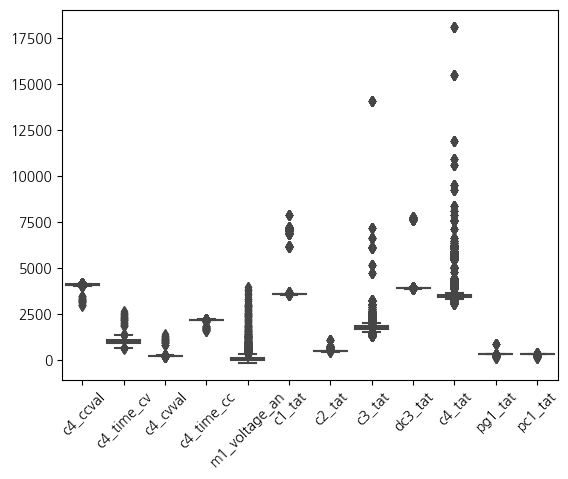

In [15]:
# 예상 이상치에 대한 boxplot
columns_of_interest = ['c4_ccval', 'c4_time_cv', 'c4_cvval', 'c4_time_cc', 'm1_voltage_an',
        'c1_tat', 'c2_tat', 'c3_tat', 'dc3_tat', 'c4_tat', 'pg1_tat', 'pc1_tat']  # 확인하고 싶은 열 선택
sns.boxplot(data=df_clear1[columns_of_interest])
plt.xticks(rotation=45)  # x축 레이블 회전 (옵션)
plt.show()

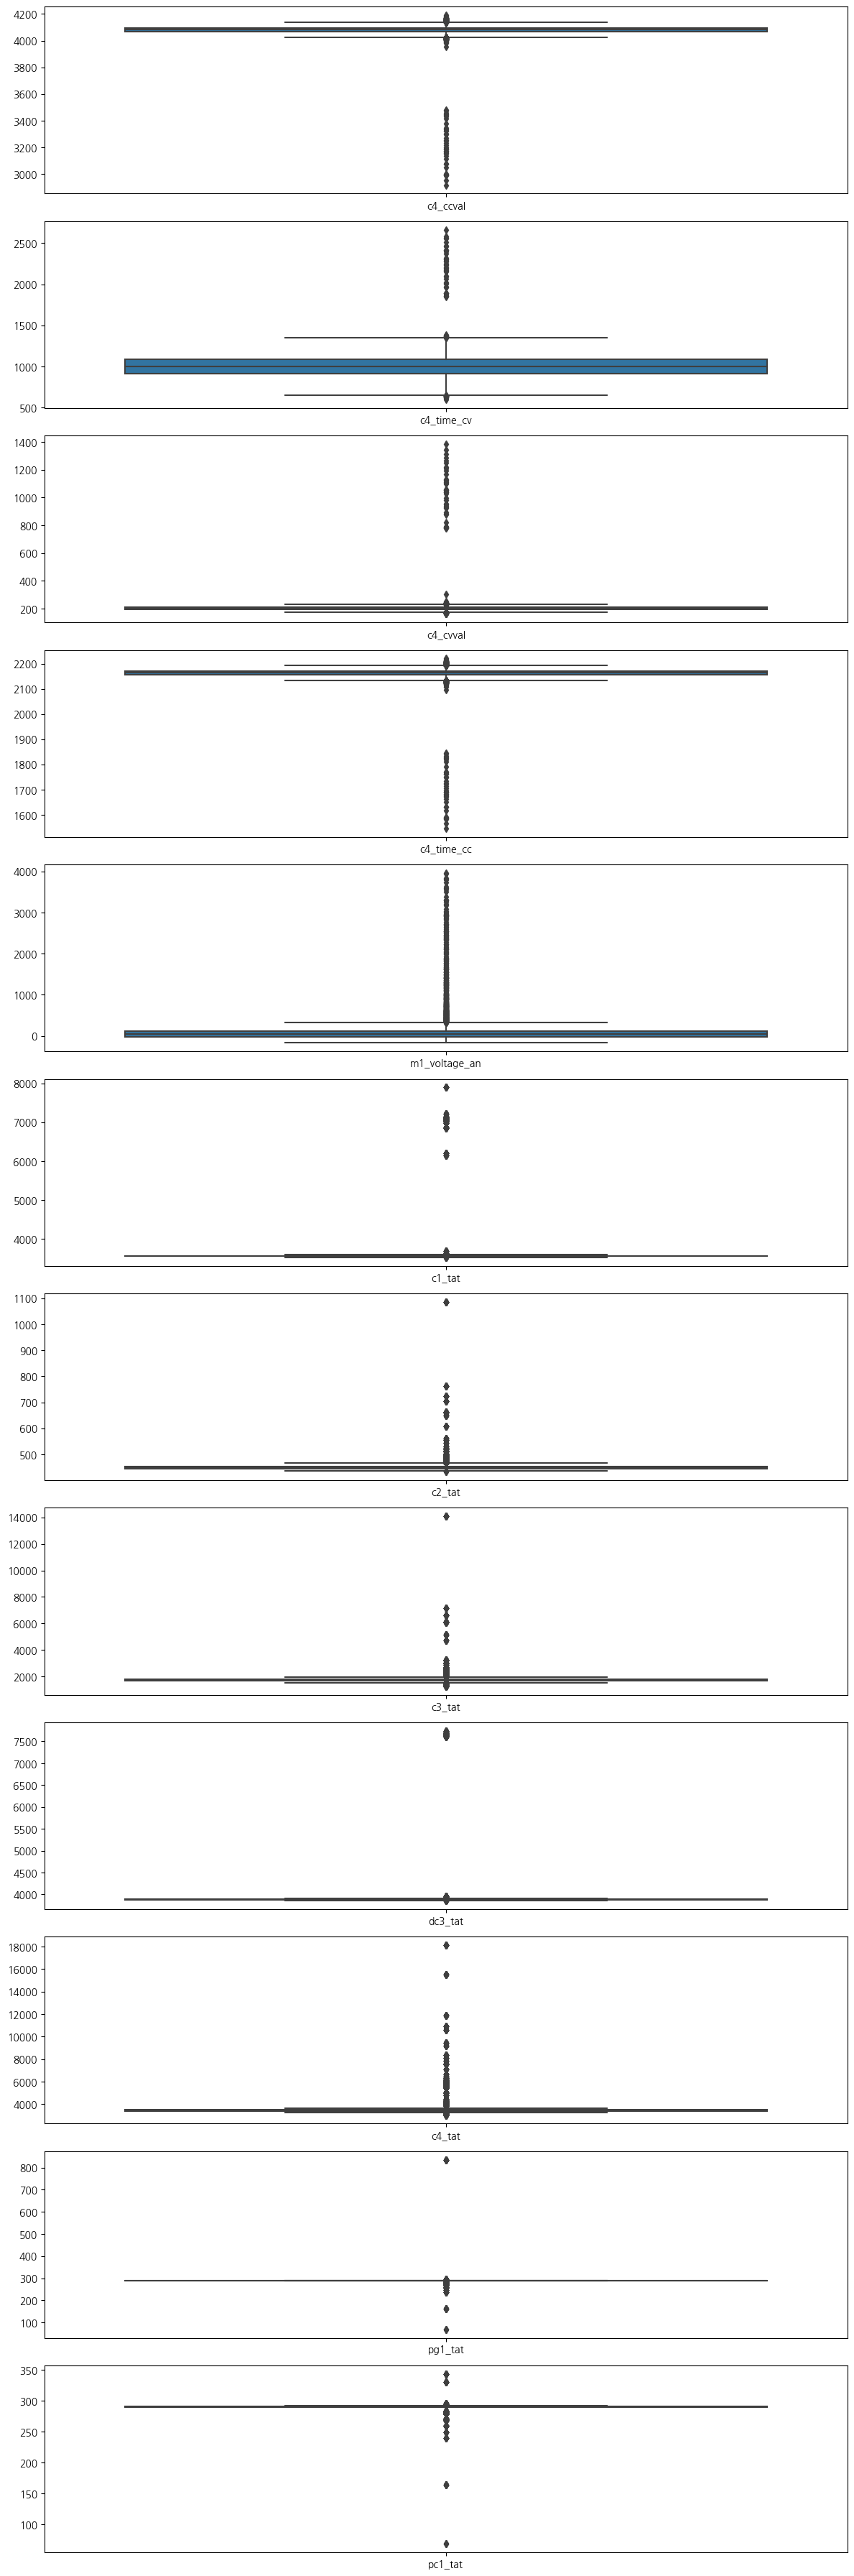

In [16]:
num_cols = len(df_clear1[columns_of_interest].columns)
num_plots = 12  # 분할할 그래프 개수 지정

fig, axs = plt.subplots(num_plots, figsize=(12, 3*num_plots))
for i in range(num_plots):
    start = i * (num_cols // num_plots)
    end = (i + 1) * (num_cols // num_plots)
    sns.boxplot(data=df_clear1[columns_of_interest].iloc[:, start:end], ax=axs[i])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'dc3_tat')

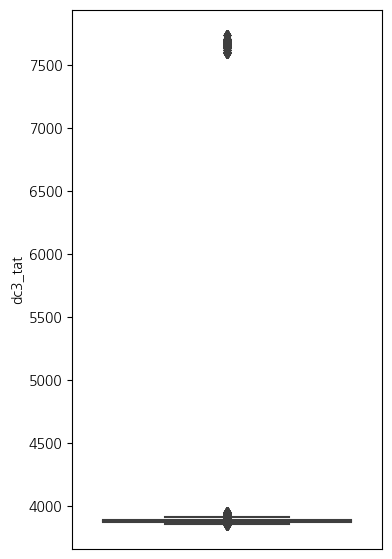

In [17]:
plt.figure(figsize=(4, 7))
sns.boxplot(data=df_clear1['dc3_tat'])
plt.gca().xaxis.set_visible(False)
plt.ylabel('dc3_tat')

### 이상치 결과 & 처리
  
3sigma 범위에서 벗어난 이상치 Colomns, 큰 이산형태를 보이는 colomns

- CCVAL (c4_ccval)
- CV시간 (c4_time_cv)
- CVVAL (c4_cvval)
- CC시간 (c4_time_cc)
- AN절연전압 (m1_voltage_an)
- 충전#1 공정시간 (c1_tat) : 5000 이상
- 충전#2 공정시간 (c2_tat) : 1000 이상
- 충전#3 공정시간 (c3_tat) : 12000 이상
- 방전#3 공정시간 (dc3_tat) : 7000 이상
- 충전#4 공정시간 (c4_tat) : 14000 이상
- PowerGrading#1 공정시간 (pg1_tat) : 700 이상
- PowerCharging#1 공정시간 (pc1_tat) : 100 이하
  
<p style="font-size:20px">
전체 데이터 중 3sigma가 넘어가며 이상치가 있을 것이라 예상되는 columns 중 설비 및 공정, 특성 데이터와 달리 공정별 공정시간에서 이상치가 연속적이지 않은 분포를 가지고 있어 과도한 이산형태는 제거하기로 함(1093 개 행 제거)</p>

In [18]:
cond1 = df['c1_tat'] < 5000
cond2 = df['c2_tat'] < 1000
cond3 = df['c3_tat'] < 12000
cond4 = df['dc3_tat'] < 7000
cond5 = df['c4_tat'] < 14000
cond6 = df['pg1_tat'] < 700
cond7 = df['pc1_tat'] > 100

df_clear2 = df_clear1.loc[cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7].reset_index(drop=True)
df_clear2

lot_id_x  tray_id_x          dt_start_x     cell_id judge  rta1_cell_no  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747    양품            10   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748    양품             7   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749    양품            19   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750    양품            24   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751    양품            17   
...        ...        ...                 ...         ...   ...           ...   
42883  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649    양품            16   
42884  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650    양품            14   
42885  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651    양품             2   
42886  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355    양품            15   
42887  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356    불량            10   

      rta1_box_col rta1_box_row rta1_box_dan hta1_box_col  ... ocv2_tat  \
0              08열          33연          08단          03열  ...      118   
1              08열          33연          08단          03열  ...      118   
2              08열          33연          08단          03열  ...      118   
3              08열          33연          08단          03열  ...      118   
4              08열          33연          08단          03열  ...      118   
...            ...          ...          ...          ...  ...      ...   
42883          08열          21연          03단          02열  ...      118   
42884          08열          21연          03단          02열  ...      118   
42885          08열          21연          03단          02열  ...      118   
42886          08열          21연          03단          02열  ...      118   
42887          08열          21연          03단          02열  ...      118   

      pg1_tat pc1_tat sa1_tat socv1_tat   sa2_tat socv2_tat   sa3_tat  \
0         290     290   53500         5  355357.0       5.0  215150.0   
1         290     290   53500         5  355357.0       5.0  215150.0   
2         290     290   53500         5  355357.0       5.0  215150.0   
3         290     290   53501         5  355357.0       5.0  215150.0   
4         290     290   53500         5  355357.0       5.0  215150.0   
...       ...     ...     ...       ...       ...       ...       ...   
42883     290     291   43419         4  345062.0       5.0  215255.0   
42884     290     291   43419         4  345062.0       5.0  215255.0   
42885     290     291   43419         4  345062.0       5.0  215255.0   
42886     290     291   43419         4  345062.0       5.0  215255.0   
42887     290     291   43419         4  345062.0       5.0  215255.0   

       socv3_tat   sa4_tat  
0            5.0  207532.0  
1            5.0  207532.0  
2            5.0  207532.0  
3            5.0  207532.0  
4            5.0  207532.0  
...          ...       ...  
42883        5.0  156836.0  
42884        5.0  156836.0  
42885        5.0  156836.0  
42886        5.0  156836.0  
42887        5.0  156836.0  

[42888 rows x 137 columns]

## 중복값 확인

In [19]:
df_clear2.duplicated().sum()

0

### 중복값 결과
- 중복값은 없는 것으로 확인

## 데이터 정규화
- 양품 -> 0 , 불량 -> 1 으로 변환
- 공정 설비 열, 연, 단의 문자형 데이터를 숫자형으로 변환

In [20]:
cond1 = df_clear2['judge'] == '양품'
cond2 = df_clear2['judge'] == '불량'

df_clear2.loc[cond1, 'judge_code'] = 0
df_clear2.loc[cond2, 'judge_code'] = 1

df_clear2.drop('judge', axis=1, inplace=True)

df_clear2

lot_id_x  tray_id_x          dt_start_x     cell_id  rta1_cell_no  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747            10   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748             7   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749            19   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750            24   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751            17   
...        ...        ...                 ...         ...           ...   
42883  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649            16   
42884  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650            14   
42885  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651             2   
42886  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355            15   
42887  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356            10   

      rta1_box_col rta1_box_row rta1_box_dan hta1_box_col hta1_box_row  ...  \
0              08열          33연          08단          03열          25연  ...   
1              08열          33연          08단          03열          25연  ...   
2              08열          33연          08단          03열          25연  ...   
3              08열          33연          08단          03열          25연  ...   
4              08열          33연          08단          03열          25연  ...   
...            ...          ...          ...          ...          ...  ...   
42883          08열          21연          03단          02열          23연  ...   
42884          08열          21연          03단          02열          23연  ...   
42885          08열          21연          03단          02열          23연  ...   
42886          08열          21연          03단          02열          23연  ...   
42887          08열          21연          03단          02열          23연  ...   

      pg1_tat pc1_tat sa1_tat socv1_tat   sa2_tat socv2_tat   sa3_tat  \
0         290     290   53500         5  355357.0       5.0  215150.0   
1         290     290   53500         5  355357.0       5.0  215150.0   
2         290     290   53500         5  355357.0       5.0  215150.0   
3         290     290   53501         5  355357.0       5.0  215150.0   
4         290     290   53500         5  355357.0       5.0  215150.0   
...       ...     ...     ...       ...       ...       ...       ...   
42883     290     291   43419         4  345062.0       5.0  215255.0   
42884     290     291   43419         4  345062.0       5.0  215255.0   
42885     290     291   43419         4  345062.0       5.0  215255.0   
42886     290     291   43419         4  345062.0       5.0  215255.0   
42887     290     291   43419         4  345062.0       5.0  215255.0   

       socv3_tat   sa4_tat  judge_code  
0            5.0  207532.0         0.0  
1            5.0  207532.0         0.0  
2            5.0  207532.0         0.0  
3            5.0  207532.0         0.0  
4            5.0  207532.0         0.0  
...          ...       ...         ...  
42883        5.0  156836.0         0.0  
42884        5.0  156836.0         0.0  
42885        5.0  156836.0         0.0  
42886        5.0  156836.0         0.0  
42887        5.0  156836.0         1.0  

[42888 rows x 137 columns]

In [21]:
df_clear2['sa4_box_col'] = df_clear2['sa4_box_col'].str.replace('연', '열')
df_clear2['sa4_box_row'] = df_clear2['sa4_box_row'].str.replace('열', '연')

In [22]:
columns_to_process = ['rta1_box_col', 'rta1_box_row', 'rta1_box_dan',
    'hta1_box_col', 'hta1_box_row', 'hta1_box_dan',
    'rta2_box_col', 'rta2_box_row', 'rta2_box_dan',
    'ocv1_box_col', 'ocv1_box_dan',
    'c1_box_col', 'c1_box_dan',
    'dc1_box_col', 'dc1_box_dan',
    'c2_box_col', 'c2_box_dan',
    'dc2_box_col', 'dc2_box_dan',
    'c3_box_col', 'c3_box_dan',
    'dc3_box_col', 'dc3_box_dan',
    'c4_box_col', 'c4_box_dan',
    'ocv2_box_col', 'ocv2_box_dan',
    'pg1_box_col', 'pg1_box_dan',
    'pc1_box_col', 'pc1_box_dan',
    'sa1_box_col', 'sa1_box_row', 'sa1_box_dan',
    'sa2_box_col', 'sa2_box_row', 'sa2_box_dan',
    'sa3_box_col', 'sa3_box_row', 'sa3_box_dan',
    'sa4_box_col', 'sa4_box_row', 'sa4_box_dan']

In [23]:
for col in columns_to_process:
    if col.endswith('_col'):
        df_clear2[col] = df_clear2[col].str.replace('열', '').astype(int)
    if col.endswith('_row'):
        df_clear2[col] = df_clear2[col].str.replace('연', '').astype(int)
    elif col.endswith('_dan'):
        df_clear2[col] = df_clear2[col].str.replace('단', '').astype(int)

In [24]:
df_clear2

lot_id_x  tray_id_x          dt_start_x     cell_id  rta1_cell_no  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747            10   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748             7   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749            19   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750            24   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751            17   
...        ...        ...                 ...         ...           ...   
42883  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649            16   
42884  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650            14   
42885  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651             2   
42886  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355            15   
42887  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356            10   

       rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
0                 8            33             8             3            25   
1                 8            33             8             3            25   
2                 8            33             8             3            25   
3                 8            33             8             3            25   
4                 8            33             8             3            25   
...             ...           ...           ...           ...           ...   
42883             8            21             3             2            23   
42884             8            21             3             2            23   
42885             8            21             3             2            23   
42886             8            21             3             2            23   
42887             8            21             3             2            23   

       ...  pg1_tat  pc1_tat  sa1_tat  socv1_tat   sa2_tat  socv2_tat  \
0      ...      290      290    53500          5  355357.0        5.0   
1      ...      290      290    53500          5  355357.0        5.0   
2      ...      290      290    53500          5  355357.0        5.0   
3      ...      290      290    53501          5  355357.0        5.0   
4      ...      290      290    53500          5  355357.0        5.0   
...    ...      ...      ...      ...        ...       ...        ...   
42883  ...      290      291    43419          4  345062.0        5.0   
42884  ...      290      291    43419          4  345062.0        5.0   
42885  ...      290      291    43419          4  345062.0        5.0   
42886  ...      290      291    43419          4  345062.0        5.0   
42887  ...      290      291    43419          4  345062.0        5.0   

        sa3_tat  socv3_tat   sa4_tat  judge_code  
0      215150.0        5.0  207532.0         0.0  
1      215150.0        5.0  207532.0         0.0  
2      215150.0        5.0  207532.0         0.0  
3      215150.0        5.0  207532.0         0.0  
4      215150.0        5.0  207532.0         0.0  
...         ...        ...       ...         ...  
42883  215255.0        5.0  156836.0         0.0  
42884  215255.0        5.0  156836.0         0.0  
42885  215255.0        5.0  156836.0         0.0  
42886  215255.0        5.0  156836.0         0.0  
42887  215255.0        5.0  156836.0         1.0  

[42888 rows x 137 columns]

---

# 데이터 EDA 및 모델 설정과 분석
  
**주어진 피처들이 영향을 줄 것이라 예상 및 관심 목표변수는 양불 판정(y1), 불량률(y2) 이다**

## y1 = Cell 양불 판정 (분류)

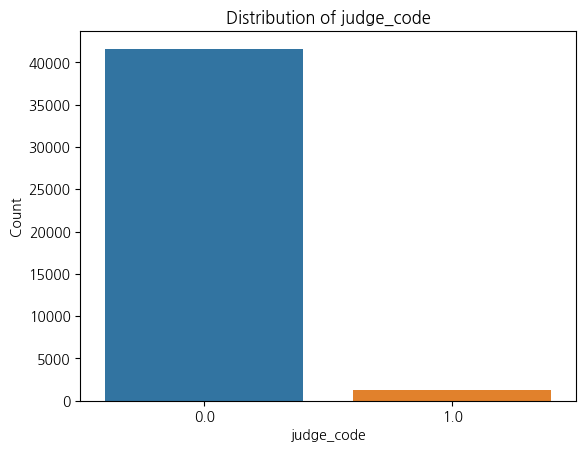

In [25]:
sns.countplot(x='judge_code', data=df_clear2)
plt.title('Distribution of judge_code')
plt.xlabel('judge_code')
plt.ylabel('Count')
plt.show()

#### 불량 판정 히스토그램

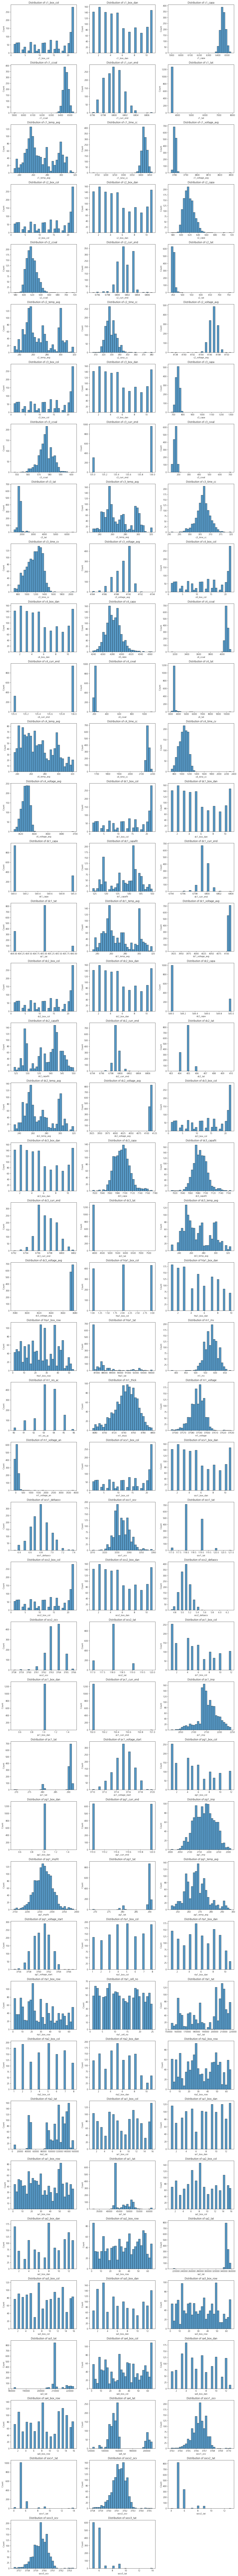

In [26]:
df_clear2_bad = df_clear2[df_clear2['judge_code'] == 1]

# 히스토그램 그리기
features = df_clear2.columns.difference(['judge_code','cell_id','tray_id_x','tray_id_y',
                                         'lot_id_x','lot_id_y','dt_start_old','dt_start_x','dt_start_y'])
num_features = len(features)
num_cols = 3  # 한 줄에 몇 개의 그래프를 그릴지
num_rows = math.ceil(num_features / num_cols)  # 총 몇 줄이 필요한지

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

for i, feature in enumerate(features):
    sns.histplot(df_clear2_bad[feature], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# 빈 서브플롯 숨기기
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [27]:
df_clear2_good = df_clear2[df_clear2['judge_code']==0].reset_index(drop=True)
df_clear2_bad = df_clear2[df_clear2['judge_code']==1].reset_index(drop=True)

In [28]:
df_clear2_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41618 entries, 0 to 41617
Columns: 137 entries, lot_id_x to judge_code
dtypes: float64(16), int32(43), int64(70), object(8)
memory usage: 36.7+ MB


In [29]:
df_clear2_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Columns: 137 entries, lot_id_x to judge_code
dtypes: float64(16), int32(43), int64(70), object(8)
memory usage: 1.1+ MB


---

### 양불판정 영향인자 확인 및 판정예측

#### Aging

- Aging 단계에서는 공정시간이 유일한 공정 조건인자이므로 이후 설비 불량률 EDA 분석에 따라 진행하도록 함

#### Formation DT_clf

In [30]:
df_clear2A = df_clear2[['judge_code','c1_temp_avg',
                        'c2_temp_avg','c3_temp_avg',
                        'c4_temp_avg','dc1_temp_avg',
                        'dc2_temp_avg','dc3_temp_avg']]

In [31]:
df_clear2A_y = df_clear2A['judge_code']
df_clear2A_x = df_clear2A.drop('judge_code', axis=1)
df_clear2A_train_x, df_clear2A_test_x, df_clear2A_train_y, df_clear2A_test_y = train_test_split(
    df_clear2A_x, df_clear2A_y, test_size=0.3, random_state=123)

In [32]:
print('train data X size : {}'.format(df_clear2A_train_x.shape))
print('test data X size : {}'.format(df_clear2A_test_x.shape))
print('train data Y size : {}'.format(df_clear2A_train_y.shape))
print('test data Y size : {}'.format(df_clear2A_test_y.shape))

train data X size : (30021, 7)
test data X size : (12867, 7)
train data Y size : (30021,)
test data Y size : (12867,)


In [33]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(df_clear2A_train_x, df_clear2A_train_y)

# 예측 및 성능 평가
y_pred = dt_clf.predict(df_clear2A_test_x)
accuracy = accuracy_score(df_clear2A_test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9713219864770343


In [34]:
importance = dt_clf.feature_importances_
feature_names = df_clear2A_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Decision Tree Feature Importance:")
print(feature_importance)

Decision Tree Feature Importance:
dc2_temp_avg    0.244649
c4_temp_avg     0.221818
c1_temp_avg     0.189184
dc3_temp_avg    0.130204
dc1_temp_avg    0.101495
c3_temp_avg     0.062058
c2_temp_avg     0.050592
dtype: float64


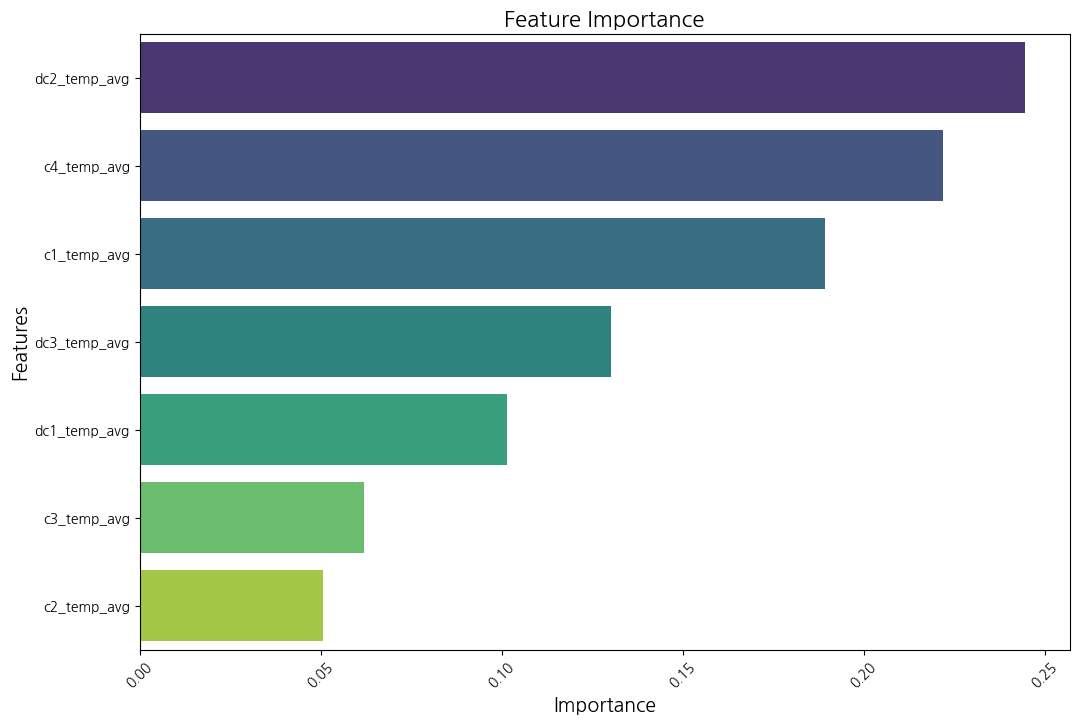

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

---

In [36]:
df_clear2B = df_clear2[['judge_code',
                        'c1_curr_end','c1_voltage_avg',
                        'c1_capa','c1_ccval',
                        'c1_temp_avg','c1_tat']]

In [37]:
df_clear2B_y = df_clear2B['judge_code']
df_clear2B_x = df_clear2B.drop('judge_code', axis=1)
df_clear2B_train_x, df_clear2B_test_x, df_clear2B_train_y, df_clear2B_test_y = train_test_split(
    df_clear2B_x, df_clear2B_y, test_size=0.3, random_state=123)

In [38]:
print('train data X size : {}'.format(df_clear2B_train_x.shape))
print('test data X size : {}'.format(df_clear2B_test_x.shape))
print('train data Y size : {}'.format(df_clear2B_train_y.shape))
print('test data Y size : {}'.format(df_clear2B_test_y.shape))

train data X size : (30021, 6)
test data X size : (12867, 6)
train data Y size : (30021,)
test data Y size : (12867,)


In [39]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(df_clear2B_train_x, df_clear2A_train_y)

# 예측 및 성능 평가
y_pred = dt_clf.predict(df_clear2B_test_x)
accuracy = accuracy_score(df_clear2B_test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9516592834382529


In [40]:
importance = dt_clf.feature_importances_
feature_names = df_clear2B_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Decision Tree Feature Importance:")
print(feature_importance)

Decision Tree Feature Importance:
c1_temp_avg       0.223063
c1_tat            0.189407
c1_ccval          0.184353
c1_capa           0.181588
c1_curr_end       0.156783
c1_voltage_avg    0.064806
dtype: float64


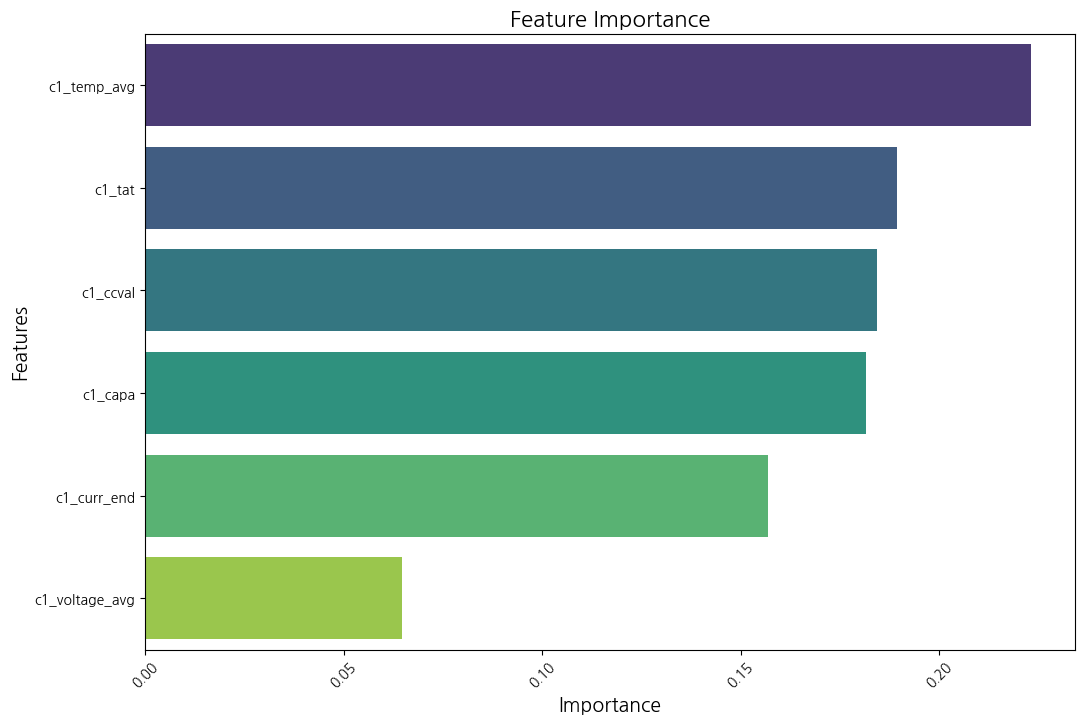

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

---

In [42]:
df_clear2C = df_clear2[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [43]:
df_clear2C_y = df_clear2C['judge_code']
df_clear2C_x = df_clear2C.drop('judge_code', axis=1)
df_clear2C_train_x, df_clear2C_test_x, df_clear2C_train_y, df_clear2C_test_y = train_test_split(
    df_clear2C_x, df_clear2C_y, test_size=0.3, random_state=123)

In [44]:
print('train data X size : {}'.format(df_clear2C_train_x.shape))
print('test data X size : {}'.format(df_clear2C_test_x.shape))
print('train data Y size : {}'.format(df_clear2C_train_y.shape))
print('test data Y size : {}'.format(df_clear2C_test_y.shape))

train data X size : (30021, 52)
test data X size : (12867, 52)
train data Y size : (30021,)
test data Y size : (12867,)


In [45]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(df_clear2C_train_x, df_clear2C_train_y)

# 예측 및 성능 평가
y_pred = dt_clf.predict(df_clear2C_test_x)

In [46]:
accuracy = accuracy_score(df_clear2C_test_y, y_pred)
confusion = confusion_matrix(df_clear2C_test_y, y_pred)
precision = precision_score(df_clear2C_test_y, y_pred)
recall = recall_score(df_clear2C_test_y, y_pred)
f1 = f1_score(df_clear2C_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy,precision, recall, f1))

혼동 행렬
[[12266   232]
 [  208   161]]
평가 지표
Accuracy : 0.965804 
Precision : 0.409669 
Recall : 0.436314 
F1_score : 0.422572


In [47]:
importance = dt_clf.feature_importances_
feature_names = df_clear2C_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False).head(20)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
dc1_capafit        0.087047
c4_tat             0.048137
c3_tat             0.040975
c3_voltage_avg     0.040401
dc2_voltage_avg    0.040301
c2_curr_end        0.036813
c2_tat             0.034528
ocv1_ocv           0.034484
c4_capa            0.034055
c4_temp_avg        0.032346
c3_capa            0.029757
c4_ccval           0.029239
c3_time_cv         0.026970
dc3_capafit        0.026194
c3_cvval           0.025846
c3_ccval           0.024355
dc3_capa           0.023343
c4_time_cv         0.022313
c4_cvval           0.022103
c1_tat             0.020483
dtype: float64


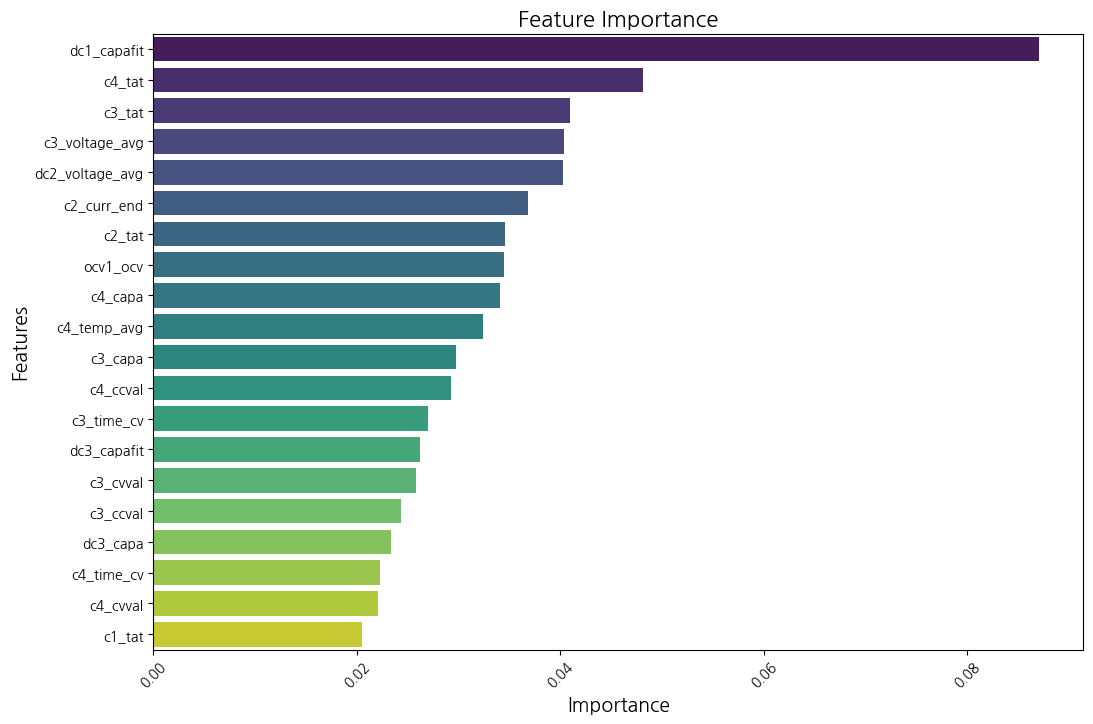

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [49]:
# GridSearchCV 활용
params = {
    'max_depth' : [4, 8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

dt_clf = DecisionTreeClassifier(random_state=123)
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear2C_train_x, df_clear2C_train_y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [50]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도 : 0.9700


In [51]:
dt_clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=4, random_state=123)
dt_clf.fit(df_clear2C_train_x, df_clear2C_train_y)
y_pred = dt_clf.predict(df_clear2C_test_x)

In [52]:
accuracy = accuracy_score(df_clear2C_test_y, y_pred)
confusion = confusion_matrix(df_clear2C_test_y, y_pred)
precision = precision_score(df_clear2C_test_y, y_pred)
recall = recall_score(df_clear2C_test_y, y_pred)
f1 = f1_score(df_clear2C_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12483    15]
 [  359    10]]
평가 지표
Accuracy : 0.970933 
Precision : 0.400000 
Recall : 0.027100 
F1_score : 0.050761


In [53]:
importance = dt_clf.feature_importances_
feature_names = df_clear2C_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
dc1_capafit        0.354983
c3_voltage_avg     0.151259
dc2_voltage_avg    0.136938
c2_curr_end        0.132410
c4_temp_avg        0.092425
c3_tat             0.080094
c2_tat             0.019895
dc3_tat            0.018512
c1_tat             0.013482
dc3_capa           0.000000
dc3_temp_avg       0.000000
c4_ccval           0.000000
dc3_capafit        0.000000
dc3_voltage_avg    0.000000
c4_curr_end        0.000000
c4_voltage_avg     0.000000
c4_capa            0.000000
ocv1_ocv           0.000000
c4_time_cc         0.000000
c4_time_cv         0.000000
dtype: float64


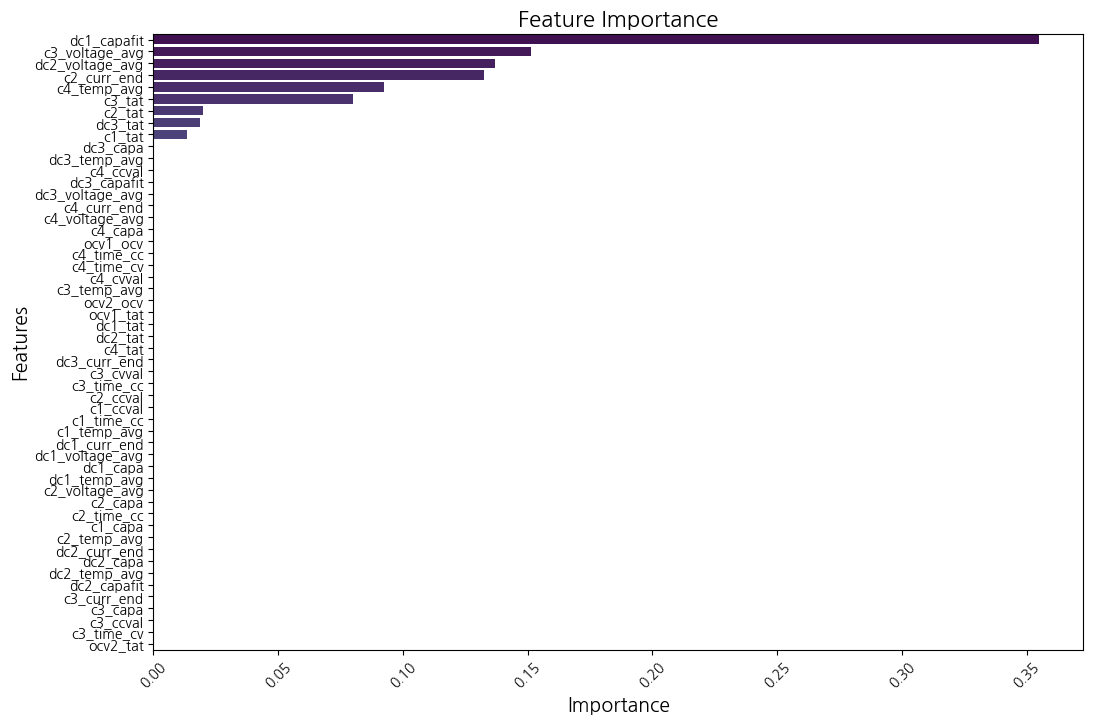

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

---

#### Formation RF_clf

In [55]:
df_clear2D = df_clear2[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [56]:
df_clear2D_y = df_clear2D['judge_code']
df_clear2D_x = df_clear2D.drop('judge_code', axis=1)
df_clear2D_train_x, df_clear2D_test_x, df_clear2D_train_y, df_clear2D_test_y = train_test_split(
    df_clear2D_x, df_clear2D_y, test_size=0.3, random_state=123)

In [57]:
print('train data X size : {}'.format(df_clear2D_train_x.shape))
print('test data X size : {}'.format(df_clear2D_test_x.shape))
print('train data Y size : {}'.format(df_clear2D_train_y.shape))
print('test data Y size : {}'.format(df_clear2D_test_y.shape))

train data X size : (30021, 52)
test data X size : (12867, 52)
train data Y size : (30021,)
test data Y size : (12867,)


In [58]:
rf_clf = RandomForestClassifier(random_state=123)
rf_clf.fit(df_clear2D_train_x,df_clear2D_train_y)

# 예측 및 성능 평가
y_pred = rf_clf.predict(df_clear2D_test_x)

In [59]:
accuracy = accuracy_score(df_clear2D_test_y, y_pred)
confusion = confusion_matrix(df_clear2D_test_y, y_pred)
precision = precision_score(df_clear2D_test_y, y_pred)
recall = recall_score(df_clear2D_test_y, y_pred)
f1 = f1_score(df_clear2D_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12449    49]
 [  307    62]]
평가 지표
Accuracy : 0.972332 
Precision : 0.558559 
Recall : 0.168022 
F1_score : 0.258333


In [60]:
importance = rf_clf.feature_importances_
feature_names = df_clear2D_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance[:20])

Feature Importance:
c2_curr_end     0.048242
c4_temp_avg     0.036290
c3_time_cv      0.030472
dc1_capafit     0.029306
c3_capa         0.028119
c3_tat          0.027597
c4_time_cv      0.026606
ocv1_ocv        0.026339
dc2_temp_avg    0.025819
c2_tat          0.025310
c2_temp_avg     0.025186
c4_ccval        0.024880
c1_temp_avg     0.024867
dc3_capafit     0.024801
dc1_temp_avg    0.024609
dc3_capa        0.024402
c3_cvval        0.024375
c1_ccval        0.024046
c4_tat          0.024003
c4_capa         0.023760
dtype: float64


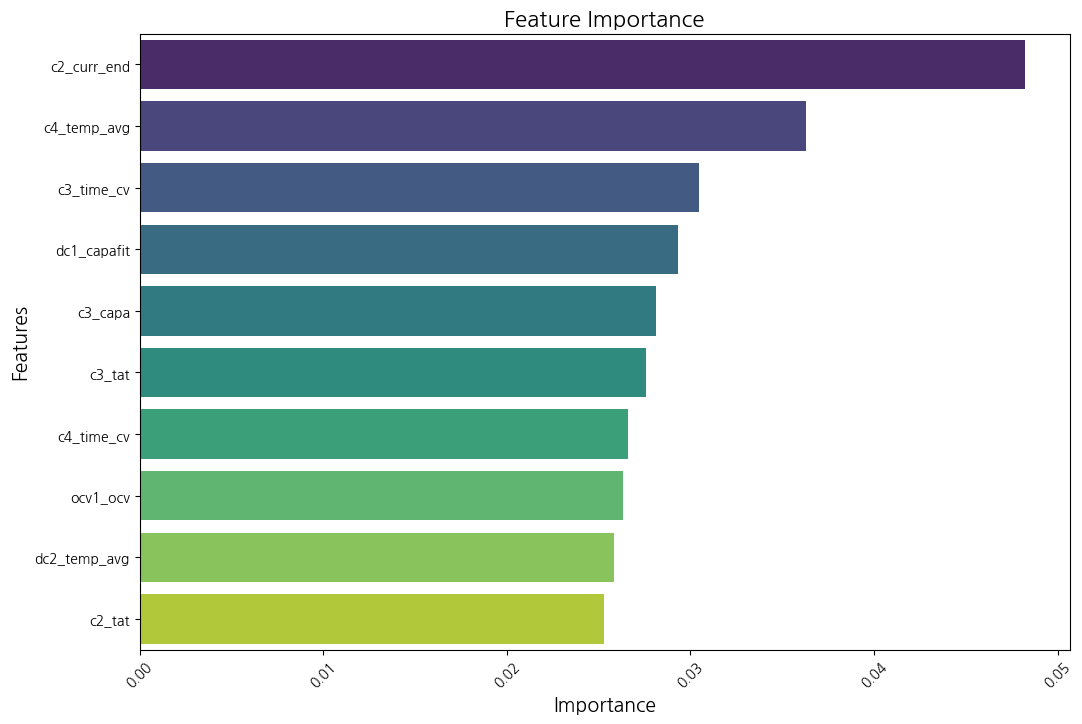

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [62]:
# GridSearchCV 활용
params = {
    'n_estimators' : [10, 15, 20, 50],
    'max_depth' : [4, 8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

rf_clf = RandomForestClassifier(random_state=123, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear2D_train_x, df_clear2D_train_y)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16],
                         'n_estimators': [10, 15, 20, 50]})

In [63]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
최고 예측 정확도 : 0.9709


In [64]:
rf_clf = RandomForestClassifier(n_estimators=20, min_samples_split=2,
                                min_samples_leaf=1, max_depth=16, random_state=123)
rf_clf.fit(df_clear2D_train_x, df_clear2D_train_y)
y_pred = rf_clf.predict(df_clear2D_test_x)

In [65]:
accuracy = accuracy_score(df_clear2D_test_y, y_pred)
confusion = confusion_matrix(df_clear2D_test_y, y_pred)
precision = precision_score(df_clear2D_test_y, y_pred)
recall = recall_score(df_clear2D_test_y, y_pred)
f1 = f1_score(df_clear2D_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12432    66]
 [  296    73]]
평가 지표
Accuracy : 0.971866 
Precision : 0.525180 
Recall : 0.197832 
F1_score : 0.287402


In [66]:
importance = rf_clf.feature_importances_
feature_names = df_clear2D_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance[:10])

Feature Importance:
c2_curr_end     0.045271
c4_temp_avg     0.035894
dc2_temp_avg    0.031650
c3_tat          0.030915
dc1_capafit     0.030470
c3_capa         0.029766
c2_temp_avg     0.029558
ocv1_ocv        0.028052
c1_temp_avg     0.027879
dc3_capa        0.027437
dtype: float64


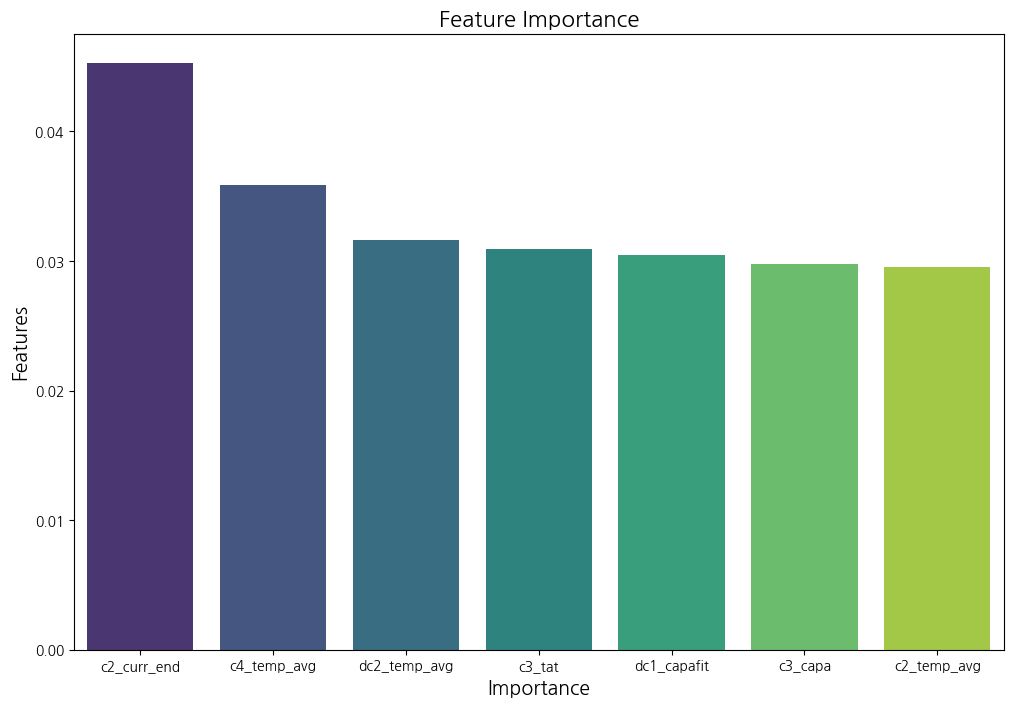

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.index[:7], y=feature_importance.values[:7], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
#plt.xticks(rotation=45)
plt.show()

---

#### Formation GB_clf

In [68]:
df_clear2E = df_clear2[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [69]:
df_clear2E_y = df_clear2E['judge_code']
df_clear2E_x = df_clear2E.drop('judge_code', axis=1)
df_clear2E_train_x, df_clear2E_test_x, df_clear2E_train_y, df_clear2E_test_y = train_test_split(
    df_clear2E_x, df_clear2E_y, test_size=0.3, random_state=123)

In [70]:
print('train data X size : {}'.format(df_clear2E_train_x.shape))
print('test data X size : {}'.format(df_clear2E_test_x.shape))
print('train data Y size : {}'.format(df_clear2E_train_y.shape))
print('test data Y size : {}'.format(df_clear2E_test_y.shape))

train data X size : (30021, 52)
test data X size : (12867, 52)
train data Y size : (30021,)
test data Y size : (12867,)


In [71]:
gb_clf = GradientBoostingClassifier(random_state=123)
gb_clf.fit(df_clear2E_train_x, df_clear2E_train_y)

# 예측 및 성능 평가
y_pred = gb_clf.predict(df_clear2E_test_x)

In [72]:
accuracy = accuracy_score(df_clear2E_test_y, y_pred)
confusion = confusion_matrix(df_clear2E_test_y, y_pred)
precision = precision_score(df_clear2E_test_y, y_pred)
recall = recall_score(df_clear2E_test_y, y_pred)
f1 = f1_score(df_clear2E_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12468    30]
 [  320    49]]
평가 지표
Accuracy : 0.972799 
Precision : 0.620253 
Recall : 0.132791 
F1_score : 0.218750


In [73]:
importance = gb_clf.feature_importances_
feature_names = df_clear2E_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
dc1_capafit        0.241404
c2_curr_end        0.105178
c4_temp_avg        0.083427
dc2_voltage_avg    0.080838
c3_voltage_avg     0.077027
c3_capa            0.046444
c1_temp_avg        0.036297
dc3_temp_avg       0.032281
c2_tat             0.028476
ocv1_ocv           0.026134
c3_temp_avg        0.025830
c4_tat             0.022932
c3_tat             0.020536
c1_tat             0.018328
dc2_temp_avg       0.015908
c2_temp_avg        0.015892
dc1_temp_avg       0.015344
dc3_tat            0.012600
c4_ccval           0.011460
c3_time_cc         0.006999
dtype: float64


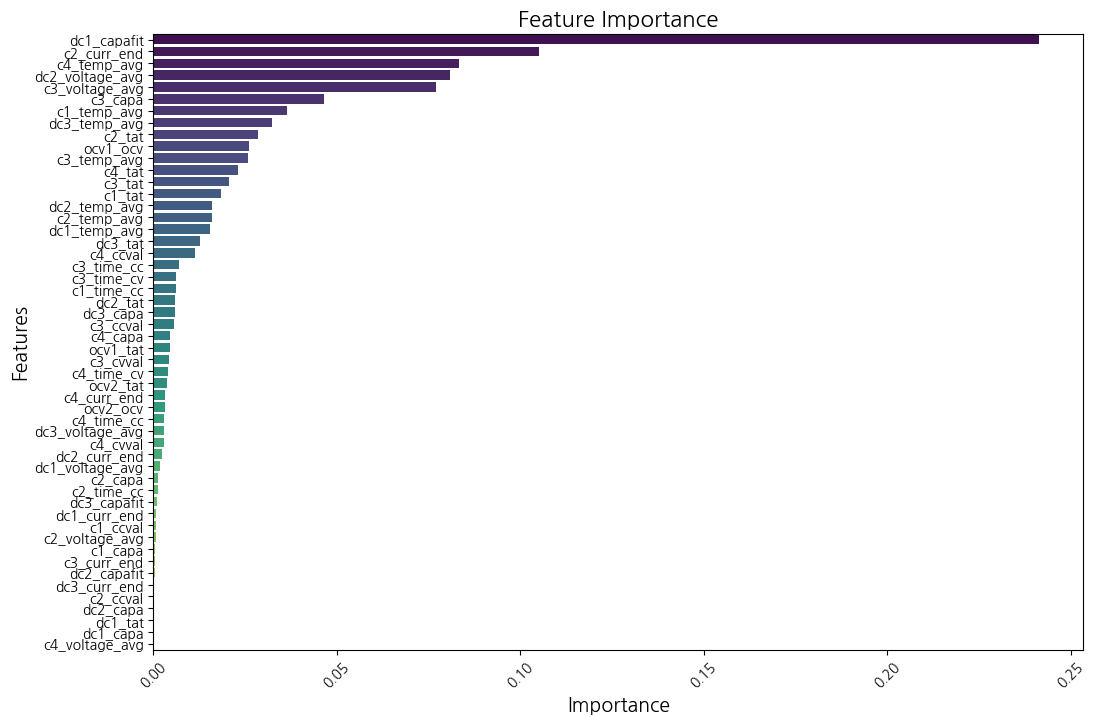

In [74]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [75]:
# GridSearchCV 활용
params = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
    'n_estimators' : [10, 25, 50, 100, 150, 200]
}

gb_clf = GradientBoostingClassifier(random_state=123)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear2E_train_x, df_clear2E_train_y)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
                         'n_estimators': [10, 25, 50, 100, 150, 200]})

In [76]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'learning_rate': 0.1, 'n_estimators': 200}
최고 예측 정확도 : 0.9709


In [77]:
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=123)
gb_clf.fit(df_clear2E_train_x, df_clear2E_train_y)
y_pred = gb_clf.predict(df_clear2E_test_x)

In [78]:
accuracy = accuracy_score(df_clear2E_test_y, y_pred)
confusion = confusion_matrix(df_clear2E_test_y, y_pred)
precision = precision_score(df_clear2E_test_y, y_pred)
recall = recall_score(df_clear2E_test_y, y_pred)
f1 = f1_score(df_clear2E_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12431    67]
 [  292    77]]
평가 지표
Accuracy : 0.972099 
Precision : 0.534722 
Recall : 0.208672 
F1_score : 0.300195


In [79]:
importance = gb_clf.feature_importances_
feature_names = df_clear2E_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
dc1_capafit        0.207360
c2_curr_end        0.096956
c4_temp_avg        0.080252
c3_voltage_avg     0.072280
dc2_voltage_avg    0.070460
c3_capa            0.042594
c1_temp_avg        0.038409
dc3_temp_avg       0.032337
c2_tat             0.031428
c3_temp_avg        0.028198
ocv1_ocv           0.027074
c4_tat             0.022248
c3_tat             0.020930
c1_tat             0.017967
dc2_temp_avg       0.017946
c2_temp_avg        0.017603
dc1_temp_avg       0.016666
c4_ccval           0.014242
dc3_tat            0.013241
c4_capa            0.010290
dtype: float64


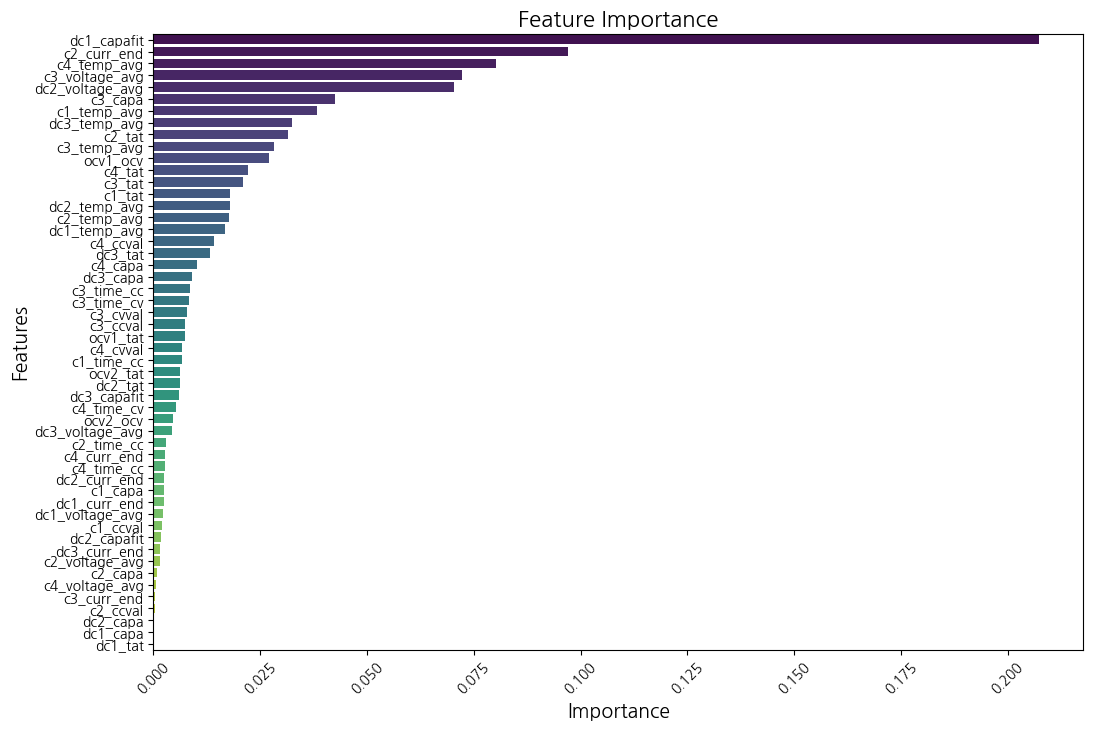

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

---

#### Formation XGB_clf

In [81]:
df_clear2F = df_clear2[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [82]:
df_clear2F_y = df_clear2F['judge_code']
df_clear2F_x = df_clear2F.drop('judge_code', axis=1)
df_clear2F_train_x, df_clear2F_test_x, df_clear2F_train_y, df_clear2F_test_y = train_test_split(
    df_clear2F_x, df_clear2F_y, test_size=0.3, random_state=123)

In [83]:
print('train data X size : {}'.format(df_clear2F_train_x.shape))
print('test data X size : {}'.format(df_clear2F_test_x.shape))
print('train data Y size : {}'.format(df_clear2F_train_y.shape))
print('test data Y size : {}'.format(df_clear2F_test_y.shape))

train data X size : (30021, 52)
test data X size : (12867, 52)
train data Y size : (30021,)
test data Y size : (12867,)


In [84]:
df_clear2F_train_xx, df_clear2F_val_xx, df_clear2F_train_yy, df_clear2F_val_yy = train_test_split(
    df_clear2F_train_x, df_clear2F_train_y, test_size=0.1, random_state=123)

print('train data X size : {}'.format(df_clear2F_train_xx.shape))
print('val data X size : {}'.format(df_clear2F_val_xx.shape))
print('train data Y size : {}'.format(df_clear2F_train_yy.shape))
print('val data Y size : {}'.format(df_clear2F_val_yy.shape))

train data X size : (27018, 52)
val data X size : (3003, 52)
train data Y size : (27018,)
val data Y size : (3003,)


In [85]:
params = {
    'max_depth':3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds=400

In [86]:
dtr = xgb.DMatrix(data=df_clear2F_train_xx, label=df_clear2F_train_yy)
dval = xgb.DMatrix(data=df_clear2F_val_xx, label=df_clear2F_val_yy)
dtest = xgb.DMatrix(data=df_clear2F_test_x, label=df_clear2F_test_y)

In [87]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=50,evals=eval_list)

[0]	train-logloss:0.64910	eval-logloss:0.64942
[1]	train-logloss:0.60924	eval-logloss:0.60987
[2]	train-logloss:0.57302	eval-logloss:0.57393
[3]	train-logloss:0.53996	eval-logloss:0.54117
[4]	train-logloss:0.50970	eval-logloss:0.51126
[5]	train-logloss:0.48190	eval-logloss:0.48370
[6]	train-logloss:0.45631	eval-logloss:0.45838
[7]	train-logloss:0.43269	eval-logloss:0.43508
[8]	train-logloss:0.41085	eval-logloss:0.41347
[9]	train-logloss:0.39060	eval-logloss:0.39352
[10]	train-logloss:0.37182	eval-logloss:0.37496
[11]	train-logloss:0.35435	eval-logloss:0.35773
[12]	train-logloss:0.33810	eval-logloss:0.34176
[13]	train-logloss:0.32294	eval-logloss:0.32682
[14]	train-logloss:0.30880	eval-logloss:0.31295
[15]	train-logloss:0.29560	eval-logloss:0.29995
[16]	train-logloss:0.28323	eval-logloss:0.28777
[17]	train-logloss:0.27167	eval-logloss:0.27646
[18]	train-logloss:0.26084	eval-logloss:0.26582
[19]	train-logloss:0.25068	eval-logloss:0.25588
[20]	train-logloss:0.24116	eval-logloss:0.24656
[2

In [88]:
pred_probs = xgb_model.predict(dtest)
pred_classes = (pred_probs > 0.5).astype(int)

In [89]:
accuracy = accuracy_score(df_clear2F_test_y, pred_classes)
confusion = confusion_matrix(df_clear2F_test_y, pred_classes)
precision = precision_score(df_clear2F_test_y, pred_classes)
recall = recall_score(df_clear2F_test_y, pred_classes)
f1 = f1_score(df_clear2F_test_y, pred_classes)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12452    46]
 [  315    54]]
평가 지표
Accuracy : 0.971944 
Precision : 0.540000 
Recall : 0.146341 
F1_score : 0.230277


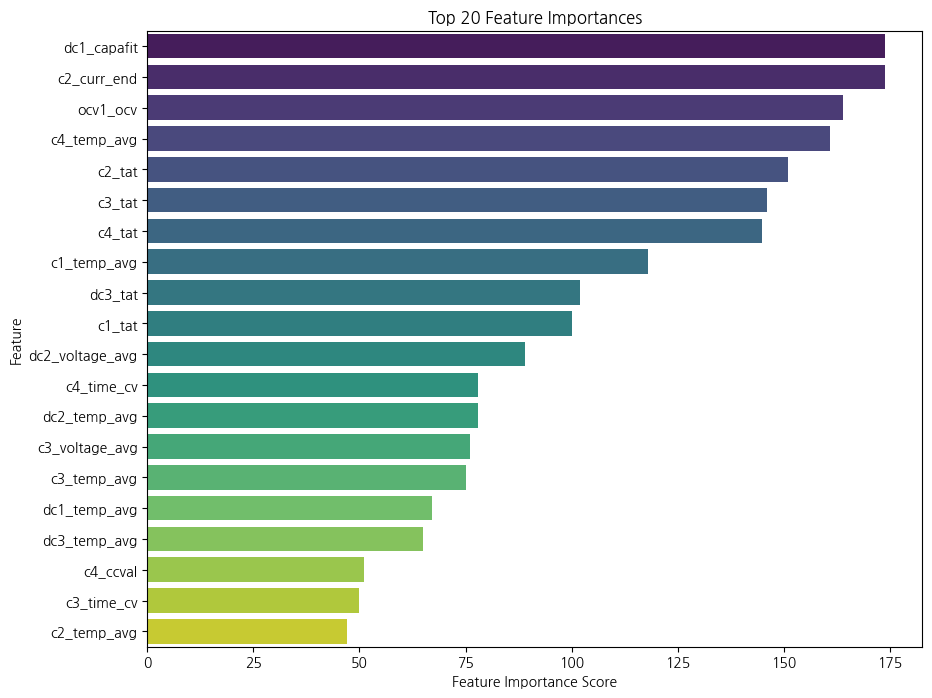

In [90]:
# 피처 중요도 추출
importance = xgb_model.get_fscore()

# 피처 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# 중요도에 따라 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 20개 피처 중요도 추출
top_features = importance_df.head(20)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Feature Importances')
plt.show()

---

#### Grading DT_clf

In [91]:
df_clear2G = df_clear2[['judge_code','pg1_tat','pg1_impfit', 'pg1_imp','pg1_voltage_start',
                        'pg1_temp_avg', 'pc1_tat', 'pc1_imp', 'pc1_voltage_start',
                        'pc1_curr_end',]]

In [92]:
df_clear2G_y = df_clear2G['judge_code']
df_clear2G_x = df_clear2G.drop('judge_code', axis=1)
df_clear2G_train_x, df_clear2G_test_x, df_clear2G_train_y, df_clear2G_test_y = train_test_split(
    df_clear2G_x, df_clear2G_y, test_size=0.3, random_state=123)

In [93]:
print('train data X size : {}'.format(df_clear2G_train_x.shape))
print('test data X size : {}'.format(df_clear2G_test_x.shape))
print('train data Y size : {}'.format(df_clear2G_train_y.shape))
print('test data Y size : {}'.format(df_clear2G_test_y.shape))

train data X size : (30021, 9)
test data X size : (12867, 9)
train data Y size : (30021,)
test data Y size : (12867,)


In [94]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(df_clear2G_train_x, df_clear2G_train_y)

# 예측 및 성능 평가
y_pred = dt_clf.predict(df_clear2G_test_x)

In [95]:
accuracy = accuracy_score(df_clear2G_test_y, y_pred)
confusion = confusion_matrix(df_clear2G_test_y, y_pred)
precision = precision_score(df_clear2G_test_y, y_pred)
recall = recall_score(df_clear2G_test_y, y_pred)
f1 = f1_score(df_clear2G_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy,precision, recall, f1))

혼동 행렬
[[12162   336]
 [  287    82]]
평가 지표
Accuracy : 0.951582 
Precision : 0.196172 
Recall : 0.222222 
F1_score : 0.208386


In [96]:
importance = dt_clf.feature_importances_
feature_names = df_clear2G_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False).head(20)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
pg1_imp              0.215850
pc1_imp              0.207980
pg1_impfit           0.199938
pg1_temp_avg         0.135936
pg1_voltage_start    0.077693
pc1_voltage_start    0.069091
pc1_tat              0.047537
pg1_tat              0.045976
pc1_curr_end         0.000000
dtype: float64


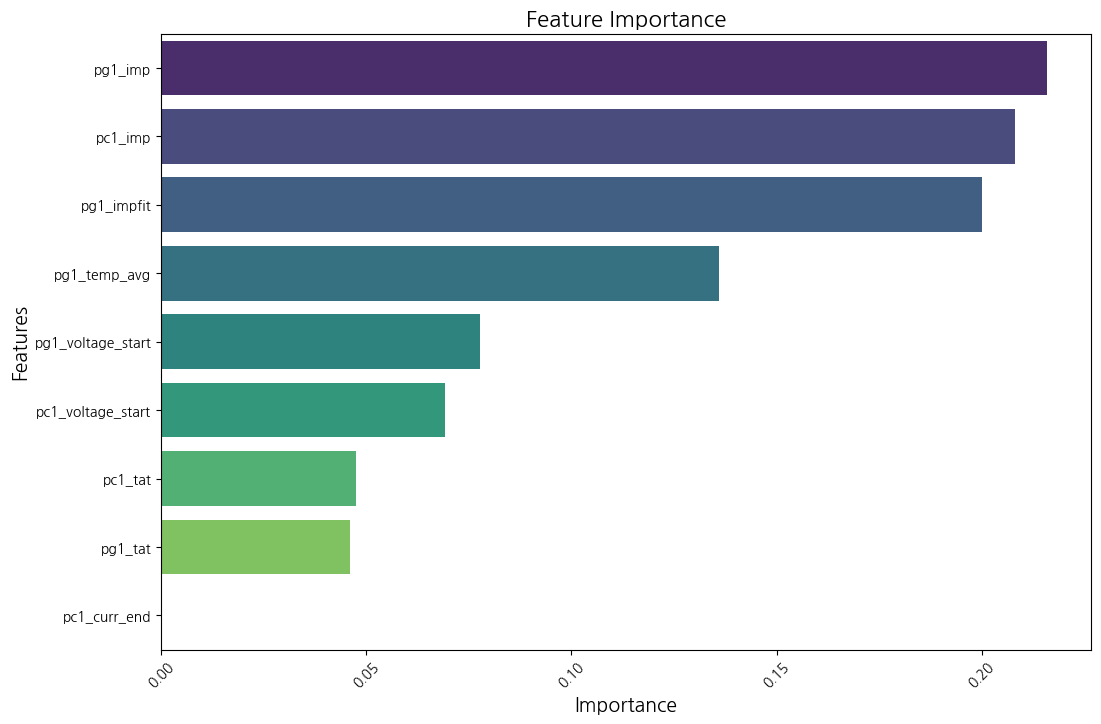

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [98]:
# GridSearchCV 활용
params = {
    'max_depth' : [4, 8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

dt_clf = DecisionTreeClassifier(random_state=123)
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear2G_train_x, df_clear2G_train_y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [99]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 2}
최고 예측 정확도 : 0.9699


In [100]:
dt_clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=12, max_depth=4, random_state=123)
dt_clf.fit(df_clear2G_train_x, df_clear2G_train_y)
y_pred = dt_clf.predict(df_clear2G_test_x)

In [101]:
accuracy = accuracy_score(df_clear2G_test_y, y_pred)
confusion = confusion_matrix(df_clear2G_test_y, y_pred)
precision = precision_score(df_clear2G_test_y, y_pred)
recall = recall_score(df_clear2G_test_y, y_pred)
f1 = f1_score(df_clear2G_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12477    21]
 [  359    10]]
평가 지표
Accuracy : 0.970467 
Precision : 0.322581 
Recall : 0.027100 
F1_score : 0.050000


In [102]:
importance = dt_clf.feature_importances_
feature_names = df_clear2G_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
pg1_imp              0.448468
pg1_impfit           0.226875
pg1_temp_avg         0.168009
pc1_imp              0.112265
pg1_tat              0.038127
pc1_tat              0.006257
pg1_voltage_start    0.000000
pc1_voltage_start    0.000000
pc1_curr_end         0.000000
dtype: float64


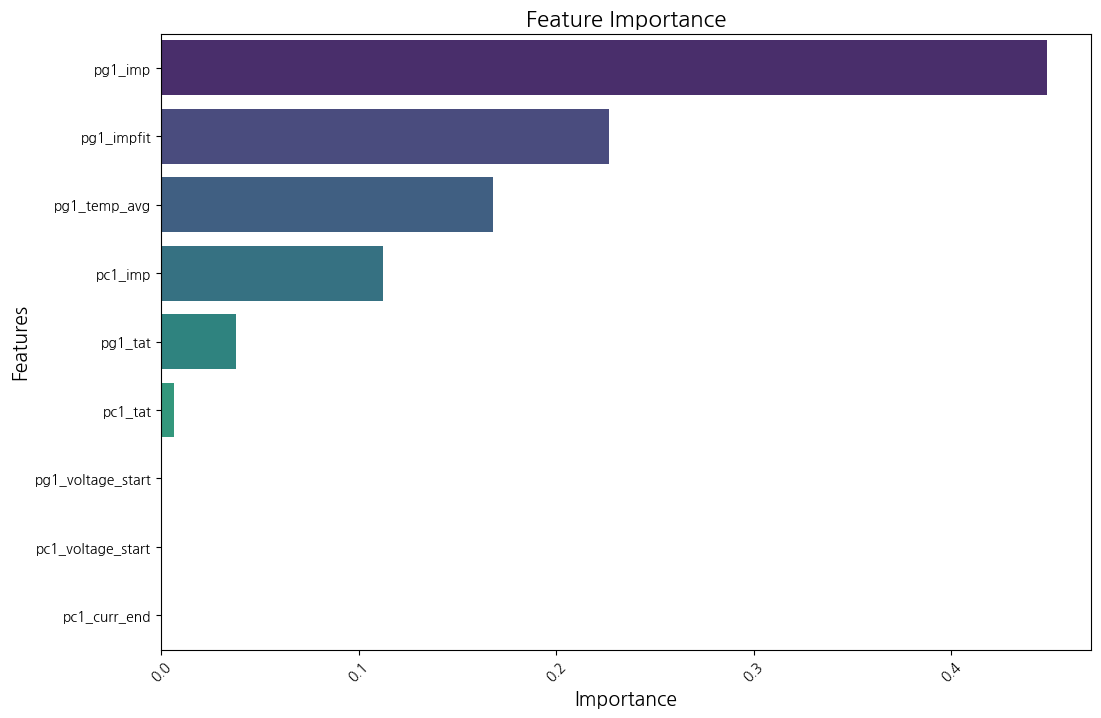

In [103]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Grading RF_clf

In [104]:
df_clear2G = df_clear2[['judge_code','pg1_tat','pg1_impfit', 'pg1_imp','pg1_voltage_start',
                        'pg1_temp_avg', 'pc1_tat', 'pc1_imp', 'pc1_voltage_start',
                        'pc1_curr_end',]]

In [105]:
df_clear2G_y = df_clear2G['judge_code']
df_clear2G_x = df_clear2G.drop('judge_code', axis=1)
df_clear2G_train_x, df_clear2G_test_x, df_clear2G_train_y, df_clear2G_test_y = train_test_split(
    df_clear2G_x, df_clear2G_y, test_size=0.3, random_state=123)

In [106]:
print('train data X size : {}'.format(df_clear2G_train_x.shape))
print('test data X size : {}'.format(df_clear2G_test_x.shape))
print('train data Y size : {}'.format(df_clear2G_train_y.shape))
print('test data Y size : {}'.format(df_clear2G_test_y.shape))

train data X size : (30021, 9)
test data X size : (12867, 9)
train data Y size : (30021,)
test data Y size : (12867,)


In [107]:
rf_clf = RandomForestClassifier(random_state=123)
rf_clf.fit(df_clear2G_train_x, df_clear2G_train_y)

# 예측 및 성능 평가
y_pred = rf_clf.predict(df_clear2G_test_x)

In [108]:
accuracy = accuracy_score(df_clear2G_test_y, y_pred)
confusion = confusion_matrix(df_clear2G_test_y, y_pred)
precision = precision_score(df_clear2G_test_y, y_pred)
recall = recall_score(df_clear2G_test_y, y_pred)
f1 = f1_score(df_clear2G_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12469    29]
 [  329    40]]
평가 지표
Accuracy : 0.972177 
Precision : 0.579710 
Recall : 0.108401 
F1_score : 0.182648


In [109]:
importance = rf_clf.feature_importances_
feature_names = df_clear2G_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
pg1_imp              0.221641
pg1_impfit           0.216151
pc1_imp              0.187294
pg1_temp_avg         0.130979
pg1_voltage_start    0.079671
pc1_voltage_start    0.069206
pc1_tat              0.052477
pg1_tat              0.042581
pc1_curr_end         0.000000
dtype: float64


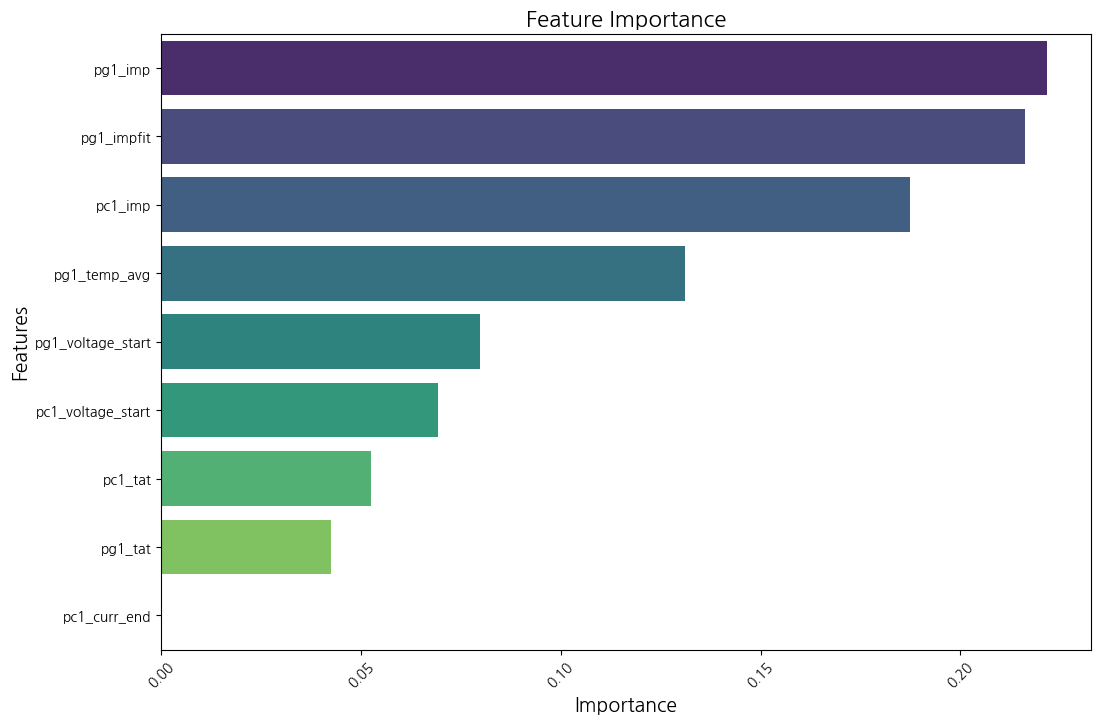

In [110]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [111]:
# GridSearchCV 활용
params = {
    'n_estimators' : [10, 15, 20, 50],
    'max_depth' : [4, 8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

rf_clf = RandomForestClassifier(random_state=123, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear2G_train_x, df_clear2G_train_y)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16],
                         'n_estimators': [10, 15, 20, 50]})

In [112]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 15}
최고 예측 정확도 : 0.9707


In [113]:
rf_clf = RandomForestClassifier(n_estimators=15, min_samples_split=16,
                                min_samples_leaf=1, max_depth=24, random_state=123)
rf_clf.fit(df_clear2G_train_x, df_clear2G_train_y)
y_pred = rf_clf.predict(df_clear2G_test_x)

In [114]:
accuracy = accuracy_score(df_clear2G_test_y, y_pred)
confusion = confusion_matrix(df_clear2G_test_y, y_pred)
precision = precision_score(df_clear2G_test_y, y_pred)
recall = recall_score(df_clear2G_test_y, y_pred)
f1 = f1_score(df_clear2G_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12480    18]
 [  353    16]]
평가 지표
Accuracy : 0.971167 
Precision : 0.470588 
Recall : 0.043360 
F1_score : 0.079404


In [115]:
importance = rf_clf.feature_importances_
feature_names = df_clear2G_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
pg1_impfit           0.238452
pg1_imp              0.238136
pc1_imp              0.177996
pg1_temp_avg         0.133743
pg1_voltage_start    0.063246
pc1_voltage_start    0.056900
pc1_tat              0.050509
pg1_tat              0.041017
pc1_curr_end         0.000000
dtype: float64


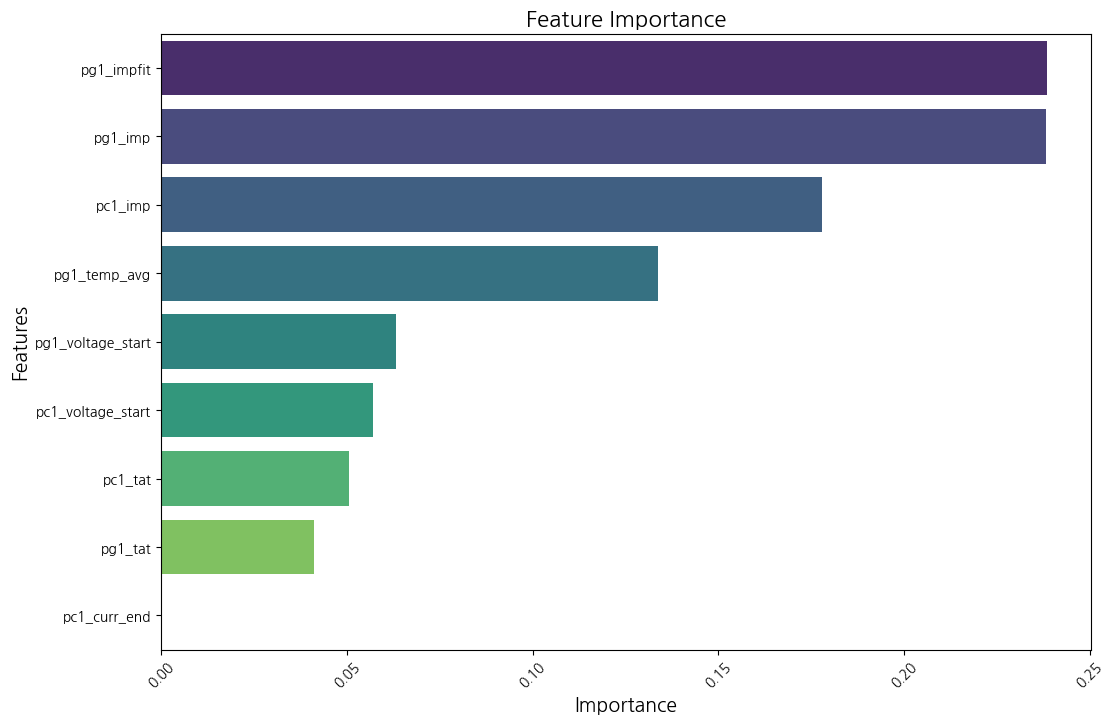

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

---

#### Cell 양불판정 분석 결과

- Formation DT ( with GridSearchCV )
    - 주 영향인자 : dc1_capafit, c3_voltage_avg, dc2_voltage_avg, c2_curr_end
    - 정확도 : 0.971
    - F1-score : 0.05
- Formation RF ( with GridSearchCV )
    - 주 영향인자 : c2_curr_end, c4_temp_avg, dc2_temp_avg, c3_tat
    - 정확도 : 0.972
    - F1-score : 0.28
- Formation GB
    - 주 영향인자 : dc1_capafit, c2_curr_end, c4_temp_avg, dc2_voltage_avg
    - 정확도 : 0.973
    - F1-score : 0.218
- Formation XGB
    - 주 영향인자 : dc1_capafit, c2_curr_end, ocv1_ocv, c4_temp_avg
    - 정확도 : 0.972
    - F1-score : 0.23
- Grading DT ( with GridSearchCV )
    - 주 영향인자 : pg1_imp, pg1_impfit, pg1_temp_avg
    - 정확도 : 0.97
    - F1-score : 0.05
- Grading RF
    - 주 영향인자 : pg1_impfit, pg1_imp, pc1_imp
    - 정확도 : 0.971
    - F1-score : 0.08
  
- 모델 선정 및 최종 결론
    - XGB와 RF 의 경우, F1-score의 성능이 우수하며 accuracy 지표 또한 높게 나타나지만 XGB 의 경우, 현 데이터 특성상 50 차원 정도의 데이터로 모델이 복잡해지면서 해석이 어려워질 수 있으며,
각 트리가 이전 트리의 오류를 수정하는 방식으로 학습되기 때문에, 전체 모델의 동작을 직관적으로 이해하기 어렵기에 해석이 용이하고 성능 또한 우수한 RF를 선정함
    - Formation 양불판정의 주요인자 => 충전#2 종료전류, 충전#4 평균온도, 방전#2 평균온도, 충전#3 공정시간
    - Grading 양불판정의 주요인자 => PowerGrading#1 fitted imp, PowerGrading#1 imp, PowerCharging#1 imp

---

### 영향인자 EDA

#### 충전#2 종료전류

#### 충전#4 평균온도

#### 방전#2 평균온도

#### 충전#3 공정시간

---

## y2 = Tray 불량률 (회귀)

In [117]:
df_clear2_groupby = df_clear2.groupby('tray_id_x')['cell_id']
df_clear2_groupby.count()

tray_id_x
TRAY-1002    25
TRAY-1003    25
TRAY-1004    25
TRAY-1005    25
TRAY-1006    25
             ..
TRAY-2787    24
TRAY-2788    25
TRAY-2789    24
TRAY-2790    24
TRAY-2791    25
Name: cell_id, Length: 1786, dtype: int64

In [118]:
df_counts = df_clear2_groupby.count()
print(df_counts.values)
print(df_counts.index)

[25 25 25 ... 24 24 25]
Index(['TRAY-1002', 'TRAY-1003', 'TRAY-1004', 'TRAY-1005', 'TRAY-1006',
       'TRAY-1007', 'TRAY-1008', 'TRAY-1009', 'TRAY-1010', 'TRAY-1011',
       ...
       'TRAY-2782', 'TRAY-2783', 'TRAY-2784', 'TRAY-2785', 'TRAY-2786',
       'TRAY-2787', 'TRAY-2788', 'TRAY-2789', 'TRAY-2790', 'TRAY-2791'],
      dtype='object', name='tray_id_x', length=1786)


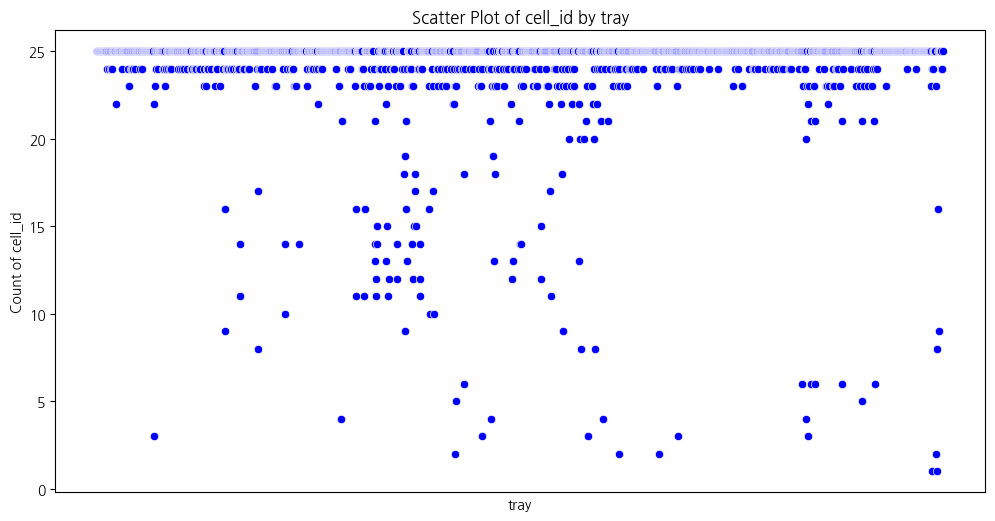

In [119]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_counts.index, y=df_counts.values, marker='o', color='blue')
plt.title('Scatter Plot of cell_id by tray')
plt.xlabel('tray')
plt.ylabel('Count of cell_id')
plt.xticks([])
plt.show()

<p style="font-size:20px">
tray 내 cell의 개수가 23 미만인 데이터는 온도, 습도와 같은 다양한 특성과 특정 공정 설비에서 불완전하고 왜곡된 결과를 도출할 수 있기에 이를 제거함</p>

In [120]:
cond1 = df_counts.values > 22

temp = df_counts.index[cond1]

In [121]:
df_clear3 = df_clear2[df_clear2['tray_id_x'].isin(temp)].reset_index(drop=True)
df_clear3

lot_id_x  tray_id_x          dt_start_x     cell_id  rta1_cell_no  \
0      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10747            10   
1      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10748             7   
2      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10749            19   
3      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10750            24   
4      LOT-100  TRAY-1023  01SEP2022:10:01:25  CELL-10751            17   
...        ...        ...                 ...         ...           ...   
41248  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53649            16   
41249  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53650            14   
41250  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-53651             2   
41251  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54355            15   
41252  LOT-144  TRAY-2791  17SEP2022:18:33:15  CELL-54356            10   

       rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
0                 8            33             8             3            25   
1                 8            33             8             3            25   
2                 8            33             8             3            25   
3                 8            33             8             3            25   
4                 8            33             8             3            25   
...             ...           ...           ...           ...           ...   
41248             8            21             3             2            23   
41249             8            21             3             2            23   
41250             8            21             3             2            23   
41251             8            21             3             2            23   
41252             8            21             3             2            23   

       ...  pg1_tat  pc1_tat  sa1_tat  socv1_tat   sa2_tat  socv2_tat  \
0      ...      290      290    53500          5  355357.0        5.0   
1      ...      290      290    53500          5  355357.0        5.0   
2      ...      290      290    53500          5  355357.0        5.0   
3      ...      290      290    53501          5  355357.0        5.0   
4      ...      290      290    53500          5  355357.0        5.0   
...    ...      ...      ...      ...        ...       ...        ...   
41248  ...      290      291    43419          4  345062.0        5.0   
41249  ...      290      291    43419          4  345062.0        5.0   
41250  ...      290      291    43419          4  345062.0        5.0   
41251  ...      290      291    43419          4  345062.0        5.0   
41252  ...      290      291    43419          4  345062.0        5.0   

        sa3_tat  socv3_tat   sa4_tat  judge_code  
0      215150.0        5.0  207532.0         0.0  
1      215150.0        5.0  207532.0         0.0  
2      215150.0        5.0  207532.0         0.0  
3      215150.0        5.0  207532.0         0.0  
4      215150.0        5.0  207532.0         0.0  
...         ...        ...       ...         ...  
41248  215255.0        5.0  156836.0         0.0  
41249  215255.0        5.0  156836.0         0.0  
41250  215255.0        5.0  156836.0         0.0  
41251  215255.0        5.0  156836.0         0.0  
41252  215255.0        5.0  156836.0         1.0  

[41253 rows x 137 columns]

In [122]:
df_clear3_groupby = df_clear3.groupby('tray_id_x')

group_counts = df_clear3_groupby.agg({
    'cell_id': 'count',
    'judge_code': 'count'
})
group_counts

cell_id  judge_code
tray_id_x                     
TRAY-1002       25          25
TRAY-1003       25          25
TRAY-1004       25          25
TRAY-1005       25          25
TRAY-1006       25          25
...            ...         ...
TRAY-2787       24          24
TRAY-2788       25          25
TRAY-2789       24          24
TRAY-2790       24          24
TRAY-2791       25          25

[1666 rows x 2 columns]

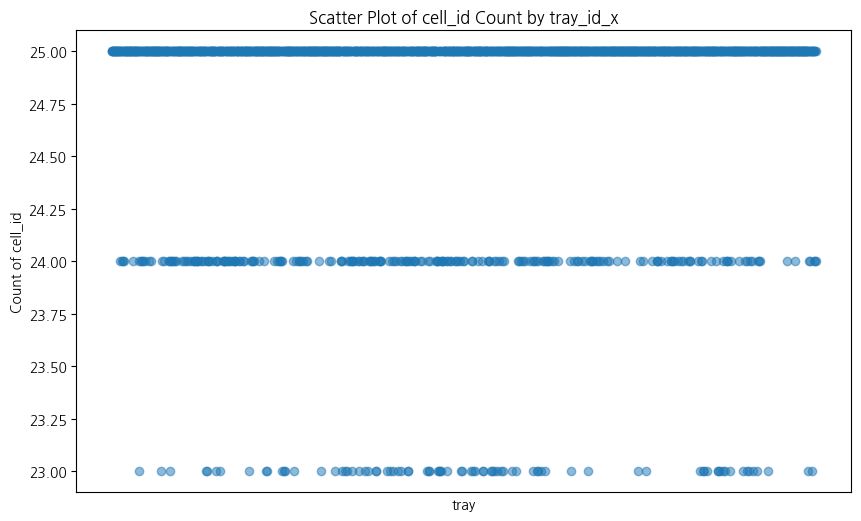

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(group_counts.index, group_counts['cell_id'], alpha=0.5)
plt.xlabel('tray')
plt.ylabel('Count of cell_id')
plt.title('Scatter Plot of cell_id Count by tray_id_x')
plt.xticks([])
plt.show()

### Tray 불량률 영향인자 및 회귀예측

#### Formation LinearRegressor_reg

In [124]:
df_clear3tray = df_clear3.groupby('tray_id_x')['judge_code'].value_counts().unstack(fill_value=0)
df_clear3tray['불량률'] = df_clear3tray[1] / (df_clear3tray[0] + df_clear3tray[1])
df_clear3tray

judge_code  0.0  1.0       불량률
tray_id_x                     
TRAY-1002    25    0  0.000000
TRAY-1003    25    0  0.000000
TRAY-1004    25    0  0.000000
TRAY-1005    25    0  0.000000
TRAY-1006    25    0  0.000000
...         ...  ...       ...
TRAY-2787    20    4  0.166667
TRAY-2788    19    6  0.240000
TRAY-2789    22    2  0.083333
TRAY-2790    23    1  0.041667
TRAY-2791    20    5  0.200000

[1666 rows x 3 columns]

In [125]:
df_avg = df_clear3.groupby('tray_id_x')[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']].mean()
df_avg

judge_code     ocv1_ocv   c1_capa  c1_ccval   c1_time_cc  \
tray_id_x                                                             
TRAY-1002    0.000000  3336.040000  6483.240  6483.240  3434.760000   
TRAY-1003    0.000000  3340.200000  6451.720  6451.720  3417.880000   
TRAY-1004    0.000000  3338.560000  6464.800  6464.800  3424.480000   
TRAY-1005    0.000000  3338.440000  6464.160  6464.160  3424.120000   
TRAY-1006    0.000000  3339.440000  6449.440  6449.440  3416.360000   
...               ...          ...       ...       ...          ...   
TRAY-2787    0.166667  3353.916667  6452.250  6452.250  3418.125000   
TRAY-2788    0.240000  3339.640000  6478.160  6478.160  3431.800000   
TRAY-2789    0.083333  3330.458333  6460.625  6460.625  3422.166667   
TRAY-2790    0.041667  3323.250000  6433.750  6433.750  3408.375000   
TRAY-2791    0.200000  3330.080000  6448.160  6448.160  3415.760000   

           c1_temp_avg  dc1_curr_end  dc1_voltage_avg    dc1_capa  \
tray_id_x                                                           
TRAY-1002        291.0   6799.080000      4109.840000  544.440000   
TRAY-1003        264.0   6799.200000      4107.440000  544.080000   
TRAY-1004        258.0   6799.240000      4108.280000  544.200000   
TRAY-1005        271.0   6799.400000      4108.400000  544.080000   
TRAY-1006        263.0   6799.600000      4106.240000  544.480000   
...                ...           ...              ...         ...   
TRAY-2787        261.0   6799.416667      4110.500000  544.250000   
TRAY-2788        272.0   6799.280000      4112.160000  544.080000   
TRAY-2789        276.0   6799.333333      4110.625000  544.208333   
TRAY-2790        273.0   6799.458333      4108.708333  544.541667   
TRAY-2791        255.0   6799.080000      4108.440000  544.120000   

           dc1_temp_avg  ...     ocv2_ocv    ocv1_tat       c1_tat  \
tray_id_x                ...                                         
TRAY-1002         291.0  ...  3763.560000  118.000000  3580.000000   
TRAY-1003         263.0  ...  3763.440000  118.000000  3546.000000   
TRAY-1004         259.0  ...  3763.560000  118.960000  3555.000000   
TRAY-1005         271.0  ...  3764.400000  119.000000  3553.000000   
TRAY-1006         262.0  ...  3762.880000  118.000000  3548.000000   
...                 ...  ...          ...         ...          ...   
TRAY-2787         264.0  ...  3763.833333  119.000000  3548.000000   
TRAY-2788         274.0  ...  3763.280000  118.000000  3565.000000   
TRAY-2789         278.0  ...  3763.041667  118.458333  3561.583333   
TRAY-2790         278.0  ...  3764.500000  120.000000  3543.041667   
TRAY-2791         256.0  ...  3763.200000  118.000000  3553.000000   

              dc1_tat      c2_tat     dc2_tat   c3_tat  dc3_tat   c4_tat  \
tray_id_x                                                                  
TRAY-1002  405.000000  453.000000  405.000000  1808.20   3903.0  3489.00   
TRAY-1003  404.000000  456.000000  404.000000  1748.00   3895.0  3428.00   
TRAY-1004  405.000000  456.000000  405.000000  1722.00   3892.0  3441.00   
TRAY-1005  405.000000  454.080000  404.000000  1763.00   3900.0  3435.68   
TRAY-1006  403.320000  459.000000  404.000000  1767.96   3889.0  3476.00   
...               ...         ...         ...      ...      ...      ...   
TRAY-2787  405.000000  445.041667  405.875000  1657.00   3892.0  3367.00   
TRAY-2788  405.000000  444.000000  404.000000  1269.00   3880.0  3398.00   
TRAY-2789  404.416667  450.000000  404.000000  1804.00   3883.0  3425.00   
TRAY-2790  404.000000  456.000000  404.791667  1623.00   3873.0  3516.00   
TRAY-2791  405.000000  451.000000  405.000000  1854.00   3888.0  3462.00   

           ocv2_tat  
tray_id_x            
TRAY-1002    118.00  
TRAY-1003    117.32  
TRAY-1004    118.00  
TRAY-1005    118.00  
TRAY-1006    118.00  
...             ...  
TRAY-2787    118.00  
TRAY-2788    118.00  
TRAY-2789    118.00  
TRAY-2790    118.00  
TRAY-2791    118.00  

[1

In [126]:
df_clear3trayA = pd.merge(df_clear3tray, df_avg, on = 'tray_id_x', how = 'inner')
df_clear3trayA

0.0  1.0       불량률  judge_code     ocv1_ocv   c1_capa  c1_ccval  \
tray_id_x                                                                    
TRAY-1002   25    0  0.000000    0.000000  3336.040000  6483.240  6483.240   
TRAY-1003   25    0  0.000000    0.000000  3340.200000  6451.720  6451.720   
TRAY-1004   25    0  0.000000    0.000000  3338.560000  6464.800  6464.800   
TRAY-1005   25    0  0.000000    0.000000  3338.440000  6464.160  6464.160   
TRAY-1006   25    0  0.000000    0.000000  3339.440000  6449.440  6449.440   
...        ...  ...       ...         ...          ...       ...       ...   
TRAY-2787   20    4  0.166667    0.166667  3353.916667  6452.250  6452.250   
TRAY-2788   19    6  0.240000    0.240000  3339.640000  6478.160  6478.160   
TRAY-2789   22    2  0.083333    0.083333  3330.458333  6460.625  6460.625   
TRAY-2790   23    1  0.041667    0.041667  3323.250000  6433.750  6433.750   
TRAY-2791   20    5  0.200000    0.200000  3330.080000  6448.160  6448.160   

            c1_time_cc  c1_temp_avg  dc1_curr_end  ...     ocv2_ocv  \
tray_id_x                                          ...                
TRAY-1002  3434.760000        291.0   6799.080000  ...  3763.560000   
TRAY-1003  3417.880000        264.0   6799.200000  ...  3763.440000   
TRAY-1004  3424.480000        258.0   6799.240000  ...  3763.560000   
TRAY-1005  3424.120000        271.0   6799.400000  ...  3764.400000   
TRAY-1006  3416.360000        263.0   6799.600000  ...  3762.880000   
...                ...          ...           ...  ...          ...   
TRAY-2787  3418.125000        261.0   6799.416667  ...  3763.833333   
TRAY-2788  3431.800000        272.0   6799.280000  ...  3763.280000   
TRAY-2789  3422.166667        276.0   6799.333333  ...  3763.041667   
TRAY-2790  3408.375000        273.0   6799.458333  ...  3764.500000   
TRAY-2791  3415.760000        255.0   6799.080000  ...  3763.200000   

             ocv1_tat       c1_tat     dc1_tat      c2_tat     dc2_tat  \
tray_id_x                                                                
TRAY-1002  118.000000  3580.000000  405.000000  453.000000  405.000000   
TRAY-1003  118.000000  3546.000000  404.000000  456.000000  404.000000   
TRAY-1004  118.960000  3555.000000  405.000000  456.000000  405.000000   
TRAY-1005  119.000000  3553.000000  405.000000  454.080000  404.000000   
TRAY-1006  118.000000  3548.000000  403.320000  459.000000  404.000000   
...               ...          ...         ...         ...         ...   
TRAY-2787  119.000000  3548.000000  405.000000  445.041667  405.875000   
TRAY-2788  118.000000  3565.000000  405.000000  444.000000  404.000000   
TRAY-2789  118.458333  3561.583333  404.416667  450.000000  404.000000   
TRAY-2790  120.000000  3543.041667  404.000000  456.000000  404.791667   
TRAY-2791  118.000000  3553.000000  405.000000  451.000000  405.000000   

            c3_tat  dc3_tat   c4_tat  ocv2_tat  
tray_id_x                                       
TRAY-1002  1808.20   3903.0  3489.00    118.00  
TRAY-1003  1748.00   3895.0  3428.00    117.32  
TRAY-1004  1722.00   3892.0  3441.00    118.00  
TRAY-1005  1763.00   3900.0  3435.68    118.00  
TRAY-1006  1767.96   3889.0  3476.00    118.00  
...            ...      ...      ...       ...  
TRAY-2787  1657.00   3892.0  3367.00    118.00  
TRAY-2788  1269.00   3880.0  3398.00    118.00  
TRAY-2789  1804.00   3883.0  3425.00    118.00  
TRAY-2790  1623.00   3873.0  3516.00    118.00  
TRAY-2791  1854.00   3888.0  3462.00    118.00  

[1666 rows x 56 columns]

In [127]:
df_clear3trayA_y = df_clear3trayA['불량률']
df_clear3trayA_x = df_clear3trayA.drop('불량률', axis=1)

df_clear3trayA_x = df_clear3trayA.drop(df_clear3trayA.columns[[0, 1, 2, 3]], axis=1)
df_clear3trayA_x

ocv1_ocv   c1_capa  c1_ccval   c1_time_cc  c1_temp_avg  \
tray_id_x                                                              
TRAY-1002  3336.040000  6483.240  6483.240  3434.760000        291.0   
TRAY-1003  3340.200000  6451.720  6451.720  3417.880000        264.0   
TRAY-1004  3338.560000  6464.800  6464.800  3424.480000        258.0   
TRAY-1005  3338.440000  6464.160  6464.160  3424.120000        271.0   
TRAY-1006  3339.440000  6449.440  6449.440  3416.360000        263.0   
...                ...       ...       ...          ...          ...   
TRAY-2787  3353.916667  6452.250  6452.250  3418.125000        261.0   
TRAY-2788  3339.640000  6478.160  6478.160  3431.800000        272.0   
TRAY-2789  3330.458333  6460.625  6460.625  3422.166667        276.0   
TRAY-2790  3323.250000  6433.750  6433.750  3408.375000        273.0   
TRAY-2791  3330.080000  6448.160  6448.160  3415.760000        255.0   

           dc1_curr_end  dc1_voltage_avg    dc1_capa  dc1_temp_avg  \
tray_id_x                                                            
TRAY-1002   6799.080000      4109.840000  544.440000         291.0   
TRAY-1003   6799.200000      4107.440000  544.080000         263.0   
TRAY-1004   6799.240000      4108.280000  544.200000         259.0   
TRAY-1005   6799.400000      4108.400000  544.080000         271.0   
TRAY-1006   6799.600000      4106.240000  544.480000         262.0   
...                 ...              ...         ...           ...   
TRAY-2787   6799.416667      4110.500000  544.250000         264.0   
TRAY-2788   6799.280000      4112.160000  544.080000         274.0   
TRAY-2789   6799.333333      4110.625000  544.208333         278.0   
TRAY-2790   6799.458333      4108.708333  544.541667         278.0   
TRAY-2791   6799.080000      4108.440000  544.120000         256.0   

           dc1_capafit  ...     ocv2_ocv    ocv1_tat       c1_tat     dc1_tat  \
tray_id_x               ...                                                     
TRAY-1002   532.440000  ...  3763.560000  118.000000  3580.000000  405.000000   
TRAY-1003   540.080000  ...  3763.440000  118.000000  3546.000000  404.000000   
TRAY-1004   541.200000  ...  3763.560000  118.960000  3555.000000  405.000000   
TRAY-1005   537.080000  ...  3764.400000  119.000000  3553.000000  405.000000   
TRAY-1006   540.480000  ...  3762.880000  118.000000  3548.000000  403.320000   
...                ...  ...          ...         ...          ...         ...   
TRAY-2787   540.250000  ...  3763.833333  119.000000  3548.000000  405.000000   
TRAY-2788   536.080000  ...  3763.280000  118.000000  3565.000000  405.000000   
TRAY-2789   535.208333  ...  3763.041667  118.458333  3561.583333  404.416667   
TRAY-2790   535.541667  ...  3764.500000  120.000000  3543.041667  404.000000   
TRAY-2791   542.120000  ...  3763.200000  118.000000  3553.000000  405.000000   

               c2_tat     dc2_tat   c3_tat  dc3_tat   c4_tat  ocv2_tat  
tray_id_x                                                               
TRAY-1002  453.000000  405.000000  1808.20   3903.0  3489.00    118.00  
TRAY-1003  456.000000  404.000000  1748.00   3895.0  3428.00    117.32  
TRAY-1004  456.000000  405.000000  1722.00   3892.0  3441.00    118.00  
TRAY-1005  454.080000  404.000000  1763.00   3900.0  3435.68    118.00  
TRAY-1006  459.000000  404.000000  1767.96   3889.0  3476.00    118.00  
...               ...         ...      ...      ...      ...       ...  
TRAY-2787  445.041667  405.875000  1657.00   3892.0  3367.00    118.00  
TRAY-2788  444.000000  404.000000  1269.00   3880.0  3398.00    118.00  
TRAY-2789  450.000000  404.000000  1804.00   3883.0  3425.00    118.00  
TRAY-2790  456.000000  404.791667  1623.00   3873.0  3516.00    118.00  
TRAY-2791  451.000000  405.000000  1854.00   3888.0  3462.00    118.00  

[1666 rows x 52 columns]

In [128]:
df_clear3trayA_train_x, df_clear3trayA_test_x, df_clear3trayA_train_y, df_clear3trayA_test_y = train_test_split(
    df_clear3trayA_x, df_clear3trayA_y, test_size=0.3, random_state=123)

In [129]:
lr = LinearRegression()
lr.fit(df_clear3trayA_train_x, df_clear3trayA_train_y)

LinearRegression()

In [130]:
y_preds = lr.predict(df_clear3trayA_test_x)
mse = mean_squared_error(df_clear3trayA_test_y, y_preds)
rmse = np.sqrt(mse)

In [131]:
print("MSE : {0:.3f} , RMSE : {1:.3f}".format(mse, rmse))
print("Variance score : {0:.3f}".format(r2_score(df_clear3trayA_test_y, y_preds)))

MSE : 0.006 , RMSE : 0.080
Variance score : 0.042


In [132]:
print("회귀 계수 : ",np.round(lr.coef_,4))
print("절편 : ",lr.intercept_)

회귀 계수 :  [ 0.0009  0.007   0.007  -0.0245  0.0023 -0.0158  0.0019  0.008   0.0077
  0.0209 -0.0078 -0.022  -0.0048 -0.0048  0.0171 -0.0011 -0.0168  0.0145
 -0.0454  0.0021  0.0262 -0.026  -0.0099 -0.0121  0.0073 -0.      0.0141
  0.0151  0.0005  0.0028  0.01   -0.0548  0.0163  0.0535 -0.0166 -0.0176
  0.0014  0.0135  0.0006  0.0035 -0.0276  0.0004  0.0102 -0.0017  0.
 -0.0029  0.0002 -0.0002 -0.     -0.      0.     -0.0007]
절편 :  299.31896805007983


In [133]:
# 회귀 모델 생성
X = df_clear3trayA_train_x  # 독립 변수
y = df_clear3trayA_train_y  # 종속 변수

X = sm.add_constant(X)  # 절편을 위한 상수항 추가

model = sm.OLS(y, X)  # OLS 모델 생성
result = model.fit()  # 모델 피팅

# 회귀분석 결과 요약
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    불량률   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.285
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           6.76e-13
Time:                        12:52:13   Log-Likelihood:                 1156.7
No. Observations:                1166   AIC:                            -2211.
Df Residuals:                    1115   BIC:                            -1953.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             299.3190    216.399     

전체 변수에 대한 회귀모델 생성.

우선 해당 모델에 대한 유의성 검정인 F검정의 p-value 값이 거의 0에 가까운 것으로 보아 해당 모델은 회귀모델로서 유의.

수정결정계수( Adj. R-squared )는 0.089로 이 모델을 통하여 설명변수를 9% 정도 설명할 수 있음

Prob(Omnibus) 값이 0.000로 유의수준을 0.05라고 보았을 때 잔차의 정규성을 만족하지 않음 -> 정규성 문제 해결요망  
Durbin-Watson 값은 2.047이므로 잔차 독립성 만족.

- *LR 초기모델 확인결과*

c1_temp_avg, dc1_capafit, dc2_capafit, dc3_capa, dc3_temp_avg, dc3_capafit 이 유의함

실제로 Tray 불량률은 Tray 내부의 불량 cell 개수에 의한 불량률이므로 분류모델의 영향인자와 유사한 측면을 보임

## 공정 설비별 불량률 EDA 확인

In [134]:
group_counts = df_clear3.groupby('tray_id_x')['judge_code'].value_counts().unstack(fill_value=0)

group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])

print(group_counts)

judge_code  0.0  1.0       불량률
tray_id_x                     
TRAY-1002    25    0  0.000000
TRAY-1003    25    0  0.000000
TRAY-1004    25    0  0.000000
TRAY-1005    25    0  0.000000
TRAY-1006    25    0  0.000000
...         ...  ...       ...
TRAY-2787    20    4  0.166667
TRAY-2788    19    6  0.240000
TRAY-2789    22    2  0.083333
TRAY-2790    23    1  0.041667
TRAY-2791    20    5  0.200000

[1666 rows x 3 columns]


In [135]:
# 공정 설비 데이터
df_clear3[['rta1_box_col', 'rta1_box_row', 'rta1_box_dan',
    'hta1_box_col', 'hta1_box_row', 'hta1_box_dan',
    'rta2_box_col', 'rta2_box_row', 'rta2_box_dan',
    'ocv1_box_col', 'ocv1_box_dan',
    'c1_box_col', 'c1_box_dan',
    'dc1_box_col', 'dc1_box_dan',
    'c2_box_col', 'c2_box_dan',
    'dc2_box_col', 'dc2_box_dan',
    'c3_box_col', 'c3_box_dan',
    'dc3_box_col', 'dc3_box_dan',
    'c4_box_col', 'c4_box_dan',
    'ocv2_box_col', 'ocv2_box_dan',
    'pg1_box_col', 'pg1_box_dan',
    'pc1_box_col', 'pc1_box_dan',
    'sa1_box_col', 'sa1_box_row', 'sa1_box_dan',
    'sa2_box_col', 'sa2_box_row', 'sa2_box_dan',
    'sa3_box_col', 'sa3_box_row', 'sa3_box_dan']]

rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
0                 8            33             8             3            25   
1                 8            33             8             3            25   
2                 8            33             8             3            25   
3                 8            33             8             3            25   
4                 8            33             8             3            25   
...             ...           ...           ...           ...           ...   
41248             8            21             3             2            23   
41249             8            21             3             2            23   
41250             8            21             3             2            23   
41251             8            21             3             2            23   
41252             8            21             3             2            23   

       hta1_box_dan  rta2_box_col  rta2_box_row  rta2_box_dan  ocv1_box_col  \
0                 3             4            64             6            22   
1                 3             4            64             6            22   
2                 3             4            64             6            22   
3                 3             4            64             6            22   
4                 3             4            64             6            22   
...             ...           ...           ...           ...           ...   
41248             6             3            42             6             2   
41249             6             3            42             6             2   
41250             6             3            42             6             2   
41251             6             3            42             6             2   
41252             6             3            42             6             2   

       ...  pc1_box_dan  sa1_box_col  sa1_box_row  sa1_box_dan  sa2_box_col  \
0      ...            1            9           42            1            3   
1      ...            1            9           42            1            3   
2      ...            1            9           42            1            3   
3      ...            1            9           42            1            3   
4      ...            1            9           42            1            3   
...    ...          ...          ...          ...          ...          ...   
41248  ...            1           11           54            8           14   
41249  ...            1           11           54            8           14   
41250  ...            1           11           54            8           14   
41251  ...            1           11           54            8           14   
41252  ...            1           11           54            8           14   

       sa2_box_row  sa2_box_dan  sa3_box_col  sa3_box_row  sa3_box_dan  
0               64            5           14           37            4  
1               64            5           14           37            4  
2               64            5           14           37            4  
3               64            5           14           37            4  
4               64            5           14           37            4  
...            ...          ...          ...          ...          ...  
41248            5            8           11           16           13  
41249            5            8           11           16           13  
41250            5            8           11           16           13  
41251            5            8           11           16           13  
41252            5            8           11           16           13  

[41253 rows x 40 columns]

### Aging 불량률 (= rta1, hta1, rta2 공정설비 불량률)

#### rta1 공정설비 불량률

In [136]:
group_counts = df_clear3[['tray_id_x','judge_code','rta1_box_col','rta1_box_row','rta1_box_dan'
          ]].groupby(['tray_id_x', 'rta1_box_col','rta1_box_row','rta1_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                                        0.0  1.0       불량률
tray_id_x rta1_box_col rta1_box_row rta1_box_dan                    
TRAY-1002 4            8            4              25    0  0.000000
TRAY-1003 7            40           1              25    0  0.000000
TRAY-1004 7            40           1              25    0  0.000000
TRAY-1005 1            13           1              25    0  0.000000
TRAY-1006 1            13           1              25    0  0.000000
...                                               ...  ...       ...
TRAY-2787 7            17           1              20    4  0.166667
TRAY-2788 3            8            2              19    6  0.240000
TRAY-2789 3            8            2              22    2  0.083333
TRAY-2790 8            21           3              23    1  0.041667
TRAY-2791 8            21           3              20    5  0.200000

[1666 rows x 3 columns]

In [137]:
sorted_group_counts = group_counts.sort_values(by='불량률', ascending=False)
print(sorted_group_counts.head(10))

judge_code                                        0.0  1.0       불량률
tray_id_x rta1_box_col rta1_box_row rta1_box_dan                    
TRAY-1434 5            42           1               3   22  0.880000
TRAY-1752 4            65           8               4   20  0.833333
TRAY-1800 6            22           7               5   20  0.800000
TRAY-1467 1            54           9               7   18  0.720000
TRAY-1426 3            29           5               9   16  0.640000
TRAY-1430 8            39           9              10   15  0.600000
TRAY-1482 2            25           6              11   14  0.560000
TRAY-1240 1            23           6              11   14  0.560000
TRAY-1664 2            9            6              11   13  0.541667
TRAY-2174 6            63           5              12   13  0.520000


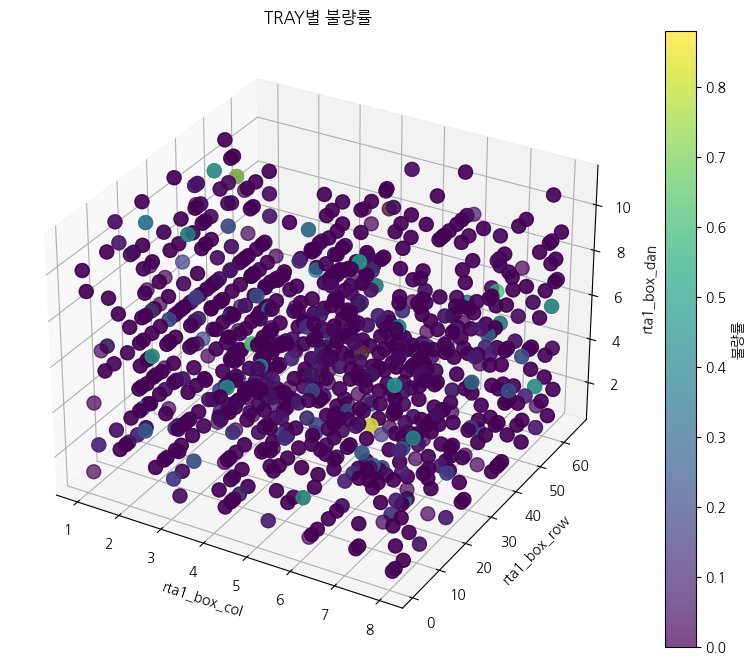

In [138]:
# 데이터 프레임에서 인덱스 레벨과 불량률 추출
x = group_counts.index.get_level_values('rta1_box_col')
y = group_counts.index.get_level_values('rta1_box_row')
z = group_counts.index.get_level_values('rta1_box_dan')
colors = group_counts['불량률']  # 불량률을 색상으로 사용

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 그리기
ax.scatter(x, y, z, c=colors, cmap='viridis', s=100, alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('rta1_box_col')
ax.set_ylabel('rta1_box_row')
ax.set_zlabel('rta1_box_dan')
ax.set_title('TRAY별 불량률')

# 컬러바 추가
cbar = plt.colorbar(ax.collections[0], label='불량률')

plt.show()

#### hta1 공정설비 불량률

In [139]:
group_counts = df_clear3[['tray_id_x','judge_code','hta1_box_col','hta1_box_row','hta1_box_dan'
          ]].groupby(['tray_id_x', 'hta1_box_col','hta1_box_row','hta1_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                                        0.0  1.0       불량률
tray_id_x hta1_box_col hta1_box_row hta1_box_dan                    
TRAY-1002 3            20           4              25    0  0.000000
TRAY-1003 2            3            5              25    0  0.000000
TRAY-1004 2            3            5              25    0  0.000000
TRAY-1005 1            2            6              25    0  0.000000
TRAY-1006 1            2            6              25    0  0.000000
...                                               ...  ...       ...
TRAY-2787 1            23           6              20    4  0.166667
TRAY-2788 2            23           4              19    6  0.240000
TRAY-2789 2            23           4              22    2  0.083333
TRAY-2790 2            23           6              23    1  0.041667
TRAY-2791 2            23           6              20    5  0.200000

[1666 rows x 3 columns]

In [140]:
sorted_group_counts = group_counts.sort_values(by='불량률', ascending=False)
print(sorted_group_counts.head(10))

judge_code                                        0.0  1.0       불량률
tray_id_x hta1_box_col hta1_box_row hta1_box_dan                    
TRAY-1434 2            45           1               3   22  0.880000
TRAY-1752 1            24           4               4   20  0.833333
TRAY-1800 1            24           7               5   20  0.800000
TRAY-1467 2            8            2               7   18  0.720000
TRAY-1426 1            22           5               9   16  0.640000
TRAY-1430 1            25           3              10   15  0.600000
TRAY-1482 3            25           6              11   14  0.560000
TRAY-1240 2            37           8              11   14  0.560000
TRAY-1664 3            15           8              11   13  0.541667
TRAY-2174 3            29           1              12   13  0.520000


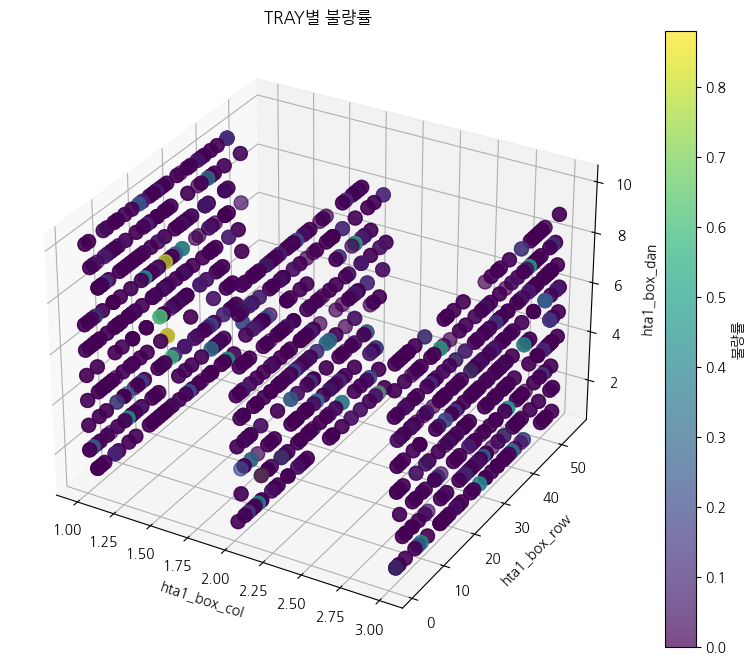

In [141]:
# 데이터 프레임에서 인덱스 레벨과 불량률 추출
x = group_counts.index.get_level_values('hta1_box_col')
y = group_counts.index.get_level_values('hta1_box_row')
z = group_counts.index.get_level_values('hta1_box_dan')
colors = group_counts['불량률']  # 불량률을 색상으로 사용

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 그리기
ax.scatter(x, y, z, c=colors, cmap='viridis', s=100, alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('hta1_box_col')
ax.set_ylabel('hta1_box_row')
ax.set_zlabel('hta1_box_dan')
ax.set_title('TRAY별 불량률')

# 컬러바 추가
cbar = plt.colorbar(ax.collections[0], label='불량률')

plt.show()

#### rta2 공정설비 불량률

In [142]:
group_counts = df_clear3[['tray_id_x','judge_code','rta2_box_col','rta2_box_row','rta2_box_dan'
          ]].groupby(['tray_id_x', 'rta2_box_col','rta2_box_row','rta2_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                                        0.0  1.0       불량률
tray_id_x rta2_box_col rta2_box_row rta2_box_dan                    
TRAY-1002 7            32           8              25    0  0.000000
TRAY-1003 7            50           2              25    0  0.000000
TRAY-1004 7            50           2              25    0  0.000000
TRAY-1005 1            10           3              25    0  0.000000
TRAY-1006 1            10           3              25    0  0.000000
...                                               ...  ...       ...
TRAY-2787 5            43           4              20    4  0.166667
TRAY-2788 7            22           7              19    6  0.240000
TRAY-2789 7            22           7              22    2  0.083333
TRAY-2790 3            42           6              23    1  0.041667
TRAY-2791 3            42           6              20    5  0.200000

[1666 rows x 3 columns]

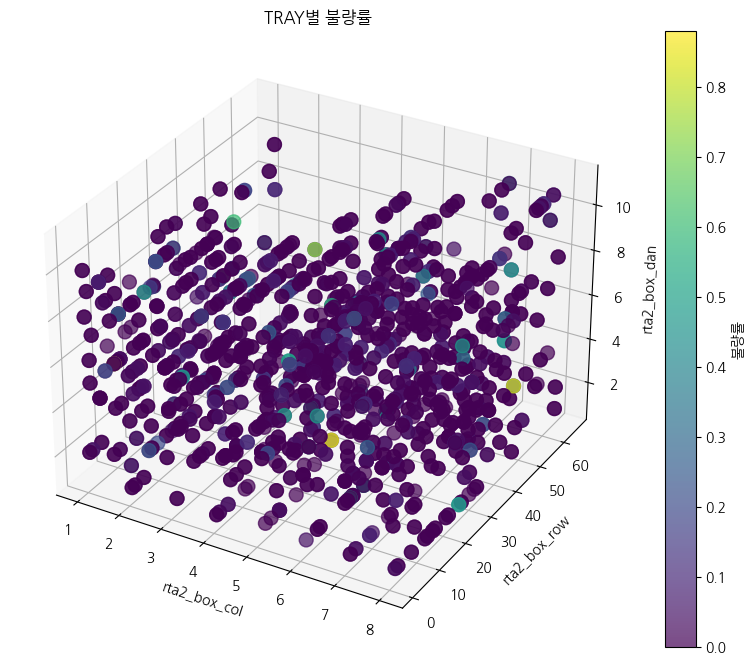

In [143]:
# 데이터 프레임에서 인덱스 레벨과 불량률 추출
x = group_counts.index.get_level_values('rta2_box_col')
y = group_counts.index.get_level_values('rta2_box_row')
z = group_counts.index.get_level_values('rta2_box_dan')
colors = group_counts['불량률']  # 불량률을 색상으로 사용

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 그리기
ax.scatter(x, y, z, c=colors, cmap='viridis', s=100, alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('rta2_box_col')
ax.set_ylabel('rta2_box_row')
ax.set_zlabel('rta2_box_dan')
ax.set_title('TRAY별 불량률')

# 컬러바 추가
cbar = plt.colorbar(ax.collections[0], label='불량률')

plt.show()

### Formation 불량률 (= ocv1, c1, ... , ocv2 공정설비 불량률)
- **formation 과정 중에는 설비 변동이 없으므로 c1 설비로 갈음함**

In [144]:
group_counts = df_clear3[['tray_id_x','judge_code','c1_box_col', 'c1_box_dan'
          ]].groupby(['tray_id_x', 'c1_box_col', 'c1_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                       0.0  1.0       불량률
tray_id_x c1_box_col c1_box_dan                    
TRAY-1002 6          9            25    0  0.000000
TRAY-1003 17         5            25    0  0.000000
TRAY-1004 22         6            25    0  0.000000
TRAY-1005 6          4            25    0  0.000000
TRAY-1006 5          4            25    0  0.000000
...                              ...  ...       ...
TRAY-2787 22         2            20    4  0.166667
TRAY-2788 7          3            19    6  0.240000
TRAY-2789 8          4            22    2  0.083333
TRAY-2790 2          11           23    1  0.041667
TRAY-2791 2          5            20    5  0.200000

[1666 rows x 3 columns]

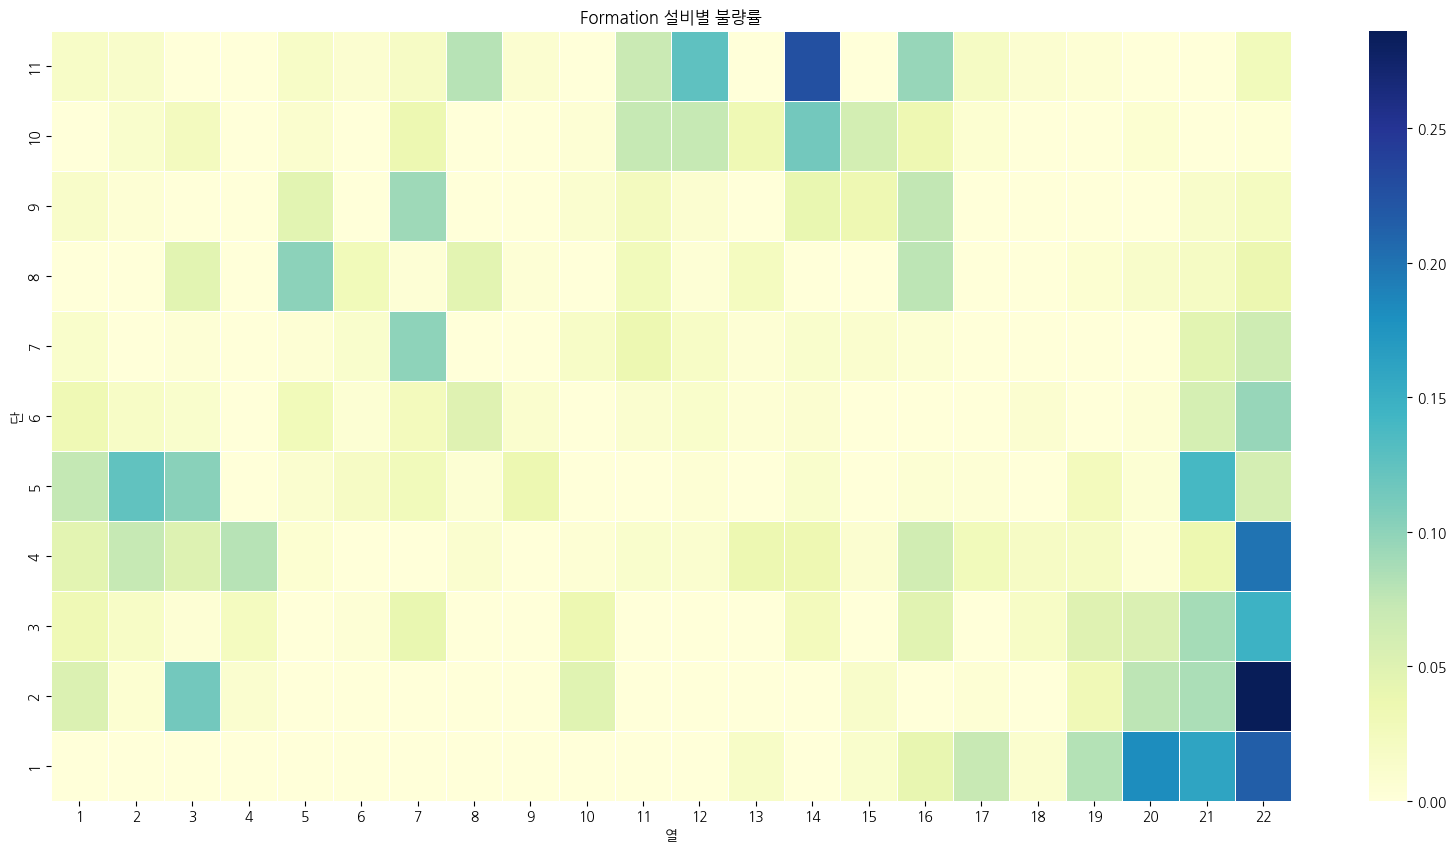

In [145]:
# 열과 단을 선택
column = 'c1_box_col'
dan = 'c1_box_dan'

# 열과 단에 대한 불량 비율 계산
group_counts = df_clear3.groupby([column, dan, 'judge_code']).size().unstack().fillna(0)
ratios = group_counts[1] / (group_counts[0] + group_counts[1])

# pivot_table 생성
pivot_table = ratios.unstack().fillna(0)
pivot_table = pivot_table.T
pivot_table = pivot_table.iloc[::-1]

# 히트맵 그리기
plt.figure(figsize=(20, 10))
sns.heatmap(data=pivot_table, annot=False, fmt=".2%", cmap="YlGnBu", linewidths=.5)
plt.title("Formation 설비별 불량률")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

In [146]:
df_clear3[['rta1_box_col', 'rta1_box_row', 'rta1_box_dan',
    'hta1_box_col', 'hta1_box_row', 'hta1_box_dan',
    'rta2_box_col', 'rta2_box_row', 'rta2_box_dan',
    'ocv1_box_col', 'ocv1_box_dan',
    'c1_box_col', 'c1_box_dan',
    'dc1_box_col', 'dc1_box_dan',
    'c2_box_col', 'c2_box_dan',
    'dc2_box_col', 'dc2_box_dan',
    'c3_box_col', 'c3_box_dan',
    'dc3_box_col', 'dc3_box_dan',
    'c4_box_col', 'c4_box_dan',
    'ocv2_box_col', 'ocv2_box_dan',
    'pg1_box_col', 'pg1_box_dan',
    'pc1_box_col', 'pc1_box_dan',
    'sa1_box_col', 'sa1_box_row', 'sa1_box_dan',
    'sa2_box_col', 'sa2_box_row', 'sa2_box_dan',
    'sa3_box_col', 'sa3_box_row', 'sa3_box_dan']]

rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
0                 8            33             8             3            25   
1                 8            33             8             3            25   
2                 8            33             8             3            25   
3                 8            33             8             3            25   
4                 8            33             8             3            25   
...             ...           ...           ...           ...           ...   
41248             8            21             3             2            23   
41249             8            21             3             2            23   
41250             8            21             3             2            23   
41251             8            21             3             2            23   
41252             8            21             3             2            23   

       hta1_box_dan  rta2_box_col  rta2_box_row  rta2_box_dan  ocv1_box_col  \
0                 3             4            64             6            22   
1                 3             4            64             6            22   
2                 3             4            64             6            22   
3                 3             4            64             6            22   
4                 3             4            64             6            22   
...             ...           ...           ...           ...           ...   
41248             6             3            42             6             2   
41249             6             3            42             6             2   
41250             6             3            42             6             2   
41251             6             3            42             6             2   
41252             6             3            42             6             2   

       ...  pc1_box_dan  sa1_box_col  sa1_box_row  sa1_box_dan  sa2_box_col  \
0      ...            1            9           42            1            3   
1      ...            1            9           42            1            3   
2      ...            1            9           42            1            3   
3      ...            1            9           42            1            3   
4      ...            1            9           42            1            3   
...    ...          ...          ...          ...          ...          ...   
41248  ...            1           11           54            8           14   
41249  ...            1           11           54            8           14   
41250  ...            1           11           54            8           14   
41251  ...            1           11           54            8           14   
41252  ...            1           11           54            8           14   

       sa2_box_row  sa2_box_dan  sa3_box_col  sa3_box_row  sa3_box_dan  
0               64            5           14           37            4  
1               64            5           14           37            4  
2               64            5           14           37            4  
3               64            5           14           37            4  
4               64            5           14           37            4  
...            ...          ...          ...          ...          ...  
41248            5            8           11           16           13  
41249            5            8           11           16           13  
41250            5            8           11           16           13  
41251            5            8           11           16           13  
41252            5            8           11           16           13  

[41253 rows x 40 columns]

### Grading 불량률 (= pg1, pc1 공정설비 불량률)
- **Grading 과정 중에는 설비 변동이 없으므로 pg1 설비로 갈음함**

In [147]:
group_counts = df_clear3[['tray_id_x','judge_code','pg1_box_col', 'pg1_box_dan'
          ]].groupby(['tray_id_x', 'pg1_box_col', 'pg1_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                         0.0  1.0       불량률
tray_id_x pg1_box_col pg1_box_dan                    
TRAY-1002 1           1             25    0  0.000000
TRAY-1003 4           1             25    0  0.000000
TRAY-1004 8           1             25    0  0.000000
TRAY-1005 7           1             25    0  0.000000
TRAY-1006 10          1             25    0  0.000000
...                                ...  ...       ...
TRAY-2787 4           1             20    4  0.166667
TRAY-2788 7           1             19    6  0.240000
TRAY-2789 7           1             22    2  0.083333
TRAY-2790 1           1             23    1  0.041667
TRAY-2791 8           1             20    5  0.200000

[1666 rows x 3 columns]

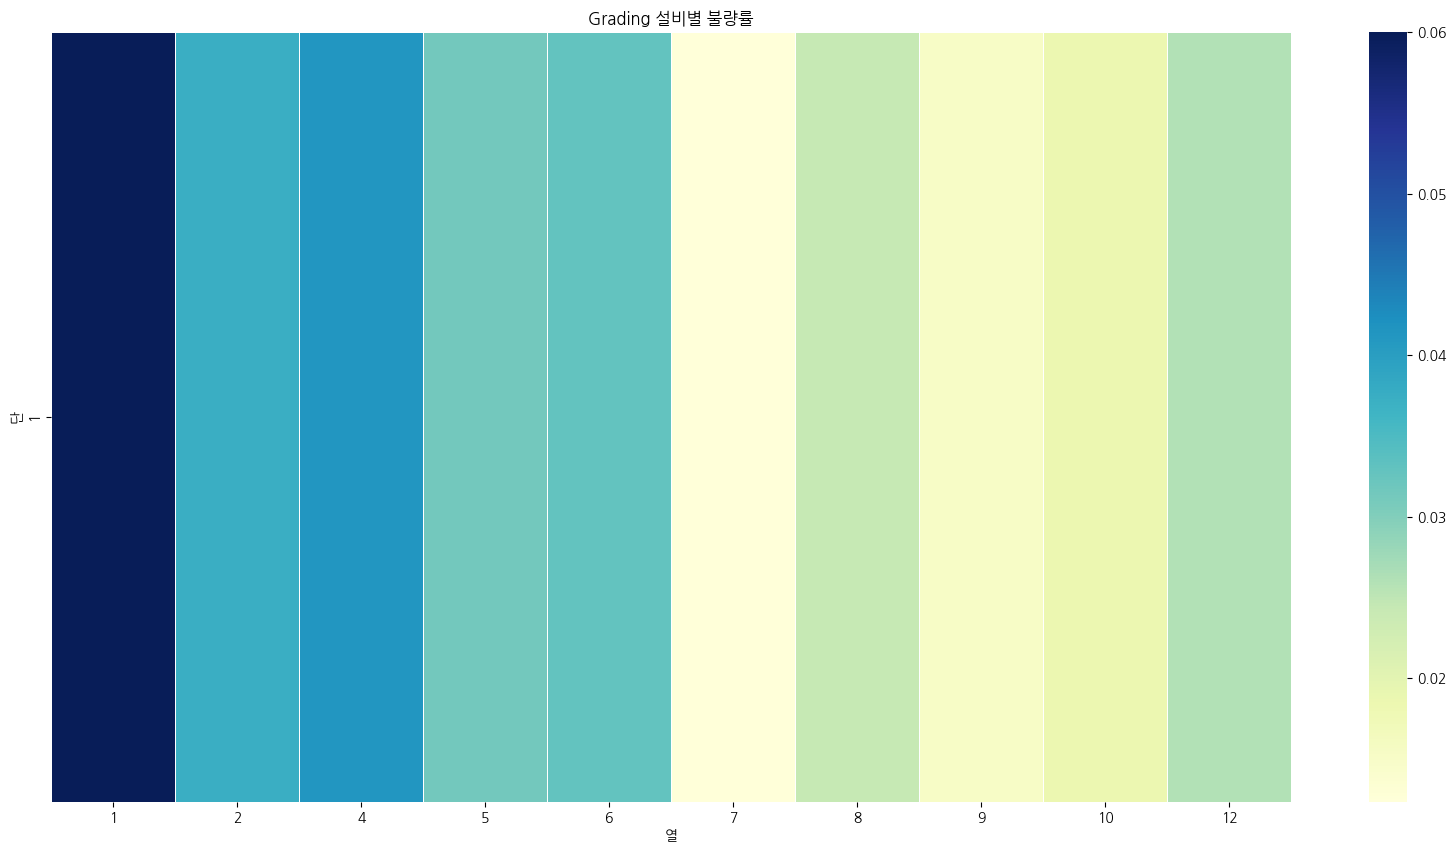

In [148]:
# 열과 단을 선택
column = 'pg1_box_col'
dan = 'pg1_box_dan'

# 열과 단에 대한 불량 비율 계산
group_counts = df_clear3.groupby([column, dan, 'judge_code']).size().unstack().fillna(0)
ratios = group_counts[1] / (group_counts[0] + group_counts[1])

# pivot_table 생성
pivot_table = ratios.unstack().fillna(0)
pivot_table = pivot_table.T
pivot_table = pivot_table.iloc[::-1]

# 히트맵 그리기
plt.figure(figsize=(20, 10))
sns.heatmap(data=pivot_table, annot=False, fmt=".2%", cmap="YlGnBu", linewidths=.5)
plt.title(f"Grading 설비별 불량률")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

### 출하 Aging 불량률 (= sa1, sa2, sa3, sa4 공정설비 불량률)

#### sa1 공정설비 불량률

In [149]:
group_counts = df_clear3[['tray_id_x','judge_code','sa1_box_col','sa1_box_row','sa1_box_dan'
          ]].groupby(['tray_id_x', 'sa1_box_col','sa1_box_row','sa1_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                                     0.0  1.0       불량률
tray_id_x sa1_box_col sa1_box_row sa1_box_dan                    
TRAY-1002 16          9           4             25    0  0.000000
TRAY-1003 1           64          8             25    0  0.000000
TRAY-1004 10          17          2             25    0  0.000000
TRAY-1005 1           64          8             25    0  0.000000
TRAY-1006 8           28          2             25    0  0.000000
...                                            ...  ...       ...
TRAY-2787 5           43          9             20    4  0.166667
TRAY-2788 16          8           4             19    6  0.240000
TRAY-2789 15          39          13            22    2  0.083333
TRAY-2790 5           43          9             23    1  0.041667
TRAY-2791 11          54          8             20    5  0.200000

[1666 rows x 3 columns]

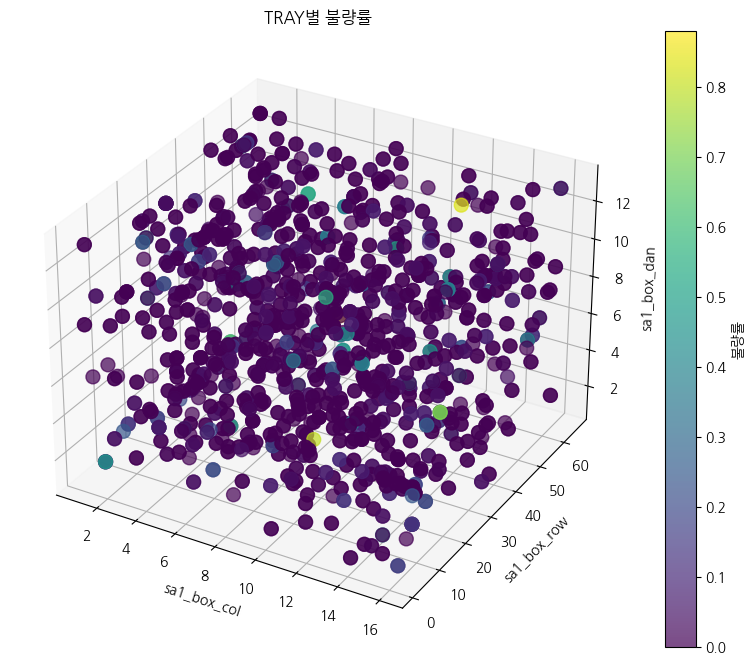

In [150]:
# 데이터 프레임에서 인덱스 레벨과 불량률 추출
x = group_counts.index.get_level_values('sa1_box_col')
y = group_counts.index.get_level_values('sa1_box_row')
z = group_counts.index.get_level_values('sa1_box_dan')
colors = group_counts['불량률']  # 불량률을 색상으로 사용

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 그리기
ax.scatter(x, y, z, c=colors, cmap='viridis', s=100, alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('sa1_box_col')
ax.set_ylabel('sa1_box_row')
ax.set_zlabel('sa1_box_dan')
ax.set_title('TRAY별 불량률')

# 컬러바 추가
cbar = plt.colorbar(ax.collections[0], label='불량률')

plt.show()

#### sa2 공정설비 불량률

In [151]:
group_counts = df_clear3[['tray_id_x','judge_code','sa2_box_col','sa2_box_row','sa2_box_dan'
          ]].groupby(['tray_id_x', 'sa2_box_col','sa2_box_row','sa2_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                                     0.0  1.0       불량률
tray_id_x sa2_box_col sa2_box_row sa2_box_dan                    
TRAY-1002 11          31          4             25    0  0.000000
TRAY-1003 6           59          8             25    0  0.000000
TRAY-1004 10          63          6             25    0  0.000000
TRAY-1005 6           59          8             25    0  0.000000
TRAY-1006 16          5           9             25    0  0.000000
...                                            ...  ...       ...
TRAY-2787 7           4           5             20    4  0.166667
TRAY-2788 16          55          11            19    6  0.240000
TRAY-2789 10          23          9             22    2  0.083333
TRAY-2790 7           4           5             23    1  0.041667
TRAY-2791 14          5           8             20    5  0.200000

[1666 rows x 3 columns]

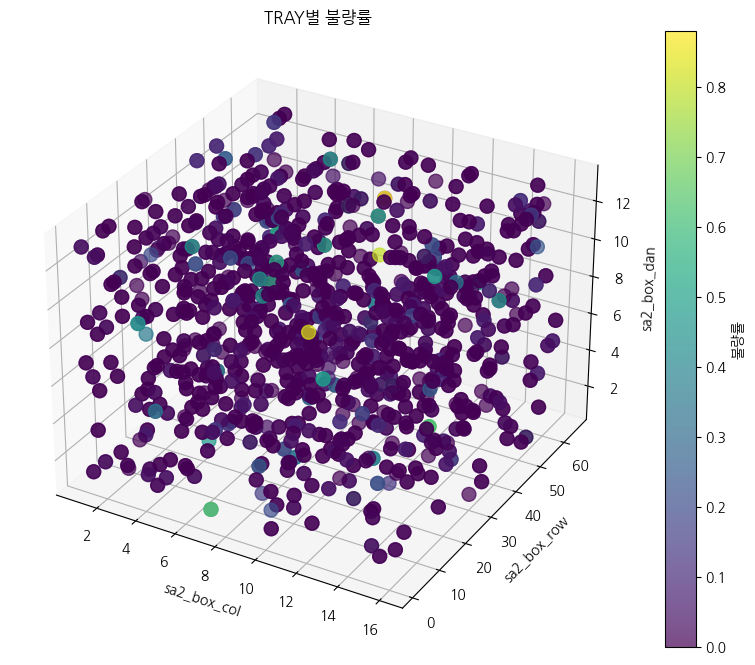

In [152]:
# 데이터 프레임에서 인덱스 레벨과 불량률 추출
x = group_counts.index.get_level_values('sa2_box_col')
y = group_counts.index.get_level_values('sa2_box_row')
z = group_counts.index.get_level_values('sa2_box_dan')
colors = group_counts['불량률']  # 불량률을 색상으로 사용

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 그리기
ax.scatter(x, y, z, c=colors, cmap='viridis', s=100, alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('sa2_box_col')
ax.set_ylabel('sa2_box_row')
ax.set_zlabel('sa2_box_dan')
ax.set_title('TRAY별 불량률')

# 컬러바 추가
cbar = plt.colorbar(ax.collections[0], label='불량률')

plt.show()

#### sa3 공정설비 불량률

In [153]:
group_counts = df_clear3[['tray_id_x','judge_code','sa3_box_col','sa3_box_row','sa3_box_dan'
          ]].groupby(['tray_id_x', 'sa3_box_col','sa3_box_row','sa3_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                                     0.0  1.0       불량률
tray_id_x sa3_box_col sa3_box_row sa3_box_dan                    
TRAY-1002 16          54          10            25    0  0.000000
TRAY-1003 9           50          8             25    0  0.000000
TRAY-1004 6           59          8             25    0  0.000000
TRAY-1005 9           50          8             25    0  0.000000
TRAY-1006 4           8           1             25    0  0.000000
...                                            ...  ...       ...
TRAY-2787 4           55          13            20    4  0.166667
TRAY-2788 13          29          3             19    6  0.240000
TRAY-2789 1           60          6             22    2  0.083333
TRAY-2790 4           55          13            23    1  0.041667
TRAY-2791 11          16          13            20    5  0.200000

[1666 rows x 3 columns]

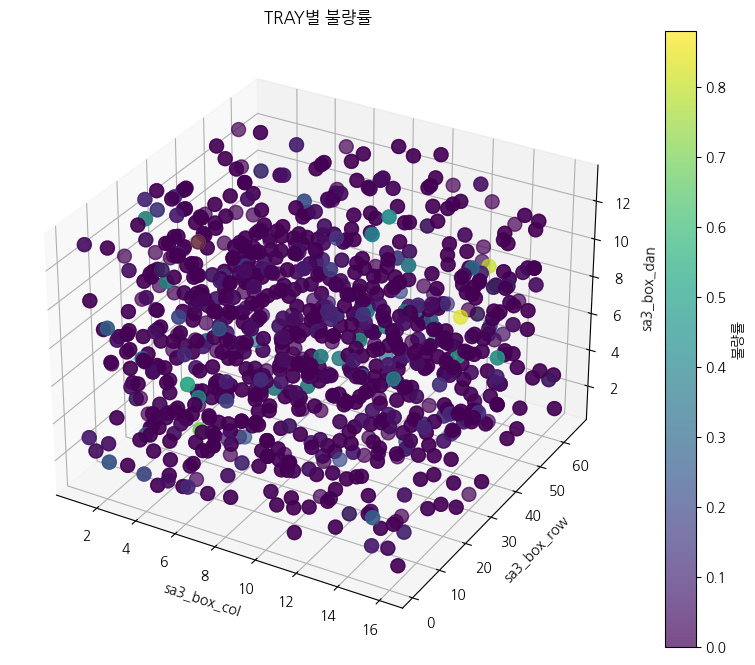

In [154]:
# 데이터 프레임에서 인덱스 레벨과 불량률 추출
x = group_counts.index.get_level_values('sa3_box_col')
y = group_counts.index.get_level_values('sa3_box_row')
z = group_counts.index.get_level_values('sa3_box_dan')
colors = group_counts['불량률']  # 불량률을 색상으로 사용

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 그리기
ax.scatter(x, y, z, c=colors, cmap='viridis', s=100, alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('sa3_box_col')
ax.set_ylabel('sa3_box_row')
ax.set_zlabel('sa3_box_dan')
ax.set_title('TRAY별 불량률')

# 컬러바 추가
cbar = plt.colorbar(ax.collections[0], label='불량률')

plt.show()

#### sa4 공정설비 불량률

In [155]:
group_counts = df_clear3[['tray_id_x','judge_code','sa4_box_col','sa4_box_row','sa4_box_dan'
          ]].groupby(['tray_id_x', 'sa4_box_col','sa4_box_row','sa4_box_dan'
                     ]).value_counts().unstack(fill_value=0)
group_counts['불량률'] = group_counts[1] / (group_counts[0] + group_counts[1])
group_counts

judge_code                                     0.0  1.0       불량률
tray_id_x sa4_box_col sa4_box_row sa4_box_dan                    
TRAY-1002 10          3           7             25    0  0.000000
TRAY-1003 62          1           9             25    0  0.000000
TRAY-1004 3           1           6             25    0  0.000000
TRAY-1005 62          1           9             25    0  0.000000
TRAY-1006 54          5           7             25    0  0.000000
...                                            ...  ...       ...
TRAY-2787 22          8           2             20    4  0.166667
TRAY-2788 41          9           5             19    6  0.240000
TRAY-2789 38          3           7             22    2  0.083333
TRAY-2790 22          8           2             23    1  0.041667
TRAY-2791 17          2           12            20    5  0.200000

[1666 rows x 3 columns]

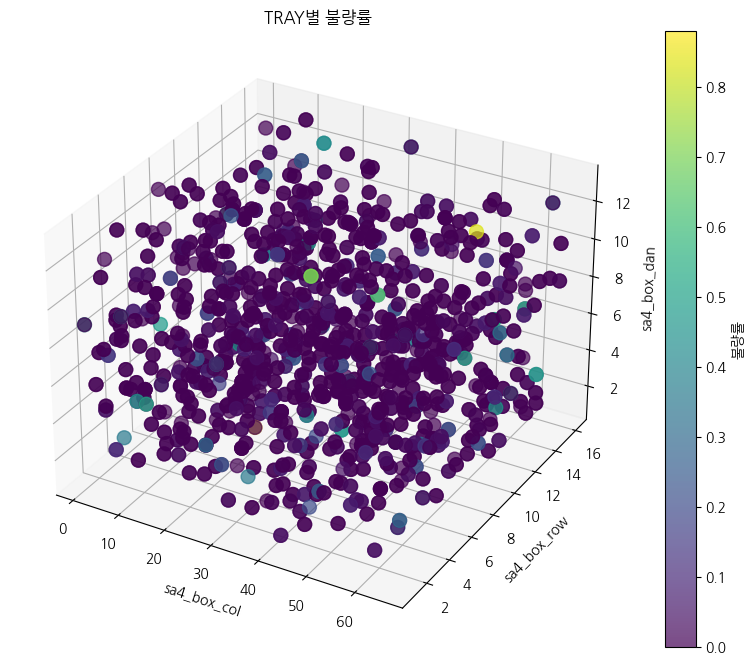

In [156]:
# 데이터 프레임에서 인덱스 레벨과 불량률 추출
x = group_counts.index.get_level_values('sa4_box_col')
y = group_counts.index.get_level_values('sa4_box_row')
z = group_counts.index.get_level_values('sa4_box_dan')
colors = group_counts['불량률']  # 불량률을 색상으로 사용

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 그리기
ax.scatter(x, y, z, c=colors, cmap='viridis', s=100, alpha=0.7)

# 축 레이블 설정
ax.set_xlabel('sa4_box_col')
ax.set_ylabel('sa4_box_row')
ax.set_zlabel('sa4_box_dan')
ax.set_title('TRAY별 불량률')

# 컬러바 추가
cbar = plt.colorbar(ax.collections[0], label='불량률')

plt.show()

### 공정 과정별 설비에 따른 불량률 결과

Aging 과정에서 설비에 따른 불량률이 확연히 드러나지 않음  
Fomation 과정에서 20, 21, 22 열, 1, 2, 3 단의 불량률이 다른 열, 단보다 불량률이 확연히 높은 것을 확인  
Grading 과정에서 1열, 1 단의 불량률이 비교적 높은 것을 확인  
출하 Aging 과정에서 설비에 따른 불량률이 확연히 드러나지 않음  
  
- **Formation과 Grading 설비의 공정 조건에 따른 불량률의 개선 필요성을 확인**

## 불량률 향상을 위한 공정 조건 최적화

### Formation 상단 공정 조건

In [157]:
df_clear3_bad1 = df_clear3.loc[(df_clear3['c2_box_col'] == 20) & (df_clear3['c2_box_dan'] == 1)]
df_clear3_bad2 = df_clear3.loc[(df_clear3['c2_box_col'] == 20) & (df_clear3['c2_box_dan'] == 2)]
df_clear3_bad3 = df_clear3.loc[(df_clear3['c2_box_col'] == 20) & (df_clear3['c2_box_dan'] == 3)]

df_clear3_bad4 = df_clear3.loc[(df_clear3['c2_box_col'] == 21) & (df_clear3['c2_box_dan'] == 1)]
df_clear3_bad5 = df_clear3.loc[(df_clear3['c2_box_col'] == 21) & (df_clear3['c2_box_dan'] == 2)]
df_clear3_bad6 = df_clear3.loc[(df_clear3['c2_box_col'] == 21) & (df_clear3['c2_box_dan'] == 3)]

df_clear3_bad7 = df_clear3.loc[(df_clear3['c2_box_col'] == 22) & (df_clear3['c2_box_dan'] == 1)]
df_clear3_bad8 = df_clear3.loc[(df_clear3['c2_box_col'] == 22) & (df_clear3['c2_box_dan'] == 2)]
df_clear3_bad9 = df_clear3.loc[(df_clear3['c2_box_col'] == 22) & (df_clear3['c2_box_dan'] == 3)]

df_clear3_bad = pd.concat([df_clear3_bad1, df_clear3_bad2, df_clear3_bad3, df_clear3_bad4, df_clear3_bad5, df_clear3_bad6, df_clear3_bad7, df_clear3_bad8, df_clear3_bad9], axis=0)
df_clear3_bad

lot_id_x  tray_id_x          dt_start_x     cell_id  rta1_cell_no  \
2861   LOT-102  TRAY-1110  02SEP2022:05:23:40  CELL-12791            14   
2862   LOT-102  TRAY-1110  02SEP2022:05:23:40  CELL-12792            23   
2863   LOT-102  TRAY-1110  02SEP2022:05:23:40  CELL-12793            15   
2864   LOT-102  TRAY-1110  02SEP2022:05:23:40  CELL-12794             4   
2865   LOT-102  TRAY-1110  02SEP2022:05:23:40  CELL-12795            20   
...        ...        ...                 ...         ...           ...   
40382  LOT-144  TRAY-2741  17SEP2022:07:26:05  CELL-53874            22   
40383  LOT-144  TRAY-2741  17SEP2022:07:26:05  CELL-53875            17   
40384  LOT-144  TRAY-2741  17SEP2022:07:26:05  CELL-53876            13   
40385  LOT-144  TRAY-2741  17SEP2022:07:26:05  CELL-53877            23   
40386  LOT-144  TRAY-2741  17SEP2022:07:26:05  CELL-53878             5   

       rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
2861              7             5             9             3            17   
2862              7             5             9             3            17   
2863              7             5             9             3            17   
2864              7             5             9             3            17   
2865              7             5             9             3            17   
...             ...           ...           ...           ...           ...   
40382             5            59             2             3            31   
40383             5            59             2             3            31   
40384             5            59             2             3            31   
40385             5            59             2             3            31   
40386             5            59             2             3            31   

       ...  pg1_tat  pc1_tat  sa1_tat  socv1_tat   sa2_tat  socv2_tat  \
2861   ...      291      291    42929          5  342486.0        5.0   
2862   ...      291      291    42929          5  342486.0        5.0   
2863   ...      291      291    42929          5  342486.0        5.0   
2864   ...      291      291    42929          5  342486.0        5.0   
2865   ...      291      291    42929          5  342486.0        5.0   
...    ...      ...      ...      ...        ...       ...        ...   
40382  ...      289      291    42914          5  345150.0        5.0   
40383  ...      289      291    42914          5  345150.0        5.0   
40384  ...      289      291    42914          5  345150.0        5.0   
40385  ...      289      291    42914          5  345150.0        5.0   
40386  ...      289      291    42914          5  345150.0        5.0   

        sa3_tat  socv3_tat   sa4_tat  judge_code  
2861   209568.0        9.0  197181.0         0.0  
2862   209568.0        9.0  197181.0         0.0  
2863   209568.0        9.0  197181.0         0.0  
2864   209568.0        9.0  197181.0         0.0  
2865   209568.0        9.0  197181.0         0.0  
...         ...        ...       ...         ...  
40382  219499.0        6.0  158009.0         0.0  
40383  219499.0        6.0  158009.0         0.0  
40384  219499.0        6.0  158009.0         0.0  
40385  219499.0        6.0  158009.0         0.0  
40386  219499.0        6.0  158009.0         0.0  

[1930 rows x 137 columns]

In [158]:
df_clear3_good1 = df_clear3.loc[(df_clear3['c2_box_col'] == 10) & (df_clear3['c2_box_dan'] == 4)]
df_clear3_good2 = df_clear3.loc[(df_clear3['c2_box_col'] == 10) & (df_clear3['c2_box_dan'] == 5)]
df_clear3_good3 = df_clear3.loc[(df_clear3['c2_box_col'] == 10) & (df_clear3['c2_box_dan'] == 6)]

df_clear3_good4 = df_clear3.loc[(df_clear3['c2_box_col'] == 11) & (df_clear3['c2_box_dan'] == 4)]
df_clear3_good5 = df_clear3.loc[(df_clear3['c2_box_col'] == 11) & (df_clear3['c2_box_dan'] == 5)]
df_clear3_good6 = df_clear3.loc[(df_clear3['c2_box_col'] == 11) & (df_clear3['c2_box_dan'] == 6)]

df_clear3_good7 = df_clear3.loc[(df_clear3['c2_box_col'] == 12) & (df_clear3['c2_box_dan'] == 4)]
df_clear3_good8 = df_clear3.loc[(df_clear3['c2_box_col'] == 12) & (df_clear3['c2_box_dan'] == 5)]
df_clear3_good9 = df_clear3.loc[(df_clear3['c2_box_col'] == 12) & (df_clear3['c2_box_dan'] == 6)]

df_clear3_good = pd.concat([df_clear3_good1, df_clear3_good2, df_clear3_good3, df_clear3_good4, df_clear3_good5, df_clear3_good6, df_clear3_good7, df_clear3_good8, df_clear3_good9], axis=0)
df_clear3_good

lot_id_x  tray_id_x          dt_start_x     cell_id  rta1_cell_no  \
5976   LOT-104  TRAY-1252  03SEP2022:13:26:15  CELL-14655            13   
5977   LOT-104  TRAY-1252  03SEP2022:13:26:15  CELL-14656             7   
5978   LOT-104  TRAY-1252  03SEP2022:13:26:15  CELL-14657            24   
5979   LOT-104  TRAY-1252  03SEP2022:13:26:15  CELL-14658            10   
5980   LOT-104  TRAY-1252  03SEP2022:13:26:15  CELL-14659             4   
...        ...        ...                 ...         ...           ...   
36628  LOT-141  TRAY-2584  15SEP2022:20:10:45  CELL-50650            15   
36629  LOT-141  TRAY-2584  15SEP2022:20:10:45  CELL-50651            12   
36630  LOT-141  TRAY-2584  15SEP2022:20:10:45  CELL-50652            23   
36631  LOT-141  TRAY-2584  15SEP2022:20:10:45  CELL-50653             4   
36632  LOT-141  TRAY-2584  15SEP2022:20:10:45  CELL-50654             5   

       rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
5976              8             2             2             2            38   
5977              8             2             2             2            38   
5978              8             2             2             2            38   
5979              8             2             2             2            38   
5980              8             2             2             2            38   
...             ...           ...           ...           ...           ...   
36628             5            45             4             1             8   
36629             5            45             4             1             8   
36630             5            45             4             1             8   
36631             5            45             4             1             8   
36632             5            45             4             1             8   

       ...  pg1_tat  pc1_tat  sa1_tat  socv1_tat   sa2_tat  socv2_tat  \
5976   ...      280      280    42836          5  344949.0        5.0   
5977   ...      280      280    42836          5  344949.0        5.0   
5978   ...      280      280    42836          5  344949.0        5.0   
5979   ...      280      280    42836          5  344949.0        5.0   
5980   ...      280      280    42836          5  344949.0        5.0   
...    ...      ...      ...      ...        ...       ...        ...   
36628  ...      290      291    43718          5  345489.0        5.0   
36629  ...      290      291    43718          5  345489.0        5.0   
36630  ...      291      291    43718          5  345489.0        5.0   
36631  ...      290      291    43718          5  345489.0        5.0   
36632  ...      290      291    43718          5  345489.0        5.0   

        sa3_tat  socv3_tat   sa4_tat  judge_code  
5976   209938.0        6.0  203156.0         0.0  
5977   209938.0        6.0  203156.0         0.0  
5978   209938.0        6.0  203156.0         0.0  
5979   209938.0        6.0  203156.0         0.0  
5980   209938.0        6.0  203156.0         0.0  
...         ...        ...       ...         ...  
36628  221308.0        5.0  155383.0         0.0  
36629  221308.0        5.0  155383.0         0.0  
36630  221308.0        5.0  155383.0         0.0  
36631  221308.0        6.0  155383.0         0.0  
36632  221308.0        6.0  155383.0         0.0  

[1686 rows x 137 columns]

In [159]:
print(df_clear3_good.shape)
print(df_clear3_bad.shape)

(1686, 137)
(1930, 137)


#### 충전#2 종료전류

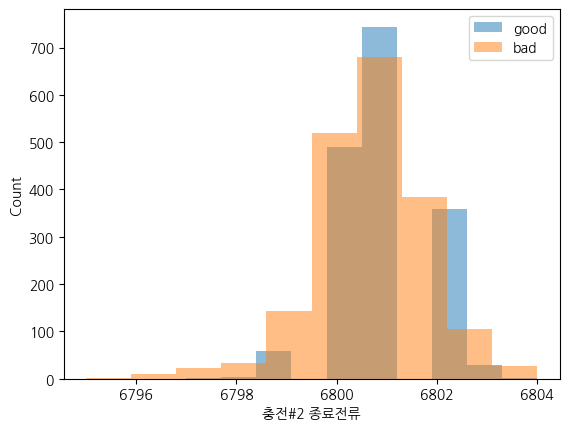

In [160]:
plt.hist(df_clear3_good['c2_curr_end'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['c2_curr_end'], alpha=0.5, label='bad')
plt.xlabel('충전#2 종료전류')
plt.ylabel('Count')
plt.legend()

#### 충전#4 평균온도

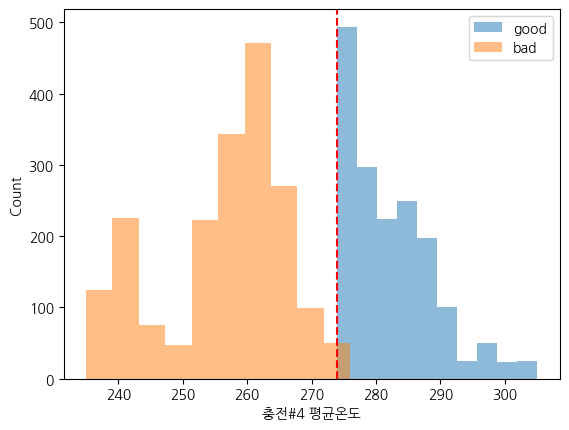

In [161]:
plt.hist(df_clear3_good['c4_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['c4_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#4 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=274, color='red', linestyle='--', label='x=274')
plt.show()

#### 충전#3 평균온도

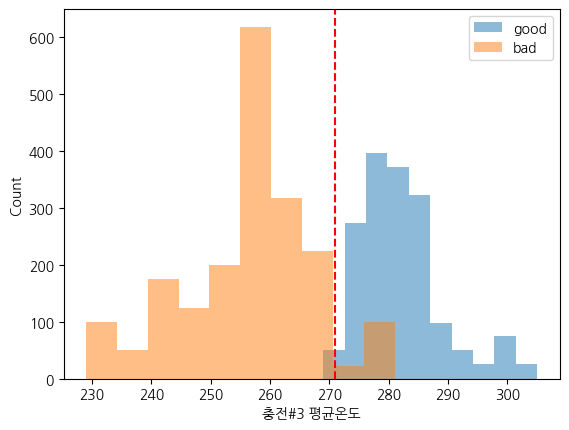

In [162]:
plt.hist(df_clear3_good['c3_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['c3_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#3 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=271, color='red', linestyle='--', label='x=270')
plt.show()

#### 충전#2 평균온도

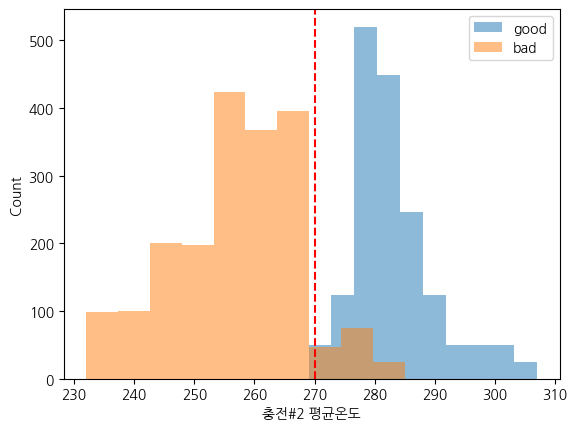

In [163]:
plt.hist(df_clear3_good['c2_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['c2_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#2 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=270, color='red', linestyle='--', label='x=270')
plt.show()

#### 충전#1 평균온도

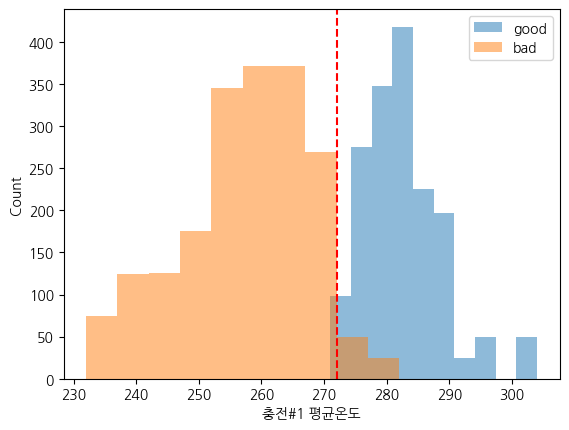

In [164]:
plt.hist(df_clear3_good['c1_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['c1_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#1 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=272, color='red', linestyle='--', label='x=272')
plt.show()

#### 방전#3 평균온도

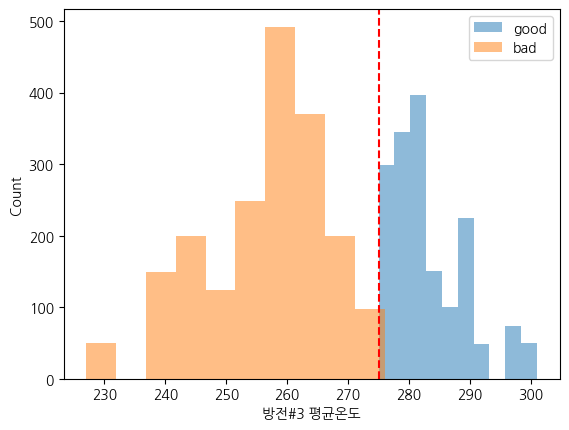

In [165]:
plt.hist(df_clear3_good['dc3_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['dc3_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('방전#3 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=275, color='red', linestyle='--', label='x=275')
plt.show()

#### 방전#2 평균온도

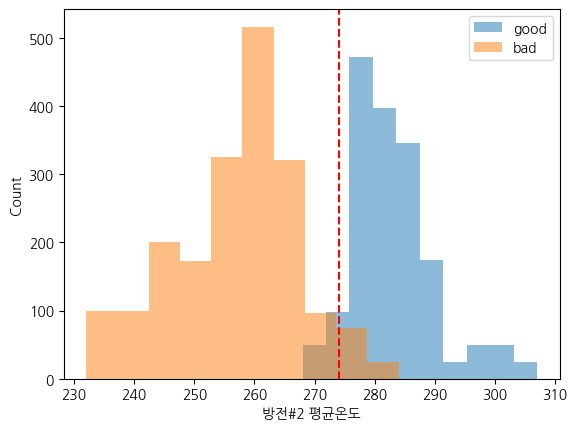

In [166]:
plt.hist(df_clear3_good['dc2_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['dc2_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('방전#2 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=274, color='red', linestyle='--', label='x=274')
plt.show()

#### 방전#1 평균온도

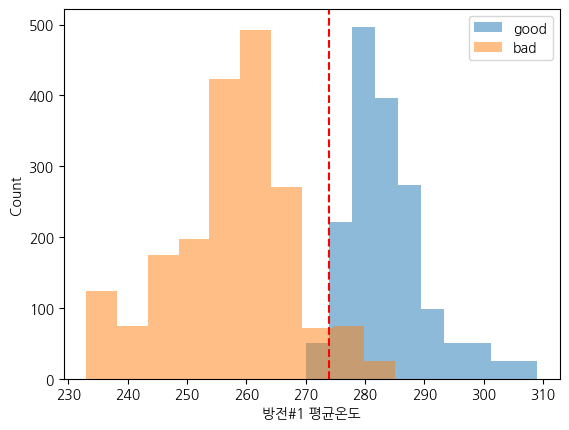

In [167]:
plt.hist(df_clear3_good['dc1_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['dc1_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('방전#1 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=274, color='red', linestyle='--', label='x=274')
plt.show()

#### 충전#3 공정시간

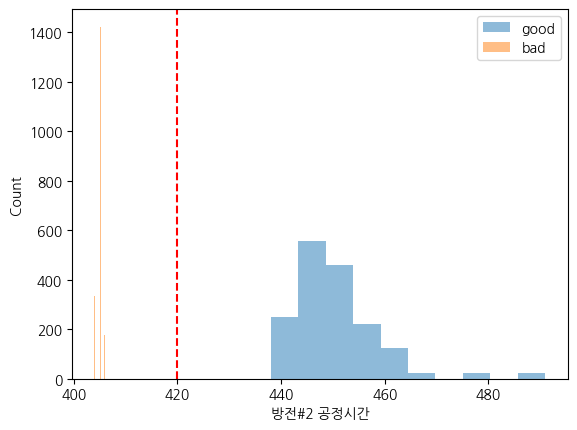

In [168]:
plt.hist(df_clear3_good['c2_tat'], alpha=0.5, label='good')
plt.hist(df_clear3_bad['dc2_tat'], alpha=0.5, label='bad')
plt.xlabel('방전#2 공정시간')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=420, color='red', linestyle='--', label='x=420')
plt.show()

### Formation 하단 공정 조건

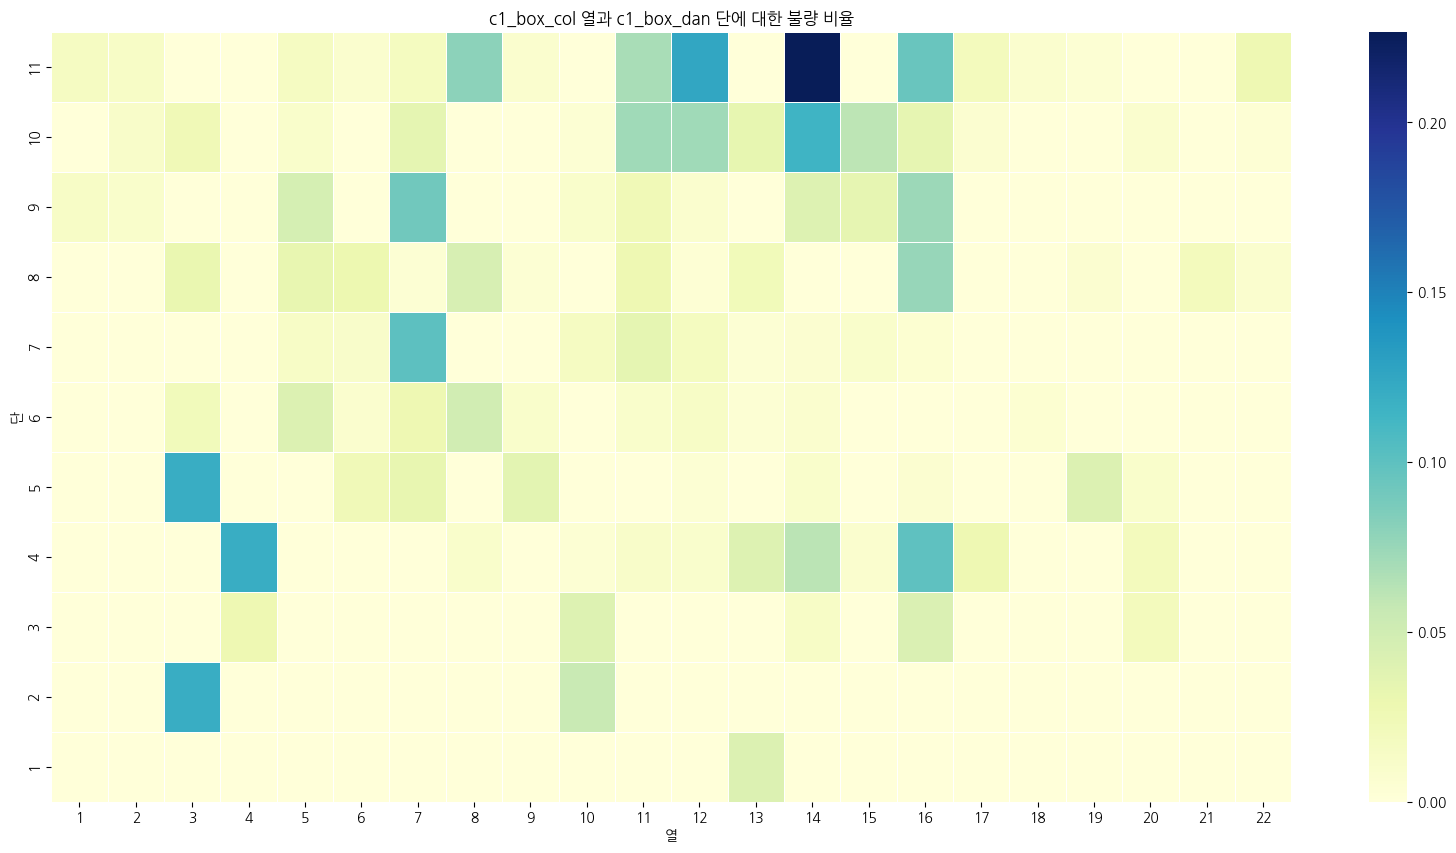

In [169]:
df_clear4 = df_clear3.loc[df_clear3['c4_temp_avg'] >= 274,:]

# 열과 단을 선택
column = 'c1_box_col'
dan = 'c1_box_dan'

# 열과 단에 대한 불량 비율 계산
group_counts = df_clear4.groupby([column, dan, 'judge_code']).size().unstack().fillna(0)
ratios = group_counts[1] / (group_counts[0] + group_counts[1])

# pivot_table 생성
pivot_table = ratios.unstack().fillna(0)
pivot_table = pivot_table.T
pivot_table = pivot_table.iloc[::-1]

# 히트맵 그리기
plt.figure(figsize=(20, 10))
sns.heatmap(data=pivot_table, annot=False, fmt=".2%", cmap="YlGnBu", linewidths=.5)
plt.title(f"{column} 열과 {dan} 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

In [170]:
df_clear4_bad1 = df_clear4.loc[(df_clear4['c2_box_col'] == 11) & (df_clear4['c2_box_dan'] == 10)]
df_clear4_bad2 = df_clear4.loc[(df_clear4['c2_box_col'] == 12) & (df_clear4['c2_box_dan'] == 10)]
df_clear4_bad3 = df_clear4.loc[(df_clear4['c2_box_col'] == 13) & (df_clear4['c2_box_dan'] == 10)]
df_clear4_bad4 = df_clear4.loc[(df_clear4['c2_box_col'] == 14) & (df_clear4['c2_box_dan'] == 10)]

df_clear4_bad5 = df_clear4.loc[(df_clear4['c2_box_col'] == 11) & (df_clear4['c2_box_dan'] == 11)]
df_clear4_bad6 = df_clear4.loc[(df_clear4['c2_box_col'] == 12) & (df_clear4['c2_box_dan'] == 11)]
df_clear4_bad7 = df_clear4.loc[(df_clear4['c2_box_col'] == 13) & (df_clear4['c2_box_dan'] == 11)]
df_clear4_bad8 = df_clear4.loc[(df_clear4['c2_box_col'] == 14) & (df_clear4['c2_box_dan'] == 11)]

df_clear4_bad = pd.concat([df_clear4_bad1, df_clear4_bad2, df_clear4_bad3, df_clear4_bad4, df_clear4_bad5, df_clear4_bad6, df_clear4_bad7, df_clear4_bad8], axis=0)
df_clear4_bad

lot_id_x  tray_id_x          dt_start_x     cell_id  rta1_cell_no  \
2711   LOT-102  TRAY-1104  02SEP2022:04:09:25  CELL-12019            12   
2712   LOT-102  TRAY-1104  02SEP2022:04:09:25  CELL-12020             1   
2713   LOT-102  TRAY-1104  02SEP2022:04:09:25  CELL-12021             6   
2714   LOT-102  TRAY-1104  02SEP2022:04:09:25  CELL-12022            19   
2715   LOT-102  TRAY-1104  02SEP2022:04:09:25  CELL-12023            21   
...        ...        ...                 ...         ...           ...   
35916  LOT-141  TRAY-2601  15SEP2022:23:57:55  CELL-51339             3   
35917  LOT-141  TRAY-2601  15SEP2022:23:57:55  CELL-51340             7   
35918  LOT-141  TRAY-2601  15SEP2022:23:57:55  CELL-51341             1   
35919  LOT-141  TRAY-2601  15SEP2022:23:57:55  CELL-51342            16   
35920  LOT-141  TRAY-2601  15SEP2022:23:57:55  CELL-51343             2   

       rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
2711              3            18             9             3             8   
2712              3            18             9             3             8   
2713              3            18             9             3             8   
2714              3            18             9             3             8   
2715              3            18             9             3             8   
...             ...           ...           ...           ...           ...   
35916             2            14             6             2             9   
35917             2            14             6             2             9   
35918             2            14             6             2             9   
35919             2            14             6             2             9   
35920             2            14             6             2             9   

       ...  pg1_tat  pc1_tat  sa1_tat  socv1_tat   sa2_tat  socv2_tat  \
2711   ...      290      291    43028          5  343285.0        5.0   
2712   ...      290      291    43028          5  343285.0        5.0   
2713   ...      290      291    43028          5  343285.0        5.0   
2714   ...      290      291    43028          5  343285.0        5.0   
2715   ...      290      291    43028          5  343285.0        5.0   
...    ...      ...      ...      ...        ...       ...        ...   
35916  ...      290      291    42729          5  345531.0        5.0   
35917  ...      290      291    42729          5  345531.0        5.0   
35918  ...      290      291    42729          5  345531.0        5.0   
35919  ...      290      291    42729          5  345531.0        5.0   
35920  ...      290      291    42729          5  345531.0        5.0   

        sa3_tat  socv3_tat   sa4_tat  judge_code  
2711   209419.0        6.0  197062.0         0.0  
2712   209419.0        6.0  197062.0         0.0  
2713   209419.0        6.0  197062.0         0.0  
2714   209419.0        6.0  197062.0         0.0  
2715   209419.0        6.0  197062.0         0.0  
...         ...        ...       ...         ...  
35916  222410.0        5.0  155123.0         0.0  
35917  222410.0        5.0  155123.0         0.0  
35918  222410.0        5.0  155123.0         0.0  
35919  222410.0        5.0  155123.0         0.0  
35920  222410.0        5.0  155123.0         0.0  

[1586 rows x 137 columns]

In [171]:
df_clear4_good1 = df_clear4.loc[(df_clear4['c2_box_col'] == 11) & (df_clear4['c2_box_dan'] == 5)]
df_clear4_good2 = df_clear4.loc[(df_clear4['c2_box_col'] == 12) & (df_clear4['c2_box_dan'] == 5)]
df_clear4_good3 = df_clear4.loc[(df_clear4['c2_box_col'] == 13) & (df_clear4['c2_box_dan'] == 5)]
df_clear4_good4 = df_clear4.loc[(df_clear4['c2_box_col'] == 14) & (df_clear4['c2_box_dan'] == 5)]

df_clear4_good5 = df_clear4.loc[(df_clear4['c2_box_col'] == 11) & (df_clear4['c2_box_dan'] == 6)]
df_clear4_good6 = df_clear4.loc[(df_clear4['c2_box_col'] == 12) & (df_clear4['c2_box_dan'] == 6)]
df_clear4_good7 = df_clear4.loc[(df_clear4['c2_box_col'] == 13) & (df_clear4['c2_box_dan'] == 6)]
df_clear4_good8 = df_clear4.loc[(df_clear4['c2_box_col'] == 14) & (df_clear4['c2_box_dan'] == 6)]

df_clear4_good = pd.concat([df_clear4_good1, df_clear4_good2, df_clear4_good3, df_clear4_good4, df_clear4_good5, df_clear4_good6, df_clear4_good7, df_clear4_good8], axis=0)
df_clear4_good

lot_id_x  tray_id_x          dt_start_x     cell_id  rta1_cell_no  \
2986   LOT-102  TRAY-1115  02SEP2022:06:30:20  CELL-12631             9   
2987   LOT-102  TRAY-1115  02SEP2022:06:30:20  CELL-12632            20   
2988   LOT-102  TRAY-1115  02SEP2022:06:30:20  CELL-12633            10   
2989   LOT-102  TRAY-1115  02SEP2022:06:30:20  CELL-12634             5   
2990   LOT-102  TRAY-1115  02SEP2022:06:30:20  CELL-12635             4   
...        ...        ...                 ...         ...           ...   
31524  LOT-134  TRAY-2366  13SEP2022:20:06:05  CELL-44024            16   
31525  LOT-134  TRAY-2366  13SEP2022:20:06:05  CELL-44025             1   
31526  LOT-134  TRAY-2366  13SEP2022:20:06:05  CELL-44026            11   
31527  LOT-134  TRAY-2366  13SEP2022:20:06:05  CELL-44027             6   
31528  LOT-134  TRAY-2366  13SEP2022:20:06:05  CELL-44128            25   

       rta1_box_col  rta1_box_row  rta1_box_dan  hta1_box_col  hta1_box_row  \
2986              2            28             9             2             1   
2987              2            28             9             2             1   
2988              2            28             9             2             1   
2989              2            28             9             2             1   
2990              2            28             9             2             1   
...             ...           ...           ...           ...           ...   
31524             3             9             8             2             5   
31525             3             9             8             2             5   
31526             3             9             8             2             5   
31527             3             9             8             2             5   
31528             3             9             8             2             5   

       ...  pg1_tat  pc1_tat  sa1_tat  socv1_tat   sa2_tat  socv2_tat  \
2986   ...      290      291    43077          8  342712.0        5.0   
2987   ...      290      291    43077          8  342712.0        5.0   
2988   ...      290      291    43077          8  342712.0        5.0   
2989   ...      290      291    43077          8  342712.0        5.0   
2990   ...      290      291    43077          8  342712.0        5.0   
...    ...      ...      ...      ...        ...       ...        ...   
31524  ...      270      271    46582          5  344012.0        6.0   
31525  ...      269      271    46582          5  344012.0        6.0   
31526  ...      270      271    46582          5  344012.0        6.0   
31527  ...      269      271    46582          5  344012.0        6.0   
31528  ...      270      270    46582          5  344012.0        6.0   

        sa3_tat  socv3_tat   sa4_tat  judge_code  
2986   209575.0        5.0  197559.0         0.0  
2987   209575.0        5.0  197559.0         0.0  
2988   209575.0        5.0  197559.0         0.0  
2989   209575.0        5.0  197559.0         0.0  
2990   209575.0        5.0  197559.0         0.0  
...         ...        ...       ...         ...  
31524  221704.0        5.0  150521.0         0.0  
31525  221704.0        5.0  150521.0         0.0  
31526  221704.0        5.0  150521.0         0.0  
31527  221704.0        5.0  150521.0         0.0  
31528  221704.0        5.0  150521.0         0.0  

[1313 rows x 137 columns]

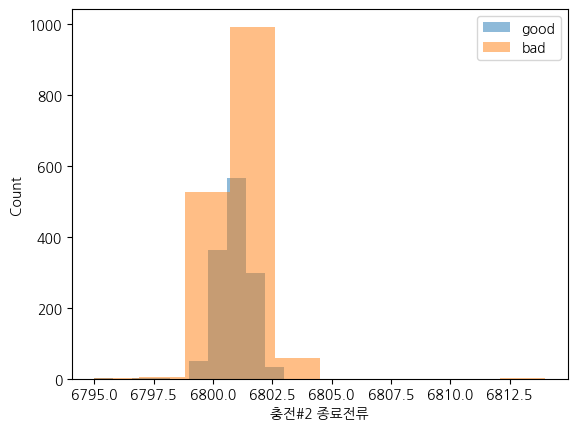

In [172]:
plt.hist(df_clear4_good['c2_curr_end'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['c2_curr_end'], alpha=0.5, label='bad')
plt.xlabel('충전#2 종료전류')
plt.ylabel('Count')
plt.legend()

#### 충전 1 ~ 4 단계

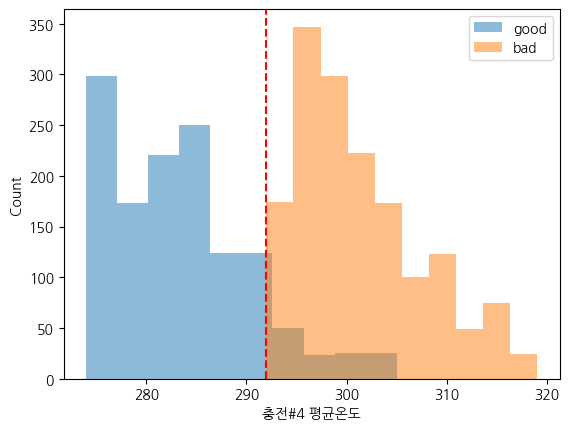

In [173]:
plt.hist(df_clear4_good['c4_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['c4_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#4 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=292, color='red', linestyle='--', label='x=292')
plt.show()

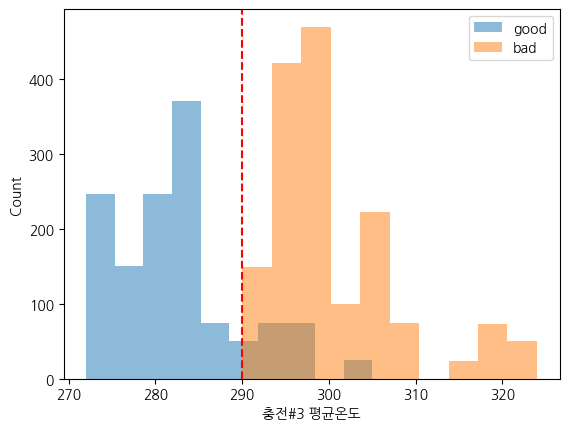

In [174]:
plt.hist(df_clear4_good['c3_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['c3_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#3 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=290, color='red', linestyle='--', label='x=290')
plt.show()

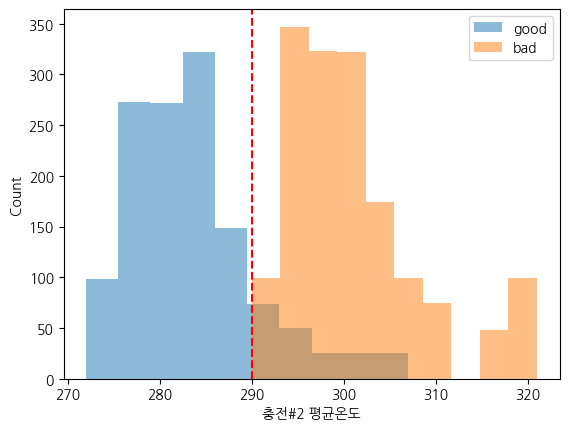

In [175]:
plt.hist(df_clear4_good['c2_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['c2_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#2 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=290, color='red', linestyle='--', label='x=290')
plt.show()

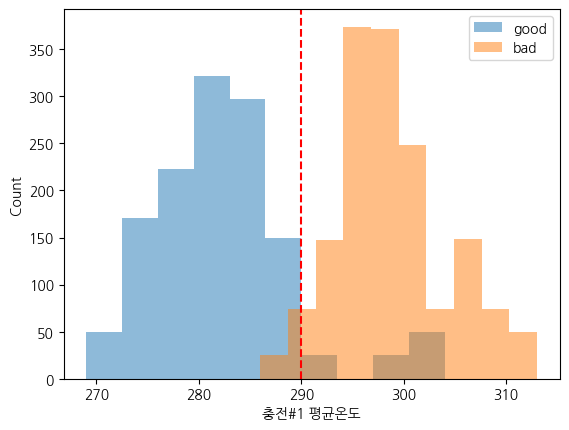

In [176]:
plt.hist(df_clear4_good['c1_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['c1_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('충전#1 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=290, color='red', linestyle='--', label='x=290')
plt.show()

#### 방전 1 ~ 3 단계

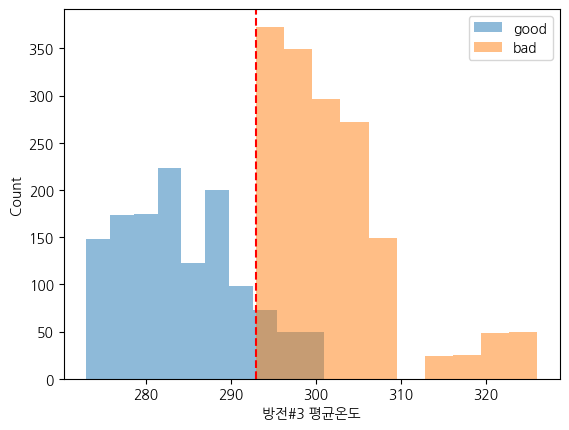

In [177]:
plt.hist(df_clear4_good['dc3_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['dc3_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('방전#3 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=293, color='red', linestyle='--', label='x=293')
plt.show()

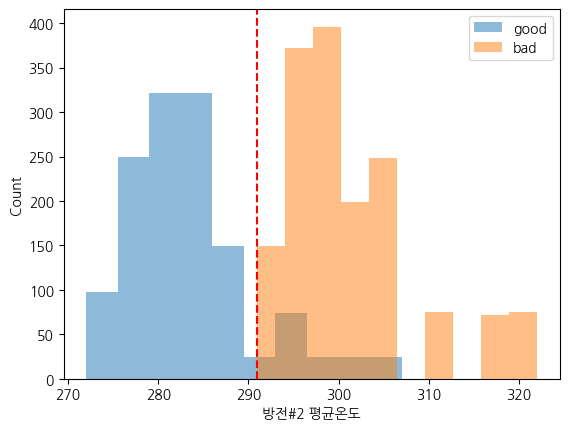

In [178]:
plt.hist(df_clear4_good['dc2_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['dc2_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('방전#2 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=291, color='red', linestyle='--', label='x=291')
plt.show()

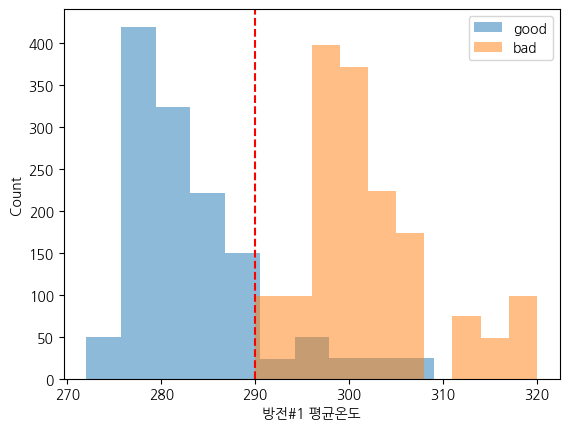

In [179]:
plt.hist(df_clear4_good['dc1_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['dc1_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('방전#1 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=290, color='red', linestyle='--', label='x=290')
plt.show()

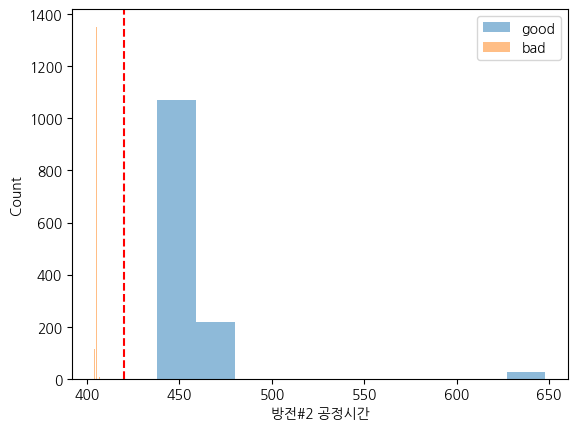

In [180]:
plt.hist(df_clear4_good['c2_tat'], alpha=0.5, label='good')
plt.hist(df_clear4_bad['dc2_tat'], alpha=0.5, label='bad')
plt.xlabel('방전#2 공정시간')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=420, color='red', linestyle='--', label='x=420')
plt.show()

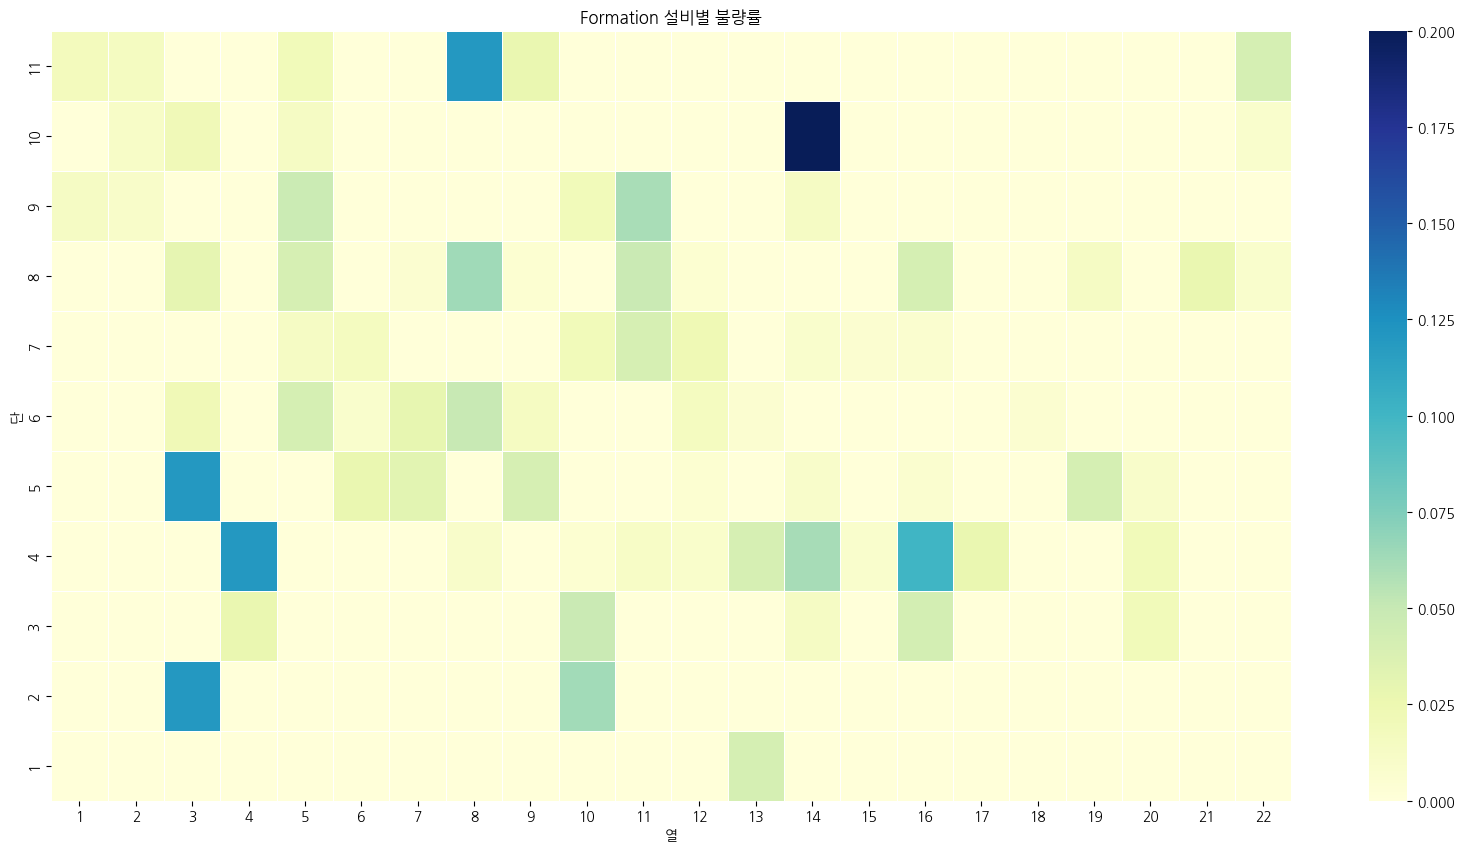

In [181]:
df_clear5 = df_clear4.loc[(df_clear4['c4_temp_avg'] >= 274) & (df_clear4['c4_temp_avg'] <= 292),:]

# 열과 단을 선택
column = 'c1_box_col'
dan = 'c1_box_dan'

# 열과 단에 대한 불량 비율 계산
group_counts = df_clear5.groupby([column, dan, 'judge_code']).size().unstack().fillna(0)
ratios = group_counts[1] / (group_counts[0] + group_counts[1])

# pivot_table 생성
pivot_table = ratios.unstack().fillna(0)
pivot_table = pivot_table.T
pivot_table = pivot_table.iloc[::-1]

# 히트맵 그리기
plt.figure(figsize=(20, 10))
sns.heatmap(data=pivot_table, annot=False, fmt=".2%", cmap="YlGnBu", linewidths=.5)
plt.title("Formation 설비별 불량률")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

### Grading 공정 조건

In [182]:
df_clear5_bad1 = df_clear5.loc[(df_clear5['pg1_box_col'] == 1) & (df_clear5['pg1_box_dan'] == 1)]
df_clear5_bad2 = df_clear5.loc[(df_clear5['pg1_box_col'] == 2) & (df_clear5['pg1_box_dan'] == 1)]
df_clear5_bad3 = df_clear5.loc[(df_clear5['pg1_box_col'] == 4) & (df_clear5['pg1_box_dan'] == 1)]

df_clear5_good1 = df_clear5.loc[(df_clear5['pg1_box_col'] == 9) & (df_clear5['pg1_box_dan'] == 1)]
df_clear5_good2 = df_clear5.loc[(df_clear5['pg1_box_col'] == 10) & (df_clear5['pg1_box_dan'] == 1)]
df_clear5_good3 = df_clear5.loc[(df_clear5['pg1_box_col'] == 12) & (df_clear5['pg1_box_dan'] == 1)]

df_clear5_bad = pd.concat([df_clear5_bad1, df_clear5_bad2, df_clear5_bad3], axis=0)
df_clear5_good = pd.concat([df_clear5_good1, df_clear5_good2, df_clear5_good3], axis=0)

#### PowerGrading#1 fitted imp

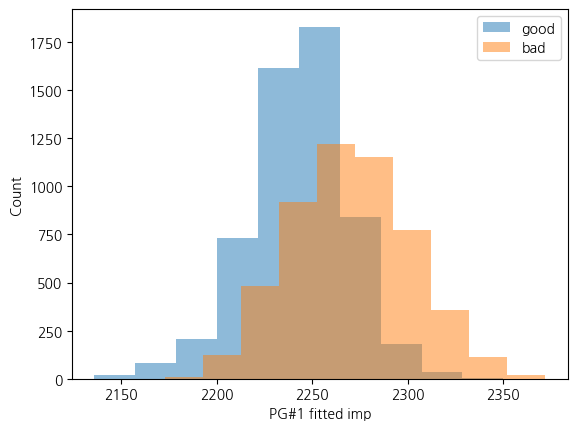

In [183]:
plt.hist(df_clear5_good['pg1_impfit'], alpha=0.5, label='good')
plt.hist(df_clear5_bad['pg1_impfit'], alpha=0.5, label='bad')
plt.xlabel('PG#1 fitted imp')
plt.ylabel('Count')
plt.legend()

#### PowerGrading#1 imp

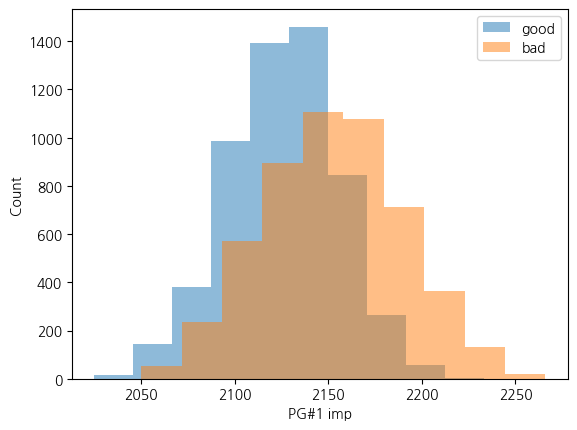

In [184]:
plt.hist(df_clear5_good['pg1_imp'], alpha=0.5, label='good')
plt.hist(df_clear5_bad['pg1_imp'], alpha=0.5, label='bad')
plt.xlabel('PG#1 imp')
plt.ylabel('Count')
plt.legend()

#### PowerCharging#1 imp

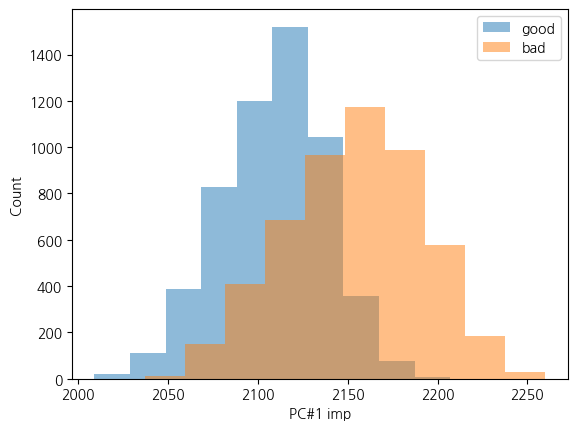

In [185]:
plt.hist(df_clear5_good['pc1_imp'], alpha=0.5, label='good')
plt.hist(df_clear5_bad['pc1_imp'], alpha=0.5, label='bad')
plt.xlabel('PC#1 imp')
plt.ylabel('Count')
plt.legend()

#### PowerGrading#1 평균온도

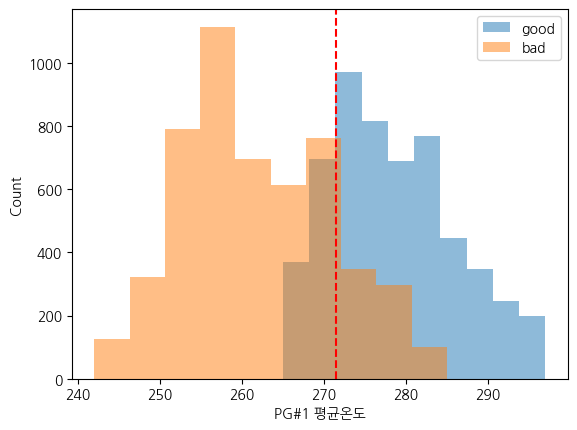

In [186]:
plt.hist(df_clear5_good['pg1_temp_avg'], alpha=0.5, label='good')
plt.hist(df_clear5_bad['pg1_temp_avg'], alpha=0.5, label='bad')
plt.xlabel('PG#1 평균온도')
plt.ylabel('Count')
plt.legend()

formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.axvline(x=271.5, color='red', linestyle='--', label='x=271.5')
plt.show()

#### PowerGrading#1 시작전압

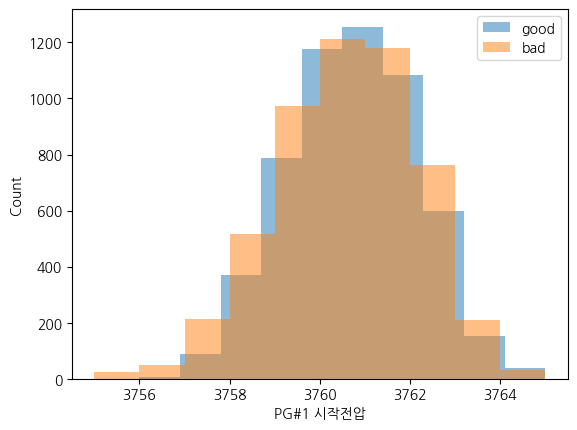

In [187]:
plt.hist(df_clear5_good['pg1_voltage_start'], alpha=0.5, label='good')
plt.hist(df_clear5_bad['pg1_voltage_start'], alpha=0.5, label='bad')
plt.xlabel('PG#1 시작전압')
plt.ylabel('Count')
plt.legend()

#### PowerGrading#1 종료전류

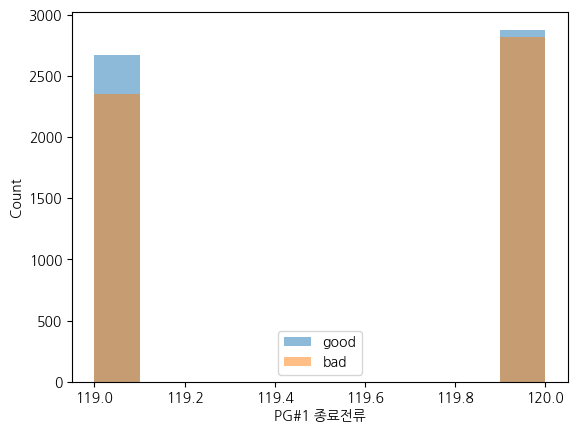

In [188]:
plt.hist(df_clear5_good['pg1_curr_end'], alpha=0.5, label='good')
plt.hist(df_clear5_bad['pg1_curr_end'], alpha=0.5, label='bad')
plt.xlabel('PG#1 종료전류')
plt.ylabel('Count')
plt.legend()

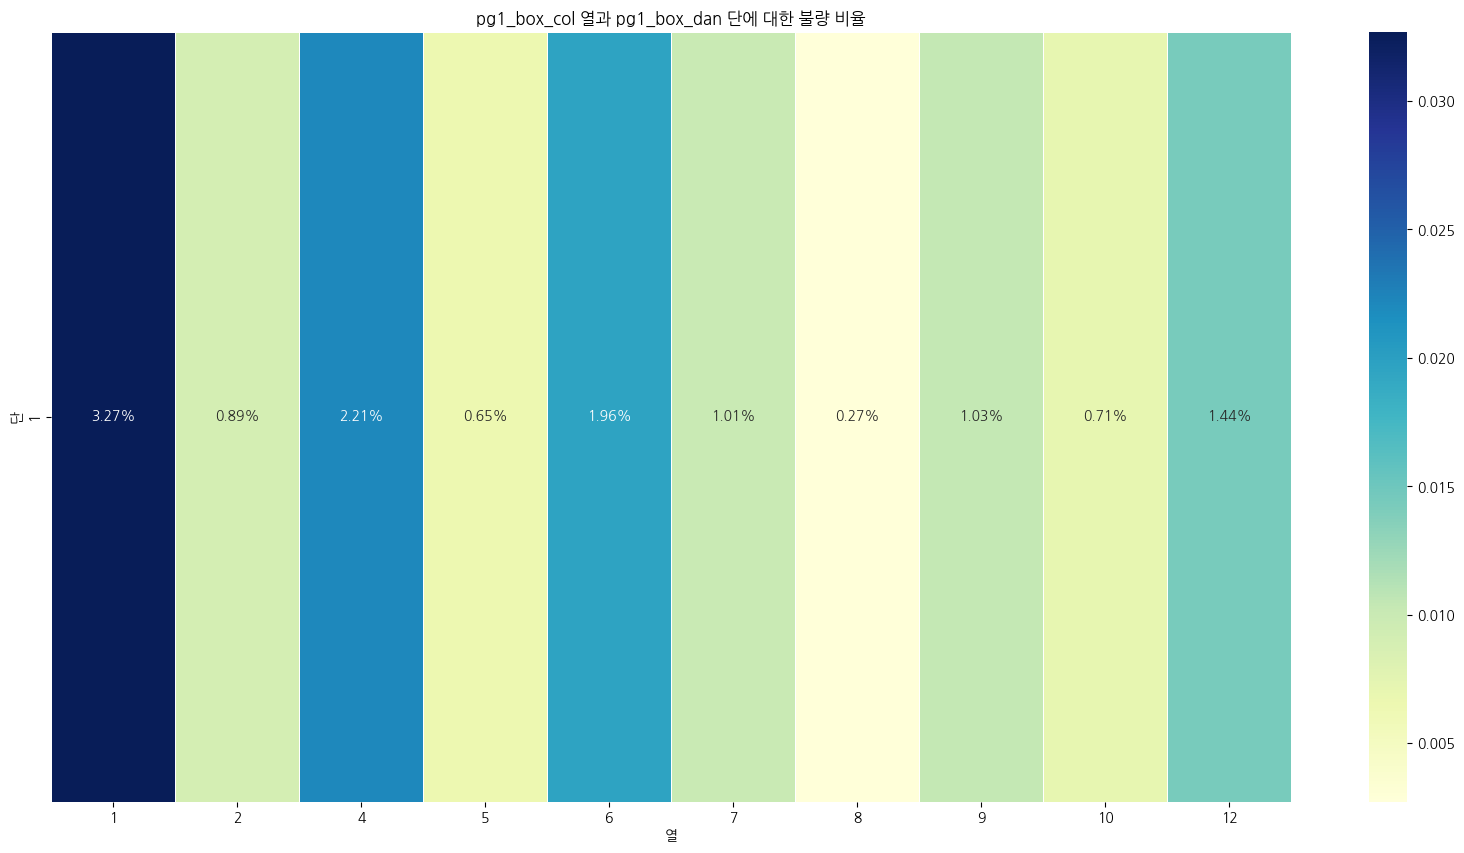

In [189]:
df_clear6 = df_clear5.loc[(df_clear5['pg1_temp_avg'] >= 267),:]

# 열과 단을 선택
column = 'pg1_box_col'
dan = 'pg1_box_dan'

# 열과 단에 대한 불량 비율 계산
group_counts = df_clear6.groupby([column, dan, 'judge_code']).size().unstack().fillna(0)
ratios = group_counts[1] / (group_counts[0] + group_counts[1])

# pivot_table 생성
pivot_table = ratios.unstack().fillna(0)
pivot_table = pivot_table.T
pivot_table = pivot_table.iloc[::-1]

# 히트맵 그리기
plt.figure(figsize=(20, 10))
sns.heatmap(data=pivot_table, annot=True, fmt=".2%", cmap="YlGnBu", linewidths=.5)
plt.title(f"{column} 열과 {dan} 단에 대한 불량 비율")
plt.xlabel("열")
plt.ylabel("단")
plt.show()

---

### 최적 공정 온도 도출

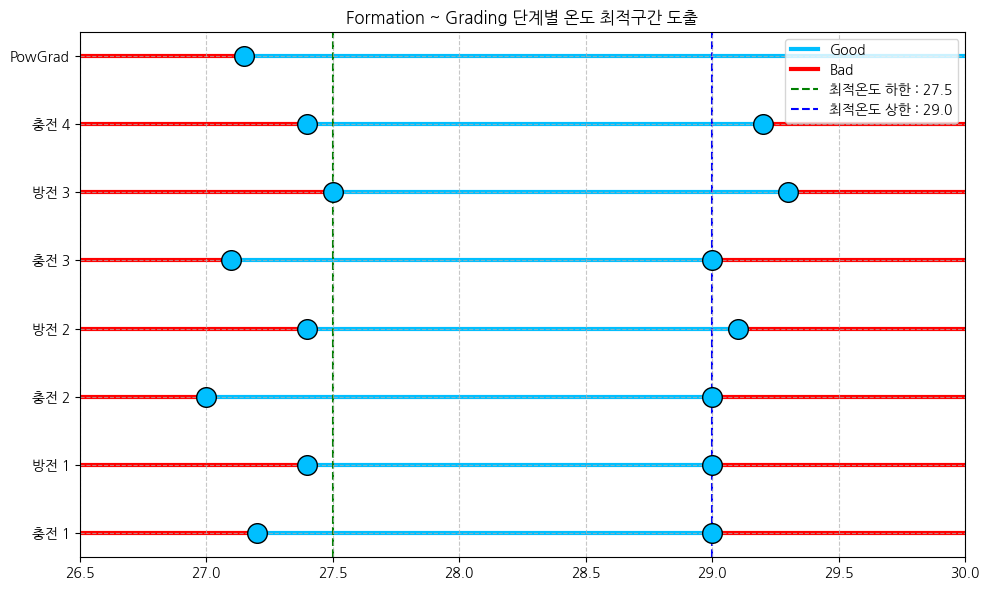

In [190]:
data = {
    'Category': ['충전 1', '방전 1', '충전 2', '방전 2', '충전 3', '방전 3', '충전 4', 'PowGrad'],
    'Value': [27.2, 27.4, 27.0, 27.4, 27.1, 27.5, 27.4, 27.15]
}

df_temp = pd.DataFrame(data)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 점 플롯 그리기
plt.scatter(df_temp['Value'], df_temp['Category'], color='deepskyblue', s=200, edgecolor='black', zorder=2)


# 직선으로 표시, 끝 점 추가
start_value = 27.15
end_value = 30.0
plt.plot([start_value, end_value], ['PowGrad', 'PowGrad'], color='deepskyblue', linewidth=3, zorder=1, label='Good')
plt.plot([26.5, start_value], ['PowGrad', 'PowGrad'], color='red', linewidth=3, zorder=1, label='Bad')
#plt.plot([end_value, 30.0], ['PG', 'PG'], color='red', linewidth=3, zorder=1)
#plt.scatter(end_value, 'PowGrad', color='deepskyblue', s=200, edgecolor='black', zorder=4)

start_value = 27.4
end_value = 29.2
plt.plot([start_value, end_value], ['충전 4', '충전 4'], color='deepskyblue', linewidth=3, zorder=1)
plt.plot([26.5, start_value], ['충전 4', '충전 4'], color='red', linewidth=3, zorder=1)
plt.plot([end_value, 30.0], ['충전 4', '충전 4'], color='red', linewidth=3, zorder=1)
plt.scatter(end_value, '충전 4', color='deepskyblue', s=200, edgecolor='black', zorder=4)

start_value = 27.5
end_value = 29.3
plt.plot([start_value, end_value], ['방전 3', '방전 3'], color='deepskyblue', linewidth=3, zorder=1)
plt.plot([26.5, start_value], ['방전 3', '방전 3'], color='red', linewidth=3, zorder=1)
plt.plot([end_value, 30.0], ['방전 3', '방전 3'], color='red', linewidth=3, zorder=1)
plt.scatter(end_value, '방전 3', color='deepskyblue', s=200, edgecolor='black', zorder=4)

start_value = 27.1
end_value = 29.0
plt.plot([start_value, end_value], ['충전 3', '충전 3'], color='deepskyblue', linewidth=3, zorder=1)
plt.plot([26.5, start_value], ['충전 3', '충전 3'], color='red', linewidth=3, zorder=1)
plt.plot([end_value, 30.0], ['충전 3', '충전 3'], color='red', linewidth=3, zorder=1)
plt.scatter(end_value, '충전 3', color='deepskyblue', s=200, edgecolor='black', zorder=4)

start_value = 27.4
end_value = 29.1
plt.plot([start_value, end_value], ['방전 2', '방전 2'], color='deepskyblue', linewidth=3, zorder=1)
plt.plot([26.5, start_value], ['방전 2', '방전 2'], color='red', linewidth=3, zorder=1)
plt.plot([end_value, 30.0], ['방전 2', '방전 2'], color='red', linewidth=3, zorder=1)
plt.scatter(end_value, '방전 2', color='deepskyblue', s=200, edgecolor='black', zorder=4)

start_value = 27.0
end_value = 29.0
plt.plot([start_value, end_value], ['충전 2', '충전 2'], color='deepskyblue', linewidth=3, zorder=1)
plt.plot([26.5, start_value], ['충전 2', '충전 2'], color='red', linewidth=3, zorder=1)
plt.plot([end_value, 30.0], ['충전 2', '충전 2'], color='red', linewidth=3, zorder=1)
plt.scatter(end_value, '충전 2', color='deepskyblue', s=200, edgecolor='black', zorder=4)

start_value = 27.4
end_value = 29.0
plt.plot([start_value, end_value], ['방전 1', '방전 1'], color='deepskyblue', linewidth=3, zorder=1)
plt.plot([26.5, start_value], ['방전 1', '방전 1'], color='red', linewidth=3, zorder=1)
plt.plot([end_value, 30.0], ['방전 1', '방전 1'], color='red', linewidth=3, zorder=1)
plt.scatter(end_value, '방전 1', color='deepskyblue', s=200, edgecolor='black', zorder=4)

start_value = 27.2
end_value = 29.0
plt.plot([start_value, end_value], ['충전 1', '충전 1'], color='deepskyblue', linewidth=3, zorder=1)
plt.plot([26.5, start_value], ['충전 1', '충전 1'], color='red', linewidth=3, zorder=1)
plt.plot([end_value, 30.0], ['충전 1', '충전 1'], color='red', linewidth=3, zorder=1)
plt.scatter(end_value, '충전 1', color='deepskyblue', s=200, edgecolor='black', zorder=4)

# 중앙값 선 추가
median_value = 27.5
plt.axvline(x=median_value, color='green', linestyle='--', label=f'최적온도 하한 : {median_value}', zorder=1)
median_value = 29.0
plt.axvline(x=median_value, color='blue', linestyle='--', label=f'최적온도 상한 : {median_value}', zorder=1)

# 그래프 제목 및 라벨 설정
plt.title('Formation ~ Grading 단계별 온도 최적구간 도출')
#plt.xlabel('값')
#plt.ylabel('범주')
plt.legend()

# x축 데이터 범주 설정
plt.xlim(26.5, 30.0)

# y축 눈금 설정
plt.yticks(df_temp['Category'])
#plt.xticks([26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5,
#           27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0,
#           29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0])

# 그리드 추가 (x축과 y축 모두)
plt.grid(axis='both', linestyle='--', alpha=0.7, zorder=0)

# 그래프 보여주기
plt.tight_layout()
plt.show()


---

# 양불판정(y1), 불량률(y2) 개선 결과

In [191]:
print(df.shape) # row data
print(df_clear1.shape) # 결측치 제거
print(df_clear2.shape) # 이상치 제거
print(df_clear3.shape) # cells in tray (<23)
print(df_clear4.shape) # formation 설비 하단
print(df_clear5.shape) # formation 설비 상단
print(df_clear6.shape) # grading 설비 좌측

(44078, 137)
(43981, 137)
(42888, 137)
(41253, 137)
(26484, 137)
(18201, 137)
(13255, 137)


In [192]:
print(len(df.loc[df['judge']=='불량',:]),len(df))
print(len(df_clear6.loc[df_clear6['judge_code']==1,:]),len(df_clear6))

1376 44078
154 13255


In [193]:
print("개선 이전 불량률 : {0:.4f}%".format(len(df.loc[df['judge']=='불량',:]) / len(df) * 100))
print("개선 이후 불량률 : {0:.4f}%".format(len(df_clear6.loc[df_clear6['judge_code']==1,:]) / len(df_clear6) * 100))

개선 이전 불량률 : 3.1217%
개선 이후 불량률 : 1.1618%


In [194]:
df_temp_good = df_clear3.loc[(df_clear3['dc3_temp_avg'] >= 275) | (df_clear3['c3_temp_avg'] <= 290),:]
df_temp_bad = df_clear3.loc[(df_clear3['dc3_temp_avg'] < 275) | (df_clear3['c3_temp_avg'] > 290),:]

In [195]:
print(len(df_temp_good.loc[df_temp_good['judge_code']==1,:]),len(df_temp_good), len(df_temp_good.loc[df_temp_good['judge_code']==1,:]) / len(df_temp_good) * 100)
print(len(df_temp_bad.loc[df_temp_bad['judge_code']==1,:]),len(df_temp_bad), len(df_temp_bad.loc[df_temp_bad['judge_code']==1,:]) / len(df_temp_bad) * 100)

1236 41253 2.996145734855647
1078 24271 4.441514564706852


## 개선 후 모델 성능확인

### RandomForest_clf

In [196]:
df_clear6A = df_clear6[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [197]:
df_clear6A_y = df_clear6A['judge_code']
df_clear6A_x = df_clear6A.drop('judge_code', axis=1)
df_clear6A_train_x, df_clear6A_test_x, df_clear6A_train_y, df_clear6A_test_y = train_test_split(
    df_clear6A_x, df_clear6A_y, test_size=0.3, random_state=123)

In [198]:
print('train data X size : {}'.format(df_clear6A_train_x.shape))
print('test data X size : {}'.format(df_clear6A_test_x.shape))
print('train data Y size : {}'.format(df_clear6A_train_y.shape))
print('test data Y size : {}'.format(df_clear6A_test_y.shape))

train data X size : (9278, 52)
test data X size : (3977, 52)
train data Y size : (9278,)
test data Y size : (3977,)


In [199]:
rf_clf = RandomForestClassifier(random_state=123)
rf_clf.fit(df_clear6A_train_x, df_clear6A_train_y)

# 예측 및 성능 평가
y_pred = rf_clf.predict(df_clear6A_test_x)

In [200]:
accuracy = accuracy_score(df_clear6A_test_y, y_pred)
confusion = confusion_matrix(df_clear6A_test_y, y_pred)
precision = precision_score(df_clear6A_test_y, y_pred)
recall = recall_score(df_clear6A_test_y, y_pred)
f1 = f1_score(df_clear6A_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[3933    4]
 [  37    3]]
평가 지표
Accuracy : 0.989691 
Precision : 0.428571 
Recall : 0.075000 
F1_score : 0.127660


In [201]:
importance = rf_clf.feature_importances_
feature_names = df_clear6A_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
c2_curr_end     0.086057
c4_ccval        0.032358
c3_cvval        0.031612
c3_time_cv      0.030224
c4_capa         0.028909
c3_capa         0.028419
c1_temp_avg     0.027574
c4_time_cc      0.027413
dc3_capafit     0.026997
dc2_temp_avg    0.026481
c3_tat          0.025451
c4_time_cv      0.024900
c4_tat          0.023993
dc1_temp_avg    0.023189
c2_tat          0.023056
c1_time_cc      0.023051
dc3_capa        0.022789
c3_temp_avg     0.022667
c2_temp_avg     0.022606
dc3_temp_avg    0.021911
dtype: float64


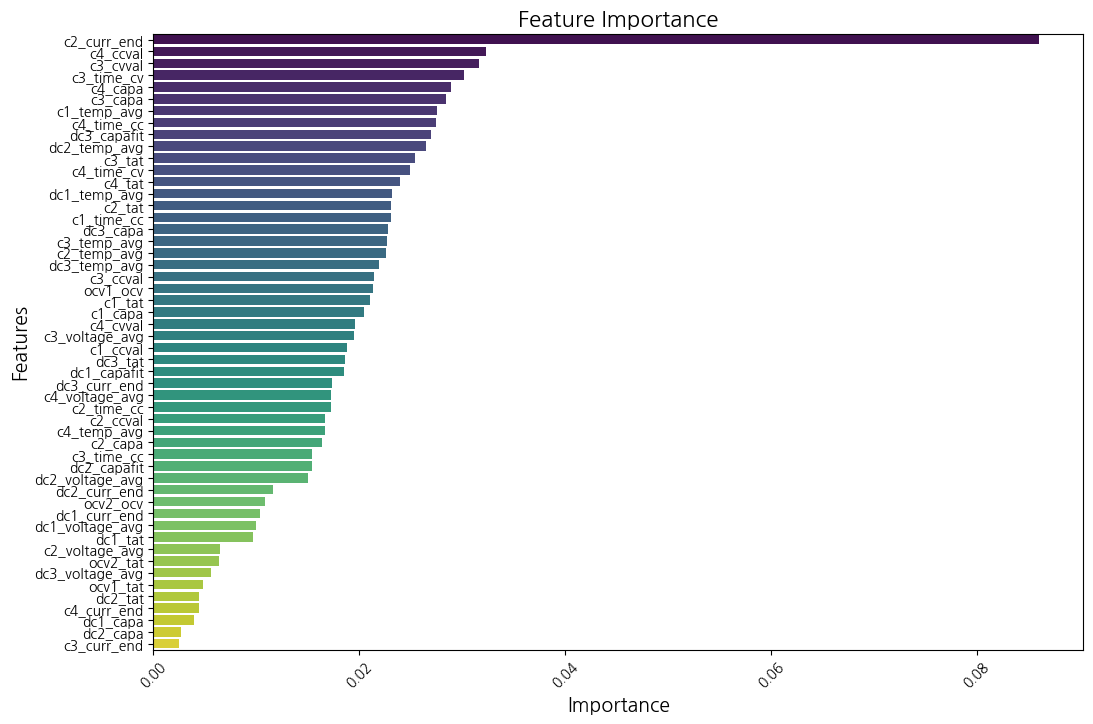

In [202]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [203]:
# GridSearchCV 활용
params = {
    'n_estimators' : [10, 15, 20, 50],
    'max_depth' : [4, 8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

rf_clf = RandomForestClassifier(random_state=123, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear6A_train_x, df_clear6A_train_y)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16],
                         'n_estimators': [10, 15, 20, 50]})

In [204]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 15}
최고 예측 정확도 : 0.9880


In [205]:
rf_clf = RandomForestClassifier(n_estimators=15, min_samples_split=8,
                                min_samples_leaf=1, max_depth=8, random_state=123)
rf_clf.fit(df_clear6A_train_x, df_clear6A_train_y)
y_pred = rf_clf.predict(df_clear6A_test_x)

In [206]:
accuracy = accuracy_score(df_clear6A_test_y, y_pred)
confusion = confusion_matrix(df_clear6A_test_y, y_pred)
precision = precision_score(df_clear6A_test_y, y_pred)
recall = recall_score(df_clear6A_test_y, y_pred)
f1 = f1_score(df_clear6A_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[3937    0]
 [  40    0]]
평가 지표
Accuracy : 0.989942 
Precision : 0.000000 
Recall : 0.000000 
F1_score : 0.000000


C:\Users\winju\Anaconda\envs\lab4\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
importance = rf_clf.feature_importances_
feature_names = df_clear6A_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance.head(20))

Feature Importance:
c2_curr_end     0.110623
c3_capa         0.045073
dc3_capafit     0.042996
dc2_temp_avg    0.039892
c2_temp_avg     0.038016
c3_cvval        0.037276
c4_ccval        0.036313
c4_time_cc      0.035451
c2_tat          0.032980
c3_temp_avg     0.032809
c3_time_cv      0.028499
dc1_temp_avg    0.026630
dc3_tat         0.025816
c1_temp_avg     0.025119
dc3_temp_avg    0.022195
dc1_capafit     0.021775
c3_tat          0.021619
dc3_capa        0.019078
c4_capa         0.018798
c4_cvval        0.018334
dtype: float64


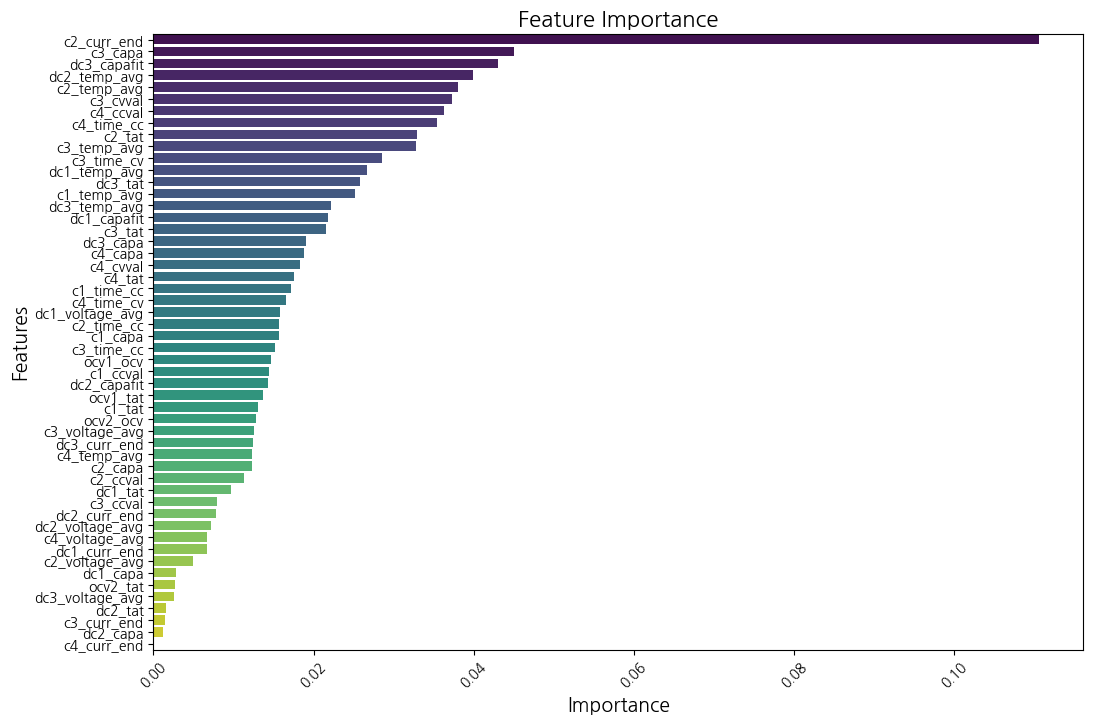

In [208]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

---

### DecisionTree_clf

In [209]:
df_clear6B = df_clear6[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [210]:
df_clear6B_y = df_clear6B['judge_code']
df_clear6B_x = df_clear6B.drop('judge_code', axis=1)
df_clear6B_train_x, df_clear6B_test_x, df_clear6B_train_y, df_clear6B_test_y = train_test_split(
    df_clear6B_x, df_clear6B_y, test_size=0.3, random_state=123)

In [211]:
print('train data X size : {}'.format(df_clear6B_train_x.shape))
print('test data X size : {}'.format(df_clear6B_test_x.shape))
print('train data Y size : {}'.format(df_clear6B_train_y.shape))
print('test data Y size : {}'.format(df_clear6B_test_y.shape))

train data X size : (9278, 52)
test data X size : (3977, 52)
train data Y size : (9278,)
test data Y size : (3977,)


In [212]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(df_clear6B_train_x, df_clear6B_train_y)

# 예측 및 성능 평가
y_pred = dt_clf.predict(df_clear6B_test_x)

In [213]:
accuracy = accuracy_score(df_clear6B_test_y, y_pred)
confusion = confusion_matrix(df_clear6B_test_y, y_pred)
precision = precision_score(df_clear6B_test_y, y_pred)
recall = recall_score(df_clear6B_test_y, y_pred)
f1 = f1_score(df_clear6B_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy,precision, recall, f1))

혼동 행렬
[[3905   32]
 [  27   13]]
평가 지표
Accuracy : 0.985165 
Precision : 0.288889 
Recall : 0.325000 
F1_score : 0.305882


In [214]:
importance = dt_clf.feature_importances_
feature_names = df_clear6B_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False).head(20)
print("Feature Importance:")
print(feature_importance[:10])

Feature Importance:
dc2_voltage_avg    0.096233
c2_curr_end        0.078636
c3_voltage_avg     0.072508
dc3_capa           0.053231
c3_time_cv         0.052899
dc3_capafit        0.052434
c2_temp_avg        0.040400
c4_time_cc         0.039645
c2_tat             0.031680
c4_cvval           0.030492
dtype: float64


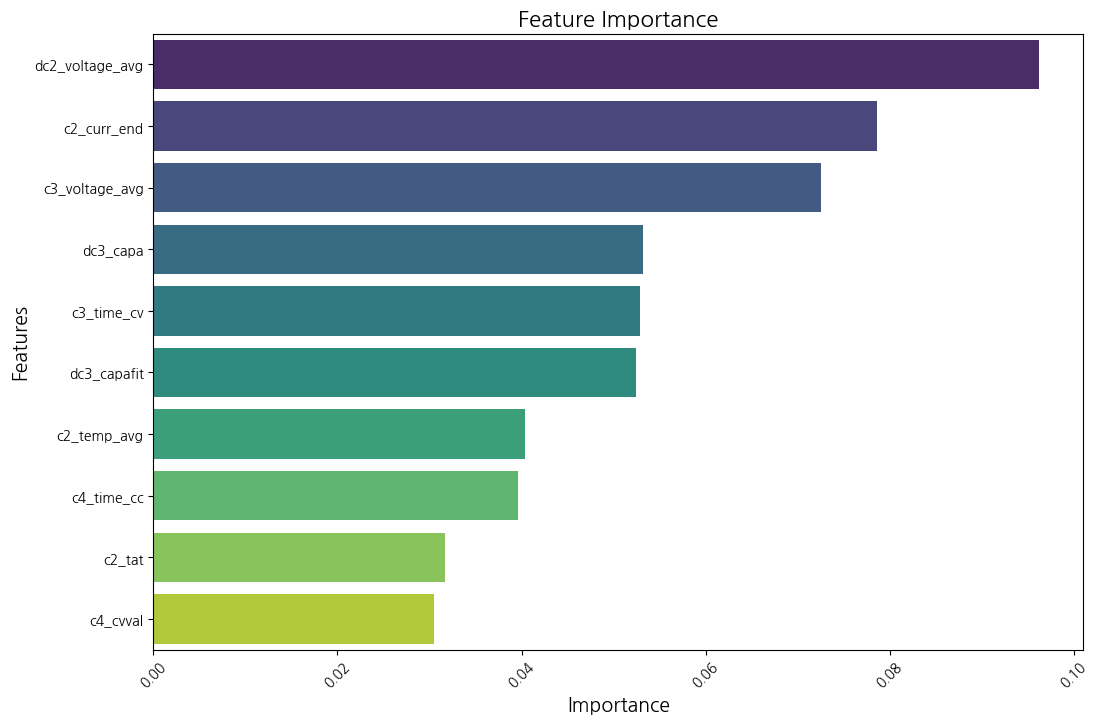

In [215]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [216]:
# GridSearchCV 활용
params = {
    'max_depth' : [4, 8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

dt_clf = DecisionTreeClassifier(random_state=123)
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear6B_train_x, df_clear6B_train_y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [217]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 2}
최고 예측 정확도 : 0.9872


In [218]:
dt_clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=12, max_depth=8, random_state=123)
dt_clf.fit(df_clear6B_train_x, df_clear6B_train_y)
y_pred = dt_clf.predict(df_clear6B_test_x)

In [219]:
accuracy = accuracy_score(df_clear6B_test_y, y_pred)
confusion = confusion_matrix(df_clear6B_test_y, y_pred)
precision = precision_score(df_clear6B_test_y, y_pred)
recall = recall_score(df_clear6B_test_y, y_pred)
f1 = f1_score(df_clear6B_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[3916   21]
 [  24   16]]
평가 지표
Accuracy : 0.988685 
Precision : 0.432432 
Recall : 0.400000 
F1_score : 0.415584


In [220]:
importance = dt_clf.feature_importances_
feature_names = df_clear6B_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance[:10])

Feature Importance:
dc2_voltage_avg    0.187085
c3_voltage_avg     0.143531
c2_curr_end        0.125169
dc1_capafit        0.073979
c2_temp_avg        0.071929
c4_tat             0.063321
c3_time_cv         0.062151
c4_ccval           0.046811
c4_time_cc         0.044988
c2_tat             0.038672
dtype: float64


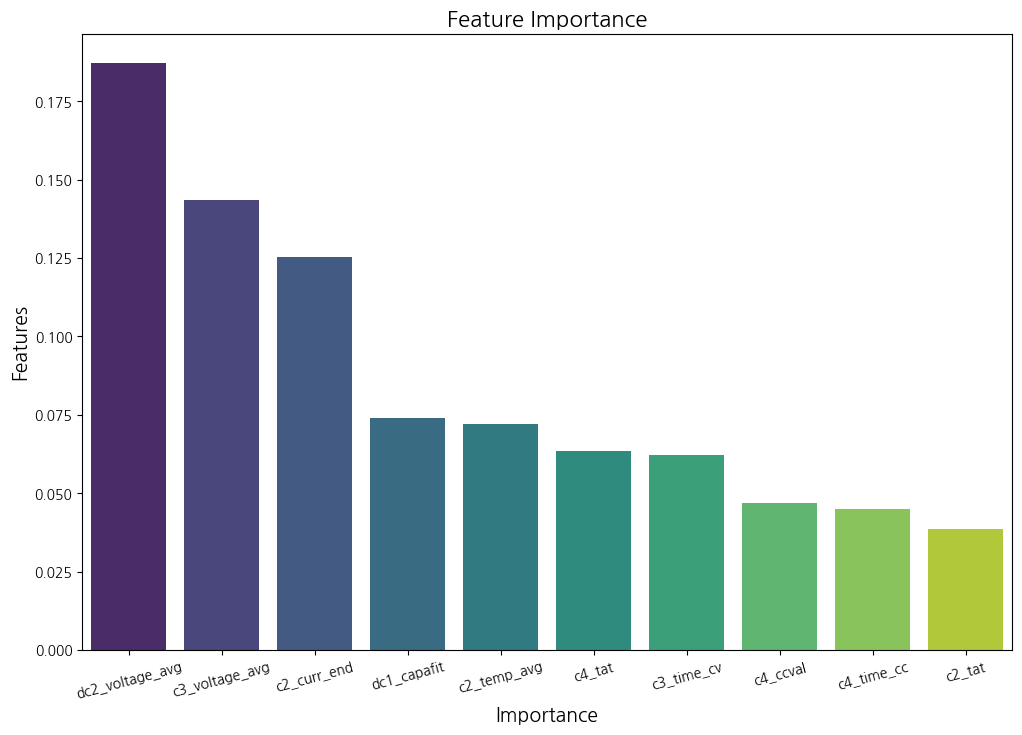

In [221]:
plt.figure(figsize=(12, 8))
sns.barplot(y=feature_importance.values[:10], x=feature_importance.index[:10], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=15)
plt.show()

---

### GradientBoost_clf

In [222]:
df_clear6C = df_clear6[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [223]:
df_clear6C_y = df_clear6C['judge_code']
df_clear6C_x = df_clear6C.drop('judge_code', axis=1)
df_clear6C_train_x, df_clear6C_test_x, df_clear6C_train_y, df_clear6C_test_y = train_test_split(
    df_clear6C_x, df_clear6C_y, test_size=0.3, random_state=123)

In [224]:
print('train data X size : {}'.format(df_clear6C_train_x.shape))
print('test data X size : {}'.format(df_clear6C_test_x.shape))
print('train data Y size : {}'.format(df_clear6C_train_y.shape))
print('test data Y size : {}'.format(df_clear6C_test_y.shape))

train data X size : (9278, 52)
test data X size : (3977, 52)
train data Y size : (9278,)
test data Y size : (3977,)


In [225]:
gb_clf = GradientBoostingClassifier(random_state=123)
gb_clf.fit(df_clear6C_train_x, df_clear6C_train_y)

# 예측 및 성능 평가
y_pred = gb_clf.predict(df_clear6C_test_x)

In [226]:
accuracy = accuracy_score(df_clear6C_test_y, y_pred)
confusion = confusion_matrix(df_clear6C_test_y, y_pred)
precision = precision_score(df_clear6C_test_y, y_pred)
recall = recall_score(df_clear6C_test_y, y_pred)
f1 = f1_score(df_clear6C_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[3914   23]
 [  22   18]]
평가 지표
Accuracy : 0.988685 
Precision : 0.439024 
Recall : 0.450000 
F1_score : 0.444444


In [227]:
importance = gb_clf.feature_importances_
feature_names = df_clear6C_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance[:20])

Feature Importance:
c2_curr_end        0.132047
c3_time_cv         0.080171
dc2_voltage_avg    0.062309
c4_ccval           0.057831
c3_temp_avg        0.056865
c1_temp_avg        0.052250
c3_tat             0.048893
c3_voltage_avg     0.047525
dc2_temp_avg       0.034146
c4_cvval           0.028884
c2_tat             0.028597
c3_capa            0.026455
ocv1_ocv           0.026324
c4_time_cc         0.025309
c4_time_cv         0.023683
dc3_capa           0.021268
dc3_tat            0.020529
c2_temp_avg        0.018735
dc1_capafit        0.016001
dc1_curr_end       0.012213
dtype: float64


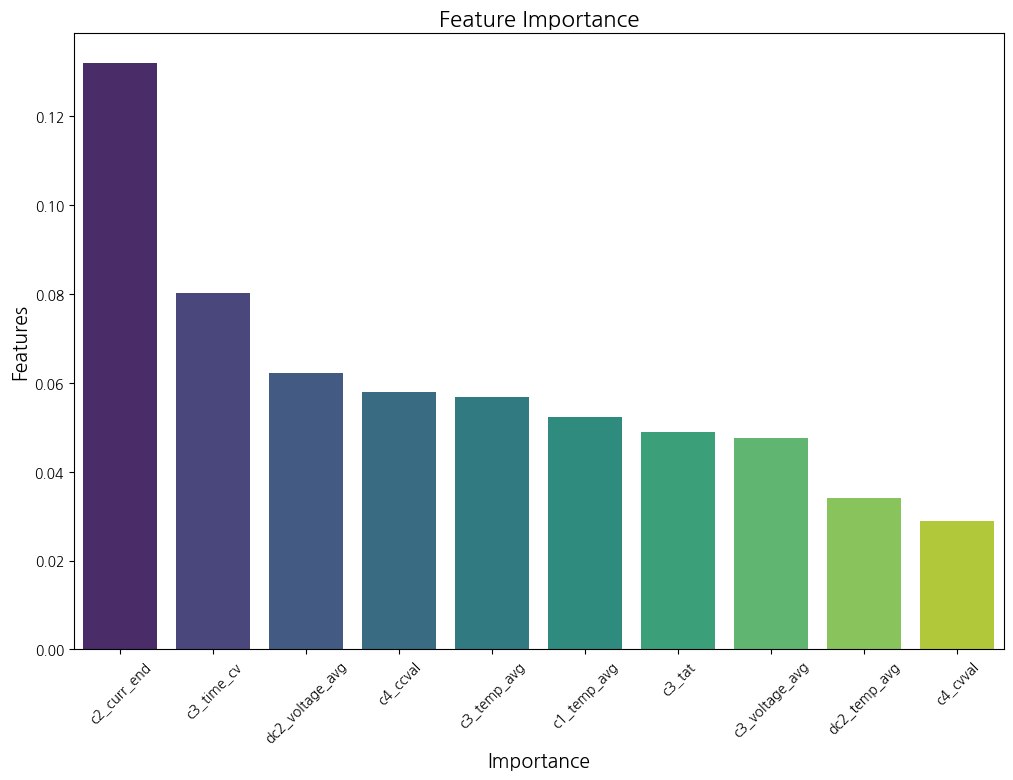

In [228]:
plt.figure(figsize=(12, 8))
sns.barplot(y=feature_importance.values[:10], x=feature_importance.index[:10], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [229]:
# GridSearchCV 활용
params = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
    'n_estimators' : [10, 25, 50, 100, 150, 200]
}

gb_clf = GradientBoostingClassifier(random_state=123)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear6C_train_x, df_clear6C_train_y)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
                         'n_estimators': [10, 25, 50, 100, 150, 200]})

In [230]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'learning_rate': 0.01, 'n_estimators': 10}
최고 예측 정확도 : 0.9877


In [231]:
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, random_state=123)
gb_clf.fit(df_clear6C_train_x, df_clear6C_train_y)
y_pred = gb_clf.predict(df_clear6C_test_x)

In [232]:
accuracy = accuracy_score(df_clear6C_test_y, y_pred)
confusion = confusion_matrix(df_clear6C_test_y, y_pred)
precision = precision_score(df_clear6C_test_y, y_pred)
recall = recall_score(df_clear6C_test_y, y_pred)
f1 = f1_score(df_clear6C_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[3937    0]
 [  40    0]]
평가 지표
Accuracy : 0.989942 
Precision : 0.000000 
Recall : 0.000000 
F1_score : 0.000000


C:\Users\winju\Anaconda\envs\lab4\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
importance = gb_clf.feature_importances_
feature_names = df_clear6C_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance[:20])

Feature Importance:
dc2_voltage_avg    0.335391
c3_voltage_avg     0.257241
c2_curr_end        0.224383
c2_temp_avg        0.086133
c4_ccval           0.059777
c3_temp_avg        0.015540
c1_temp_avg        0.013077
c4_time_cc         0.006841
dc1_capafit        0.001617
c4_curr_end        0.000000
c4_voltage_avg     0.000000
dc3_capafit        0.000000
c4_capa            0.000000
dc3_temp_avg       0.000000
c4_time_cv         0.000000
c4_cvval           0.000000
dc3_capa           0.000000
ocv1_ocv           0.000000
dc3_voltage_avg    0.000000
ocv2_ocv           0.000000
dtype: float64


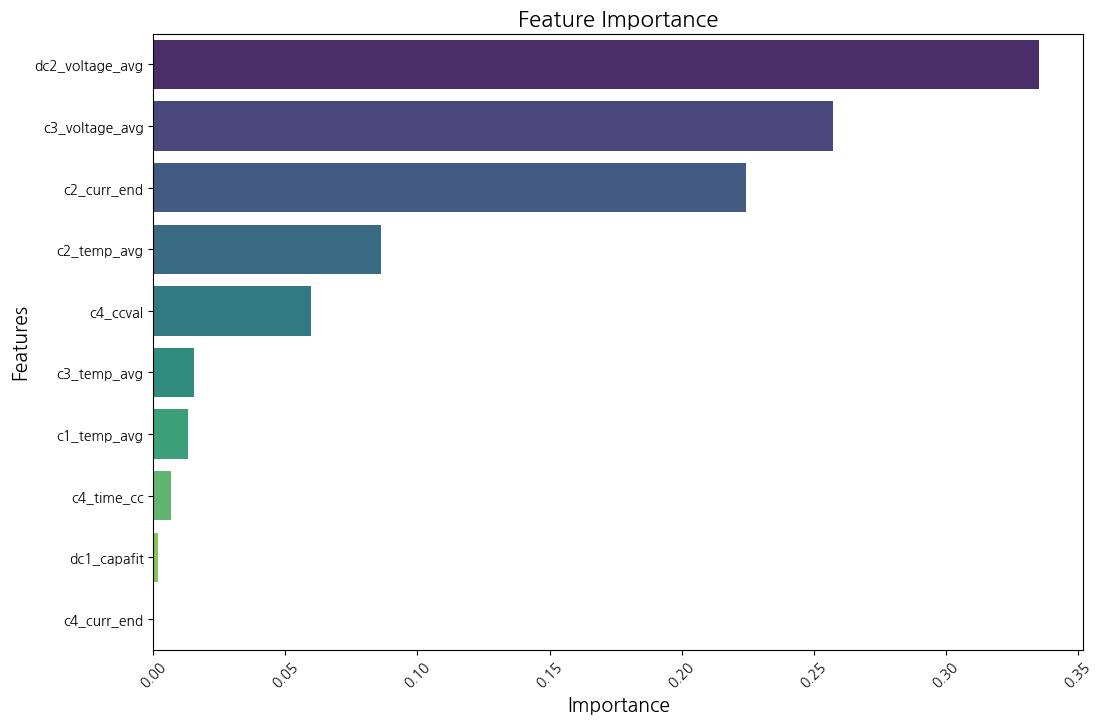

In [234]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

---

### XGBoost_clf

In [235]:
df_clear6D = df_clear6[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa',
                        'dc1_temp_avg', 'dc1_capafit', 'c2_curr_end','c2_voltage_avg',
                        'c2_capa','c2_ccval','c2_time_cc','c2_temp_avg',
                        'dc2_curr_end','dc2_voltage_avg','dc2_capa','dc2_temp_avg',
                        'dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa',
                        'dc3_temp_avg','dc3_capafit','c4_curr_end', 'c4_voltage_avg',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc', 'c4_temp_avg','ocv2_ocv','ocv1_tat','c1_tat','dc1_tat',
                        'c2_tat','dc2_tat','c3_tat','dc3_tat',
                        'c4_tat','ocv2_tat']]

In [236]:
df_clear6D_y = df_clear6D['judge_code']
df_clear6D_x = df_clear6D.drop('judge_code', axis=1)
df_clear6D_train_x, df_clear6D_test_x, df_clear6D_train_y, df_clear6D_test_y = train_test_split(
    df_clear6D_x, df_clear6D_y, test_size=0.3, random_state=123)

In [237]:
print('train data X size : {}'.format(df_clear6D_train_x.shape))
print('test data X size : {}'.format(df_clear6D_test_x.shape))
print('train data Y size : {}'.format(df_clear6D_train_y.shape))
print('test data Y size : {}'.format(df_clear6D_test_y.shape))

train data X size : (9278, 52)
test data X size : (3977, 52)
train data Y size : (9278,)
test data Y size : (3977,)


In [238]:
df_clear6D_train_xx, df_clear6D_val_xx, df_clear6D_train_yy, df_clear6D_val_yy = train_test_split(
    df_clear6D_train_x, df_clear6D_train_y, test_size=0.1, random_state=123)

print('train data X size : {}'.format(df_clear6D_train_xx.shape))
print('val data X size : {}'.format(df_clear6D_val_xx.shape))
print('train data Y size : {}'.format(df_clear6D_train_yy.shape))
print('val data Y size : {}'.format(df_clear6D_val_yy.shape))

train data X size : (8350, 52)
val data X size : (928, 52)
train data Y size : (8350,)
val data Y size : (928,)


In [239]:
params = {
    'max_depth':3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds=400

In [240]:
dtr = xgb.DMatrix(data=df_clear6D_train_xx, label=df_clear6D_train_yy)
dval = xgb.DMatrix(data=df_clear6D_val_xx, label=df_clear6D_val_yy)
dtest = xgb.DMatrix(data=df_clear6D_test_x, label=df_clear6D_test_y)

In [241]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=50,evals=eval_list)

[0]	train-logloss:0.64618	eval-logloss:0.64629
[1]	train-logloss:0.60368	eval-logloss:0.60388
[2]	train-logloss:0.56504	eval-logloss:0.56532
[3]	train-logloss:0.52978	eval-logloss:0.53022
[4]	train-logloss:0.49745	eval-logloss:0.49794
[5]	train-logloss:0.46777	eval-logloss:0.46834
[6]	train-logloss:0.44039	eval-logloss:0.44101
[7]	train-logloss:0.41511	eval-logloss:0.41578
[8]	train-logloss:0.39172	eval-logloss:0.39259
[9]	train-logloss:0.37001	eval-logloss:0.37091
[10]	train-logloss:0.34984	eval-logloss:0.35077
[11]	train-logloss:0.33106	eval-logloss:0.33202
[12]	train-logloss:0.31358	eval-logloss:0.31466
[13]	train-logloss:0.29725	eval-logloss:0.29836
[14]	train-logloss:0.28200	eval-logloss:0.28323
[15]	train-logloss:0.26773	eval-logloss:0.26901
[16]	train-logloss:0.25437	eval-logloss:0.25574
[17]	train-logloss:0.24180	eval-logloss:0.24317
[18]	train-logloss:0.23006	eval-logloss:0.23153
[19]	train-logloss:0.21898	eval-logloss:0.22046
[20]	train-logloss:0.20858	eval-logloss:0.21003
[2

In [242]:
pred_probs = xgb_model.predict(dtest)
pred_classes = (pred_probs > 0.5).astype(int)

In [243]:
accuracy = accuracy_score(df_clear6D_test_y, pred_classes)
confusion = confusion_matrix(df_clear6D_test_y, pred_classes)
precision = precision_score(df_clear6D_test_y, pred_classes)
recall = recall_score(df_clear6D_test_y, pred_classes)
f1 = f1_score(df_clear6D_test_y, pred_classes)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[3929    8]
 [  34    6]]
평가 지표
Accuracy : 0.989439 
Precision : 0.428571 
Recall : 0.150000 
F1_score : 0.222222


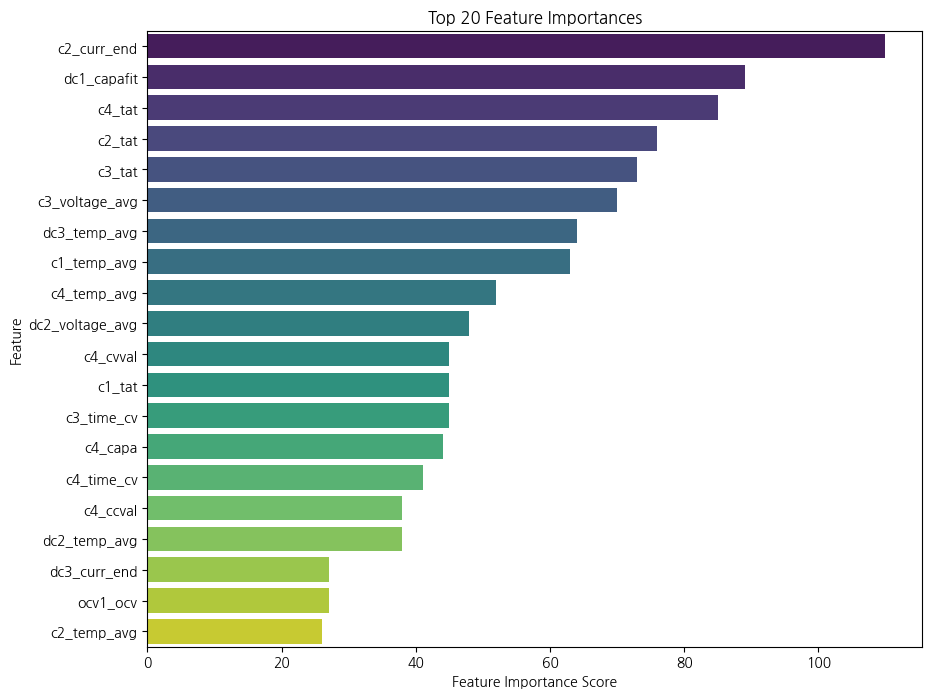

In [244]:
# 피처 중요도 추출
importance = xgb_model.get_fscore()

# 피처 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# 중요도에 따라 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 20개 피처 중요도 추출
top_features = importance_df.head(20)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Feature Importances')
plt.show()

---

### 모델 성능 결과

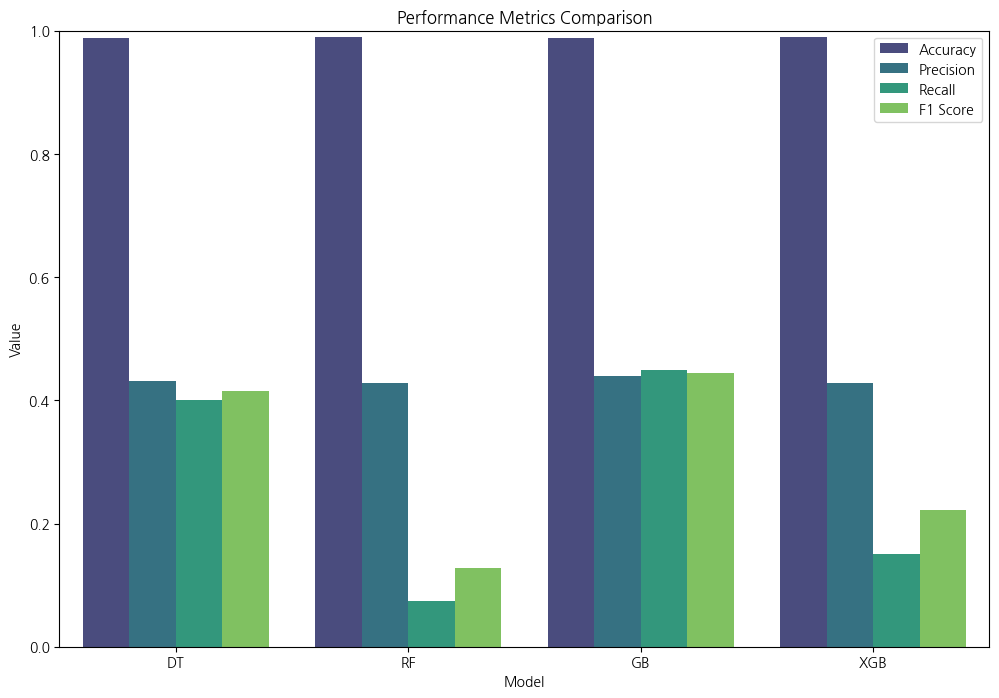

In [245]:
# 예시 성능 지표 데이터
metrics_data = {
    'Model': ['DT', 'RF', 'GB', 'XGB'],
    'Accuracy': [0.988, 0.989, 0.988, 0.989],
    'Precision': [0.432, 0.428, 0.439, 0.428],
    'Recall': [0.400, 0.075, 0.450, 0.150],
    'F1 Score': [0.415, 0.127, 0.444, 0.222]
}

# 데이터프레임으로 변환
df_metrics = pd.DataFrame(metrics_data)

# Melt the dataframe for seaborn
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Value')

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Value')

# 각 막대 위에 값 표시
#for i in range(len(df_melted)):
#    plt.text(i//4 + 0.25*(i%4) - 0.375, df_melted['Value'][i] + 0.01, f"{df_melted['Value'][i]:.3f}", ha='center', va='bottom')

plt.legend(loc='upper right')
plt.show()

- DecisionTree : accuracy = 0.988 , precision = 0.432 , recall = 0.400 , f1_score = 0.415
- RandomForest : accuracy = 0.989 , precision = 0.428 , recall = 0.075 , f1_score = 0.127
- GradientBoost : accuracy = 0.988 , precision = 0.439 , recall = 0.450 , f1_score = 0.444
- XGBoost : accuracy = 0.989 , precision = 0.428 , recall = 0.150 , f1_score = 0.222

개선 후 모델성능 비교결과 대부분의 모델 accuracy 성능이 우수함

그 중 DecisionTree 와 GradientBoost 는 F1-score, recall 성능도 우수한 것으로 나타남

현 프로젝트에서는 고객을 상대로하여 2차전지의 품질또한 중요한 가치로 판단하여

**FalseNagative 오분류률이 낮은 recall 성능이 DT보다 높은 GB로 선정함**

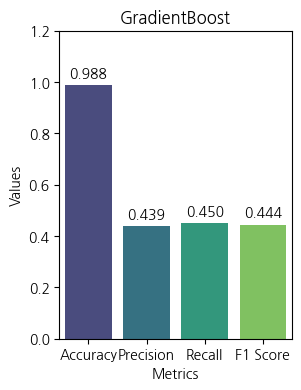

In [246]:
# 성능 지표 값
metrics = {
    'Accuracy': 0.988,
    'Precision': 0.439,
    'Recall': 0.450,
    'F1 Score': 0.444
}

# 성능 지표의 이름과 값을 리스트로 변환
names = list(metrics.keys())
values = list(metrics.values())

# 시각화
plt.figure(figsize=(3, 4))
sns.barplot(x=names, y=values, palette='viridis')
plt.ylim(0, 1.2)
plt.title('GradientBoost')
plt.xlabel('Metrics')
plt.ylabel('Values')

# 각 막대 위에 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', va='bottom')

plt.show()

---

# 통합 관리체계 구축

## 불량판정 ~ 검사정보 ~ 공정조건 관계성 확인

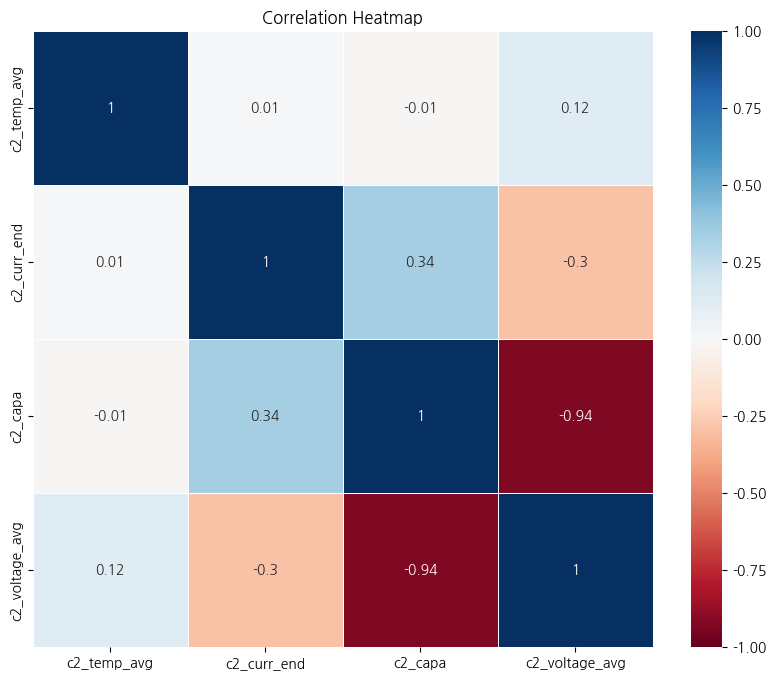

In [247]:
# 상관 계수 계산
corr = df_clear3[['c2_temp_avg', 'c2_curr_end', 'c2_capa', 'c2_voltage_avg']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

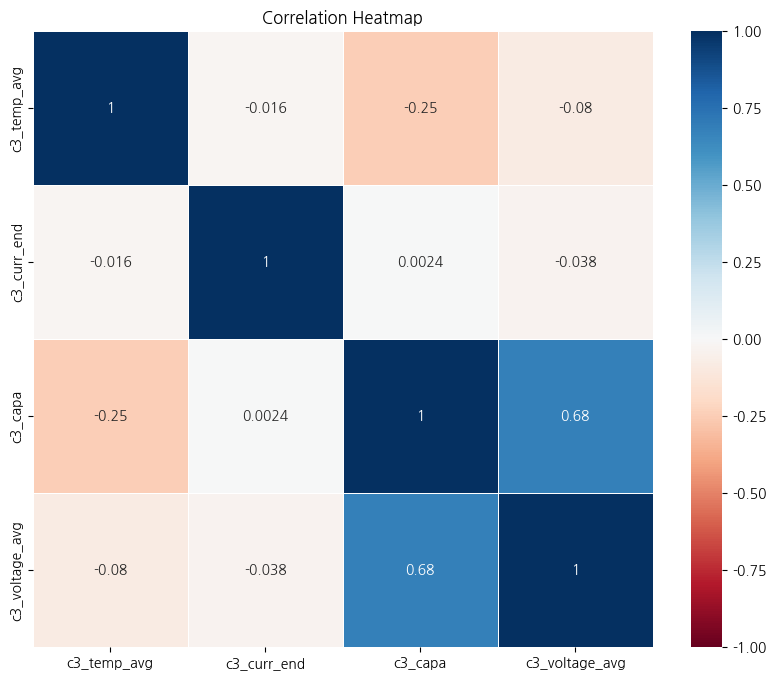

In [248]:
# 상관 계수 계산
corr = df_clear3[['c3_temp_avg', 'c3_curr_end', 'c3_capa', 'c3_voltage_avg']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

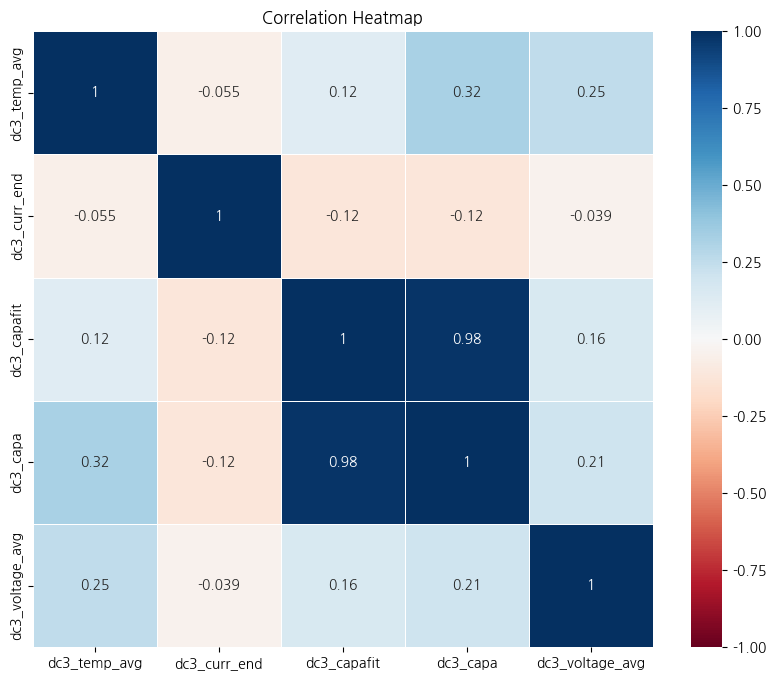

In [249]:
# 상관 계수 계산
corr = df_clear3[['dc3_temp_avg', 'dc3_curr_end','dc3_capafit' , 'dc3_capa', 'dc3_voltage_avg']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

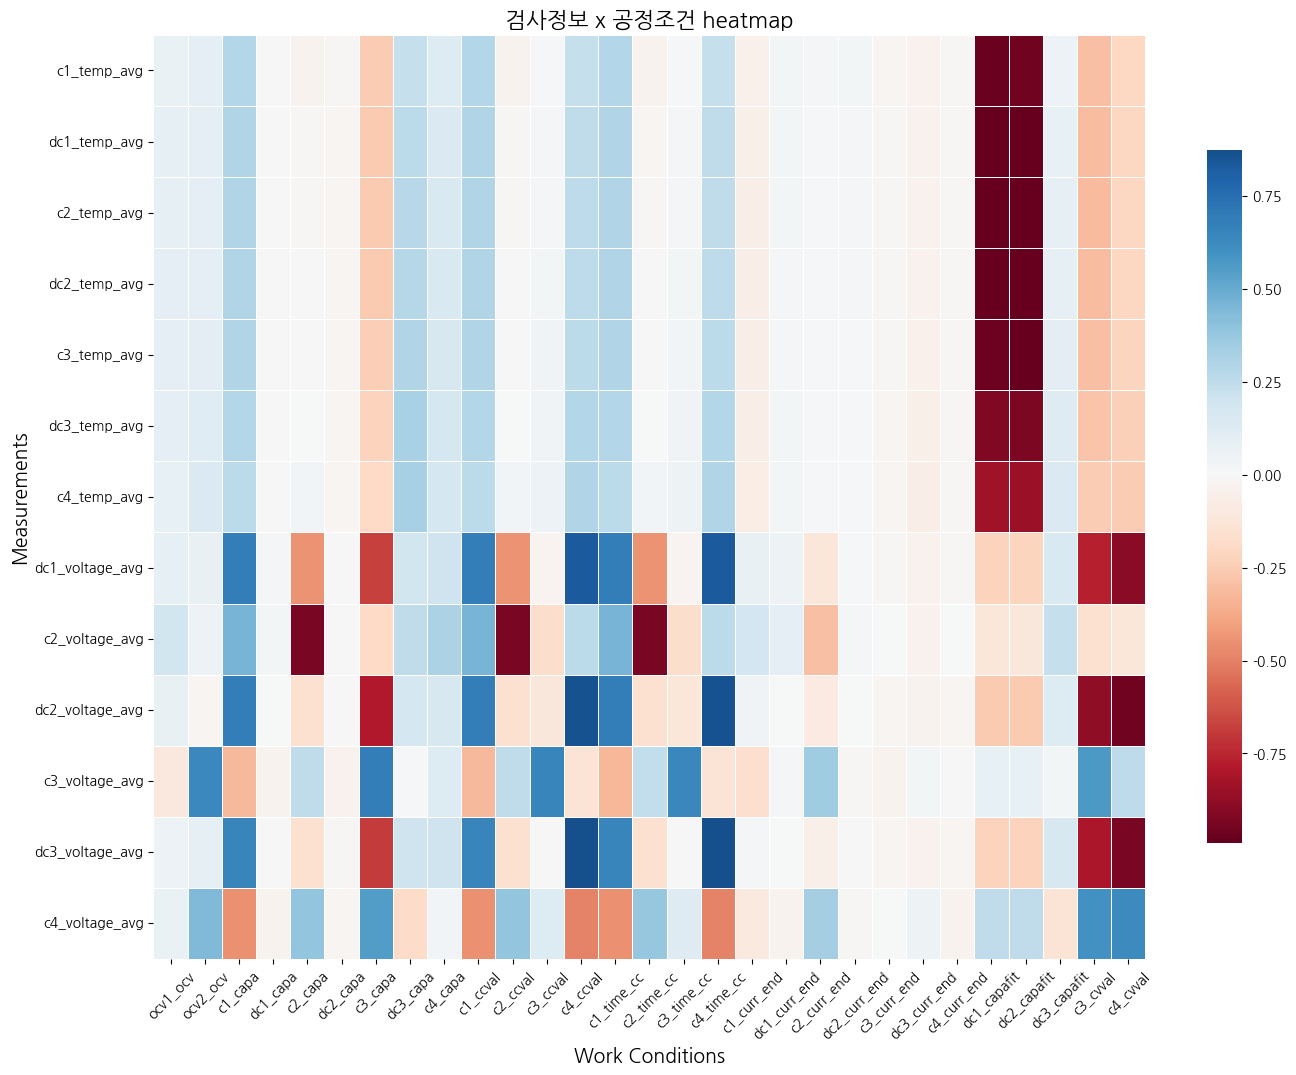

In [250]:
# x와 y 축에 사용할 변수들
x_vars = ['ocv1_ocv','ocv2_ocv',
          'c1_capa','dc1_capa','c2_capa','dc2_capa','c3_capa','dc3_capa','c4_capa',
          'c1_ccval','c2_ccval','c3_ccval','c4_ccval',
          'c1_time_cc','c2_time_cc','c3_time_cc','c4_time_cc',
          'c1_curr_end','dc1_curr_end','c2_curr_end','dc2_curr_end','c3_curr_end','dc3_curr_end','c4_curr_end',
          'dc1_capafit','dc2_capafit','dc3_capafit',
          'c3_cvval','c4_cvval']

y_vars = ['c1_temp_avg','dc1_temp_avg','c2_temp_avg','dc2_temp_avg','c3_temp_avg','dc3_temp_avg','c4_temp_avg',
          'dc1_voltage_avg','c2_voltage_avg','dc2_voltage_avg','c3_voltage_avg','dc3_voltage_avg','c4_voltage_avg']

# 필요한 변수들만 포함한 데이터프레임 생성
df_selected = df_clear3[x_vars + y_vars]

# 상관 계수 계산
corr_matrix = df_selected.corr()

# 상관 계수 히트맵 그리기
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix.loc[y_vars, x_vars], annot=False, cmap='RdBu', center=0, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title('검사정보 x 공정조건 heatmap', size=16)
plt.xlabel('Work Conditions', size=14)
plt.ylabel('Measurements', size=14)
plt.xticks(rotation=45)
plt.show()


### 불량판정 - 검사정보

In [251]:
df_clear3meas = df_clear3[['judge_code','ocv1_ocv','c1_capa', 'c1_ccval','c1_time_cc',
                        'dc1_curr_end', 'dc1_capa',
                        'dc1_capafit', 'c2_curr_end',
                        'c2_capa','c2_ccval','c2_time_cc',
                        'dc2_curr_end','dc2_capa',
                        'dc2_capafit','c3_curr_end','c3_capa',
                        'c3_ccval','c3_time_cv','c3_cvval','c3_time_cc',
                        'dc3_curr_end','dc3_capa',
                        'dc3_capafit','c4_curr_end',
                        'c4_capa', 'c4_ccval','c4_time_cv','c4_cvval', 
                        'c4_time_cc','ocv2_ocv']]

In [252]:
df_clear3meas_y = df_clear3meas['judge_code']
df_clear3meas_x = df_clear3meas.drop('judge_code', axis=1)
df_clear3meas_train_x, df_clear3meas_test_x, df_clear3meas_train_y, df_clear3meas_test_y = train_test_split(
    df_clear3meas_x, df_clear3meas_y, test_size=0.3, random_state=123)

In [253]:
print('train data X size : {}'.format(df_clear3meas_train_x.shape))
print('test data X size : {}'.format(df_clear3meas_test_x.shape))
print('train data Y size : {}'.format(df_clear3meas_train_y.shape))
print('test data Y size : {}'.format(df_clear3meas_test_y.shape))

train data X size : (28877, 30)
test data X size : (12376, 30)
train data Y size : (28877,)
test data Y size : (12376,)


In [254]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(df_clear3meas_train_x, df_clear3meas_train_y)

# 예측 및 성능 평가
y_pred = dt_clf.predict(df_clear3meas_test_x)

In [255]:
accuracy = accuracy_score(df_clear3meas_test_y, y_pred)
confusion = confusion_matrix(df_clear3meas_test_y, y_pred)
precision = precision_score(df_clear3meas_test_y, y_pred)
recall = recall_score(df_clear3meas_test_y, y_pred)
f1 = f1_score(df_clear3meas_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy,precision, recall, f1))

혼동 행렬
[[11672   344]
 [  270    90]]
평가 지표
Accuracy : 0.950388 
Precision : 0.207373 
Recall : 0.250000 
F1_score : 0.226700


In [256]:
importance = dt_clf.feature_importances_
feature_names = df_clear3meas_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance[:10])

Feature Importance:
dc1_capafit    0.097132
c3_capa        0.074200
c4_time_cv     0.069595
dc3_capafit    0.056590
c3_time_cv     0.055956
c2_curr_end    0.054432
c4_cvval       0.047325
c3_cvval       0.042314
c4_ccval       0.041895
ocv1_ocv       0.040884
dtype: float64


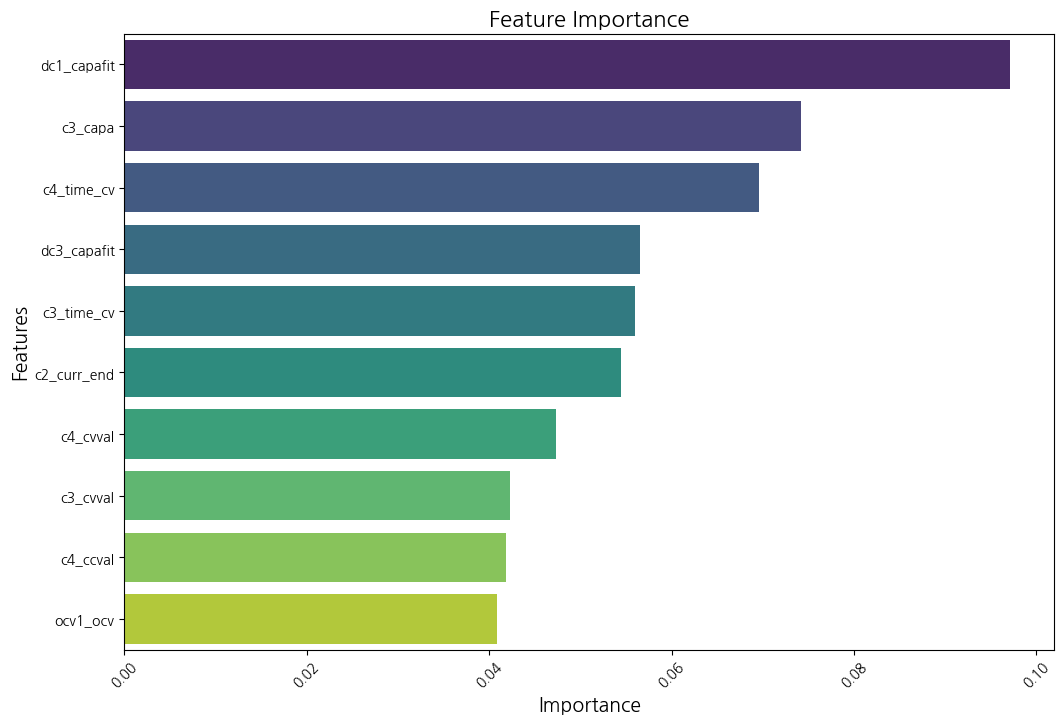

In [257]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [258]:
# GridSearchCV 활용
params = {
    'max_depth' : [4, 8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

dt_clf = DecisionTreeClassifier(random_state=123)
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(df_clear3meas_train_x, df_clear3meas_train_y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [259]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 2}
최고 예측 정확도 : 0.9685


In [260]:
dt_clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=12, max_depth=4, random_state=123)
dt_clf.fit(df_clear3meas_train_x, df_clear3meas_train_y)
y_pred = dt_clf.predict(df_clear3meas_test_x)

In [261]:
accuracy = accuracy_score(df_clear3meas_test_y, y_pred)
confusion = confusion_matrix(df_clear3meas_test_y, y_pred)
precision = precision_score(df_clear3meas_test_y, y_pred)
recall = recall_score(df_clear3meas_test_y, y_pred)
f1 = f1_score(df_clear3meas_test_y, y_pred)
print('혼동 행렬')
print(confusion)
print('평가 지표')
print("Accuracy : {0:4f} \nPrecision : {1:4f} \nRecall : {2:4f} \nF1_score : {3:4f}".format(accuracy, precision, recall, f1))

혼동 행렬
[[12016     0]
 [  360     0]]
평가 지표
Accuracy : 0.970911 
Precision : 0.000000 
Recall : 0.000000 
F1_score : 0.000000


C:\Users\winju\Anaconda\envs\lab4\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [262]:
importance = dt_clf.feature_importances_
feature_names = df_clear3meas_train_x.columns

# 특징 중요도 출력
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance[:20])

Feature Importance:
dc1_capafit     0.446819
c3_capa         0.239322
c2_curr_end     0.185642
c4_ccval        0.041467
ocv2_ocv        0.030675
c4_time_cc      0.019980
c3_time_cv      0.015858
ocv1_ocv        0.011608
c4_time_cv      0.008629
c2_capa         0.000000
c2_ccval        0.000000
c1_time_cc      0.000000
c4_cvval        0.000000
c1_ccval        0.000000
c4_capa         0.000000
c4_curr_end     0.000000
dc3_capafit     0.000000
dc3_capa        0.000000
dc3_curr_end    0.000000
c3_time_cc      0.000000
dtype: float64


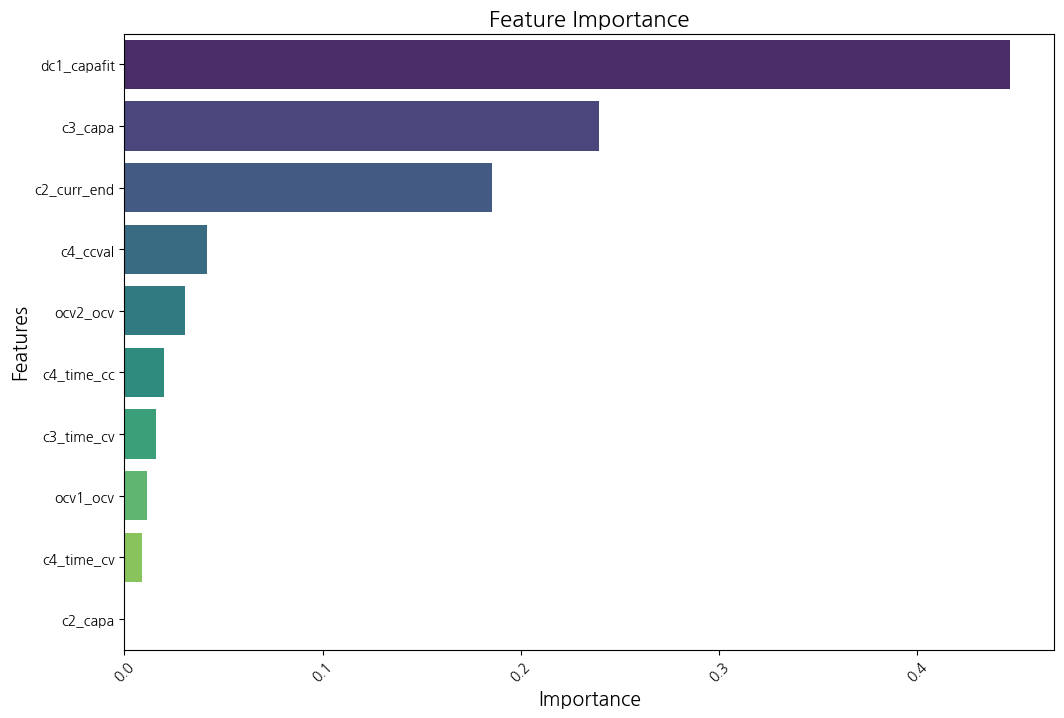

In [263]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.show()

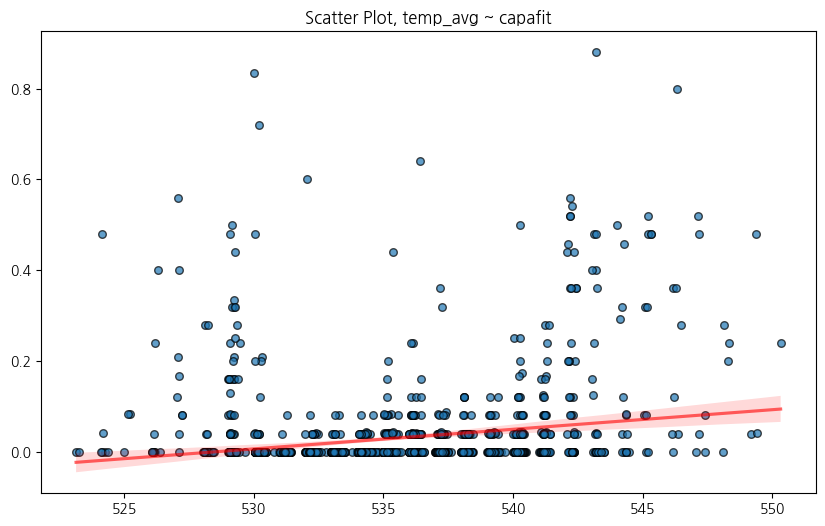

In [264]:
# 산점도와 회귀직선 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x='dc2_capafit', y='불량률', data=df_clear3trayA, 
            scatter_kws={'alpha':0.7, 's':30, 'edgecolor':'k'},
            line_kws={'color':'red', 'alpha':0.6})

# 제목과 라벨 추가
plt.title('Scatter Plot, temp_avg ~ capafit')
plt.xlabel('')
plt.ylabel('')

# 그래프 표시
plt.show()

### 검사정보 - 공정조건

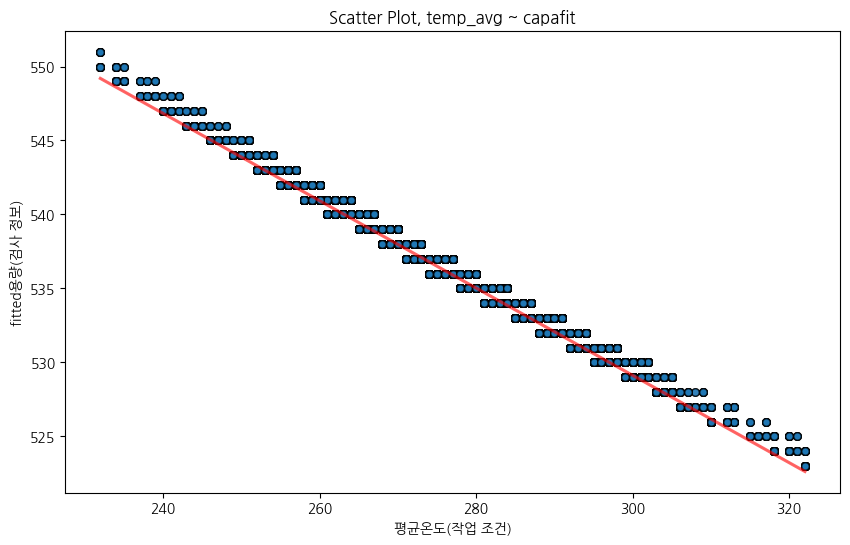

In [265]:
# 산점도와 회귀직선 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x='dc2_temp_avg', y='dc2_capafit', data=df_clear3, 
            scatter_kws={'alpha':0.7, 's':30, 'edgecolor':'k'},
            line_kws={'color':'red', 'alpha':0.6})

# 제목과 라벨 추가
plt.title('Scatter Plot, temp_avg ~ capafit')
plt.xlabel('평균온도(작업 조건)')
plt.ylabel('fitted용량(검사 정보)')

# 그래프 표시
plt.show()

---

### 공정조건 - 불량판정

In [266]:
df_clear3cond = df_clear3[['judge_code','c1_temp_avg','dc1_temp_avg','c2_temp_avg',
                        'dc2_temp_avg','c3_temp_avg','dc3_temp_avg','c4_temp_avg',
                        'dc1_voltage_avg','c2_voltage_avg','dc2_voltage_avg',
                        'c3_voltage_avg','dc3_voltage_avg','c4_voltage_avg']]

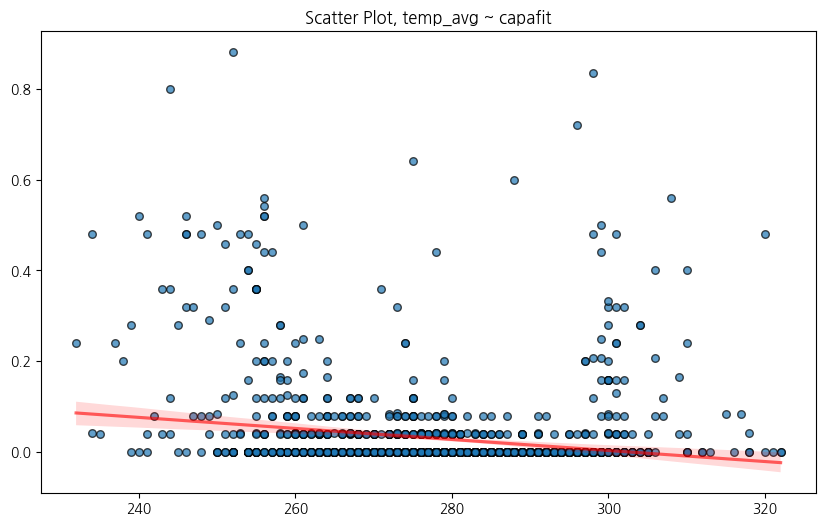

In [267]:
# 산점도와 회귀직선 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x='dc2_temp_avg', y='불량률', data=df_clear3trayA, 
            scatter_kws={'alpha':0.7, 's':30, 'edgecolor':'k'},
            line_kws={'color':'red', 'alpha':0.6})

# 제목과 라벨 추가
plt.title('Scatter Plot, temp_avg ~ capafit')
plt.xlabel('')
plt.ylabel('')

# 그래프 표시
plt.show()

---

## (관리 전) Formation 관리체계

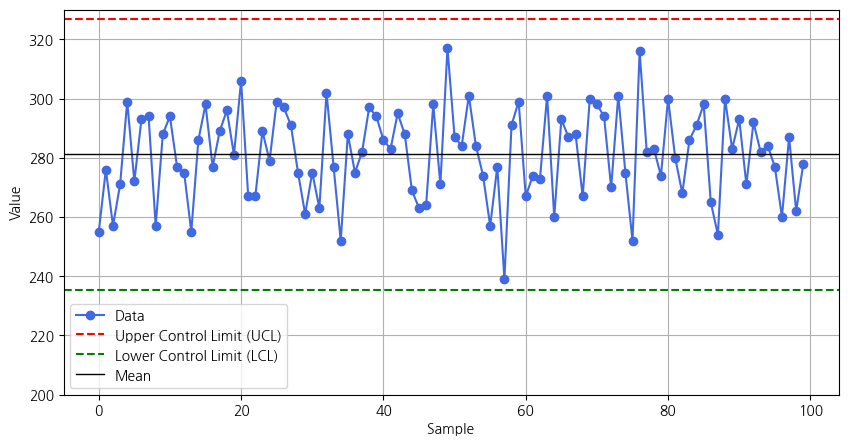

In [268]:
bad=df_clear3.sample(n=100, random_state=123)
good=df_clear6.sample(n=100, random_state=123)

# 평균과 표준편차 계산
mean = np.mean(bad['c4_temp_avg'])
std = np.std(bad['c4_temp_avg'])

# 관리한계 설정
upper_limit = mean + (3 * std)
lower_limit = mean - (3 * std)

# X축 데이터 생성
a1 = np.arange(len(bad))

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(a1, bad['c4_temp_avg'], marker='o', linestyle='-', color='royalblue', label='Data')
plt.axhline(upper_limit, color='r', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Control Limit (LCL)')
plt.axhline(mean, color='k', linestyle='-', linewidth=1, label='Mean')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(200, 330) # y축 범위 지정
plt.show()


## (관리 후) Formation 관리체계

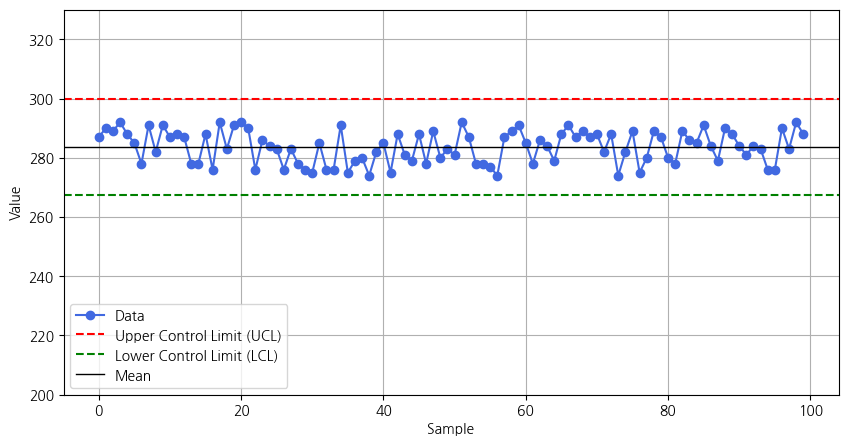

In [269]:
# 평균과 표준편차 계산
mean2 = np.mean(good['c4_temp_avg'])
std2 = np.std(good['c4_temp_avg'])

# 관리한계 설정
upper_limit2 = mean2 + (3 * std2)
lower_limit2 = mean2 - (3 * std2)

# X축 데이터 생성
a2 = np.arange(len(good))

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(a2, good['c4_temp_avg'], marker='o', linestyle='-', color='royalblue', label='Data')
plt.axhline(upper_limit2, color='r', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lower_limit2, color='g', linestyle='--', label='Lower Control Limit (LCL)')
plt.axhline(mean2, color='k', linestyle='-', linewidth=1, label='Mean')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(200, 330) # y축 범위 지정
plt.show()


---

## (관리 전) Grading 관리체계

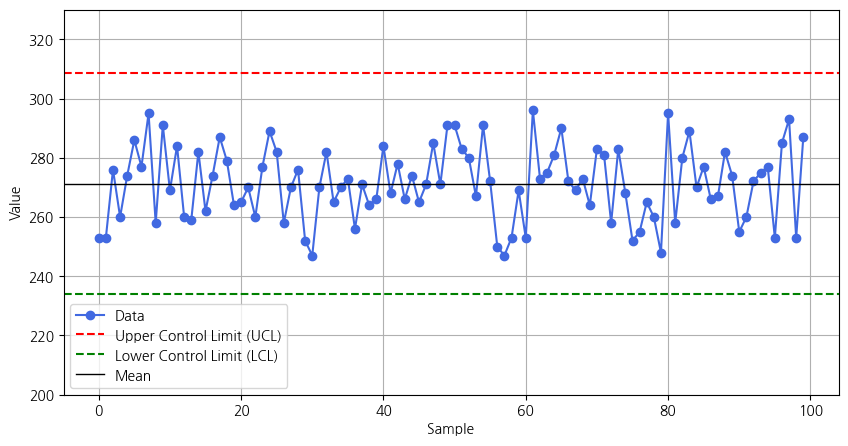

In [270]:
bad=df_clear3.sample(n=100, random_state=123)
good=df_clear6.sample(n=100, random_state=123)

# 평균과 표준편차 계산
mean = np.mean(bad['pg1_temp_avg'])
std = np.std(bad['pg1_temp_avg'])

# 관리한계 설정
upper_limit = mean + (3 * std)
lower_limit = mean - (3 * std)

# X축 데이터 생성
a1 = np.arange(len(bad))

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(a1, bad['pg1_temp_avg'], marker='o', linestyle='-', color='royalblue', label='Data')
plt.axhline(upper_limit, color='r', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lower_limit, color='g', linestyle='--', label='Lower Control Limit (LCL)')
plt.axhline(mean, color='k', linestyle='-', linewidth=1, label='Mean')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(200, 330) # y축 범위 지정
plt.show()


## (관리 후) Grading 관리체계

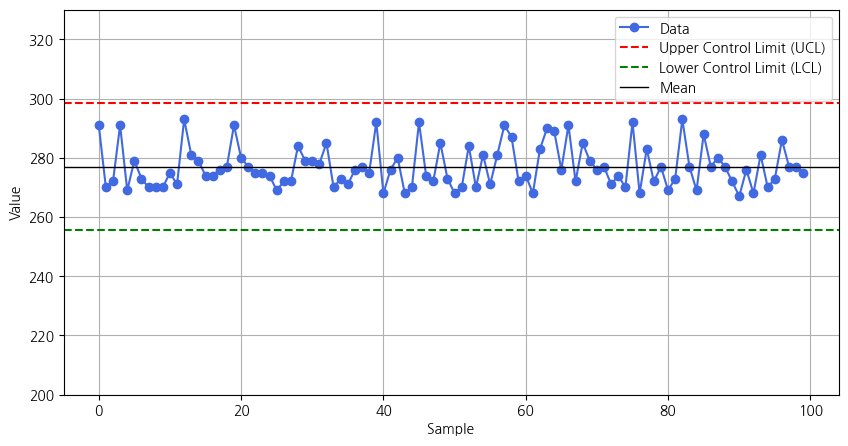

In [271]:
# 평균과 표준편차 계산
mean2 = np.mean(good['pg1_temp_avg'])
std2 = np.std(good['pg1_temp_avg'])

# 관리한계 설정
upper_limit2 = mean2 + (3 * std2)
lower_limit2 = mean2 - (3 * std2)

# X축 데이터 생성
a2 = np.arange(len(good))

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.plot(a2, good['pg1_temp_avg'], marker='o', linestyle='-', color='royalblue', label='Data')
plt.axhline(upper_limit2, color='r', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lower_limit2, color='g', linestyle='--', label='Lower Control Limit (LCL)')
plt.axhline(mean2, color='k', linestyle='-', linewidth=1, label='Mean')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.ylim(200, 330) # y축 범위 지정
plt.show()
